If you will use this script, please cite the source.

# Literature Review - Line Follower Robot

## Date (last update): 08/08/2024 - DD/MM/YYYY

# Install and Load the Libraries

In [ ]:
install.packages ("bibliometrix", dependencies=TRUE)
install.packages("stringdist",dependencies = TRUE)
#install.packages("rcrossref",dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘crosstalk’, ‘lazyeval’, ‘rentrez’, ‘XML’, ‘plyr’, ‘janeaustenr’, ‘tokenizers’, ‘bibliometrixData’, ‘dimensionsR’, ‘DT’, ‘ca’, ‘ggrepel’, ‘igraph’, ‘plotly’, ‘openalexR’, ‘openxlsx’, ‘pubmedR’, ‘rscopus’, ‘SnowballC’, ‘stringdist’, ‘tidytext’, ‘shinycssloaders’, ‘visNetwork’, ‘wordcloud2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘tinytest’




In [ ]:
library(stringdist)
library(dplyr)
library(bibliometrix)
library(readr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Please note that our software is open source and available for use, distributed under the MIT license.
When it is used in a publication, we ask that authors properly cite the following reference:

Aria, M. & Cuccurullo, C. (2017) bibliometrix: An R-tool for comprehensive science mapping analysis, 
                        Journal of Informetrics, 11(4), pp 959-975, Elsevier.

Failure to properly cite the software is considered a violation of the license.
                        
For information and bug reports:
                        - Take a look at https://www.bibliometrix.org
                        - Send an email to info@bibliometrix.org   
                        - Write a post on https://github.com/massimoaria/bibliometrix/issues
                        
Help us to keep Bibliometri

# Reading the files from Scopus and Web of Science

scopus.bib 267 files: "line follower robot" </br>
save_drecs.txt 111 files: "line follower robot" </br>
The Lens returned 29 articles: "line follower robot" AND ( or AND "line following robot" )

In [ ]:
a<-convert2df("scopus.bib", dbsource="scopus", format="bibtex")
b<-convert2df("savedrecs.txt", dbsource="wos", format="plaintext")
c<-convert2df("lens-export.csv", dbsource="lens", format="plaintext")


Converting your scopus collection into a bibliographic dataframe


In your file, some mandatory metadata are missing. Bibliometrix functions may not work properly!

Please, take a look at the vignettes:
- 'Data Importing and Converting' (https://www.bibliometrix.org/vignettes/Data-Importing-and-Converting.html)
- 'A brief introduction to bibliometrix' (https://www.bibliometrix.org/vignettes/Introduction_to_bibliometrix.html)


Missing fields:  CR 
Done!


Generating affiliation field tag AU_UN from C1:  Done!


Removed  6 duplicated documents

Converting your wos collection into a bibliographic dataframe

Done!


Generating affiliation field tag AU_UN from C1:  Done!


Converting your lens collection into a bibliographic dataframe



Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 29 Columns: 32
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (19): Lens ID, Title, Publication Type, Source Title, ISSNs, Publisher,...
dbl   (5): Publication Year, Issue Number, Microsoft Academic ID, Citing Pat...
lgl   (7): Keywords, MeSH Terms, Chemicals, Funding, PMID, PMCID, Is Open Ac...
date  (1): Date Published

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Done!



In [ ]:
M<-mergeDbSources(a, b, c, remove.duplicated = TRUE)
# Liberar variáveis não utilizadas da memória
rm(a, b, c)


 112 duplicated documents have been removed


In [ ]:
dim(M)

[1] 287  94

In [ ]:
#transform all strings to lower case
M1<-M
for (i in seq(1,length(M1$AU))){
  M1$AU[i]<-stringr::str_to_lower(M1$AU[i])
}
for (i in seq(1,length(M1$BE))){
  M1$BE[i]<-stringr::str_to_lower(M1$BE[i])
}
for (i in seq(1,length(M1$SO))){
  M1$SO[i]<-stringr::str_to_lower(M1$SO[i])
}
for (i in seq(1,length(M1$DE))){
  M1$DE[i]<-stringr::str_to_lower(M1$DE[i])
}
for (i in seq(1,length(M1$ID))){
  M1$ID[i]<-stringr::str_to_lower(M1$ID[i])
}
for (i in seq(1,length(M1$C1))){
  M1$C1[i]<-stringr::str_to_lower(M1$C1[i])
}
for (i in seq(1,length(M1$CR))){
  M1$CR[i]<-stringr::str_to_lower(M1$CR[i])
}
for (i in seq(1,length(M1$TI))){
  M1$TI[i]<-stringr::str_to_lower(M1$TI[i])
}
for (i in seq(1,length(M1$JI))){
  M1$JI[i]<-stringr::str_to_lower(M1$JI[i])
}
for (i in seq(1,length(M1$PU))){
  M1$PU[i]<-stringr::str_to_lower(M1$PU[i])
}
rm(M)

In [ ]:
save(M1,file="complete_file.rda")
#load("complete_file.rda")

# Missing Data

In [ ]:
com <- missingData(M1)
com$mandatoryTags

tag description          missing_counts missing_pct status   
1  AB  Abstract               0             0.00       Excellent
2  AU  Author                 0             0.00       Excellent
3  CR  Cited References       0             0.00       Excellent
4  DT  Document Type          0             0.00       Excellent
5  SO  Journal                0             0.00       Excellent
6  PY  Publication Year       0             0.00       Excellent
7  TI  Title                  0             0.00       Excellent
8  TC  Total Citation         0             0.00       Excellent
9  LA  Language              12             4.18       Good     
10 C1  Affiliation           28             9.76       Good     
11 DE  Keywords              58            20.21       Poor     
12 DI  DOI                   75            26.13       Poor     
13 RP  Corresponding Author  99            34.49       Poor     
14 ID  Keywords Plus        150            52.26       Critical 
15 WC  Science Categories   176            61.32       Critical

# Top 10 Authors

In [ ]:
output <- biblioAnalysis(M1)
# summary for the top ten authors and documents
output.summary<-summary(output, k=10, pause=F, width=130)



MAIN INFORMATION ABOUT DATA

 Timespan                              2001 : 2024 
 Sources (Journals, Books, etc)        246 
 Documents                             287 
 Annual Growth Rate %                  12.16 
 Document Average Age                  5.95 
 Average citations per doc             3.666 
 Average citations per year per doc    0.5218 
 References                            1498 
 
DOCUMENT TYPES                     
 article                             62 
 article conference paper            1 
 book                                1 
 book chapter                        4 
 conference paper                    107 
 conference proceedings article      2 
 conference review                   13 
 journal article                     9 
 proceedings paper                   88 
 
DOCUMENT CONTENTS
 Keywords Plus (ID)                    1040 
 Author's Keywords (DE)                691 
 
AUTHORS
 Authors                               864 
 Author Appearances               

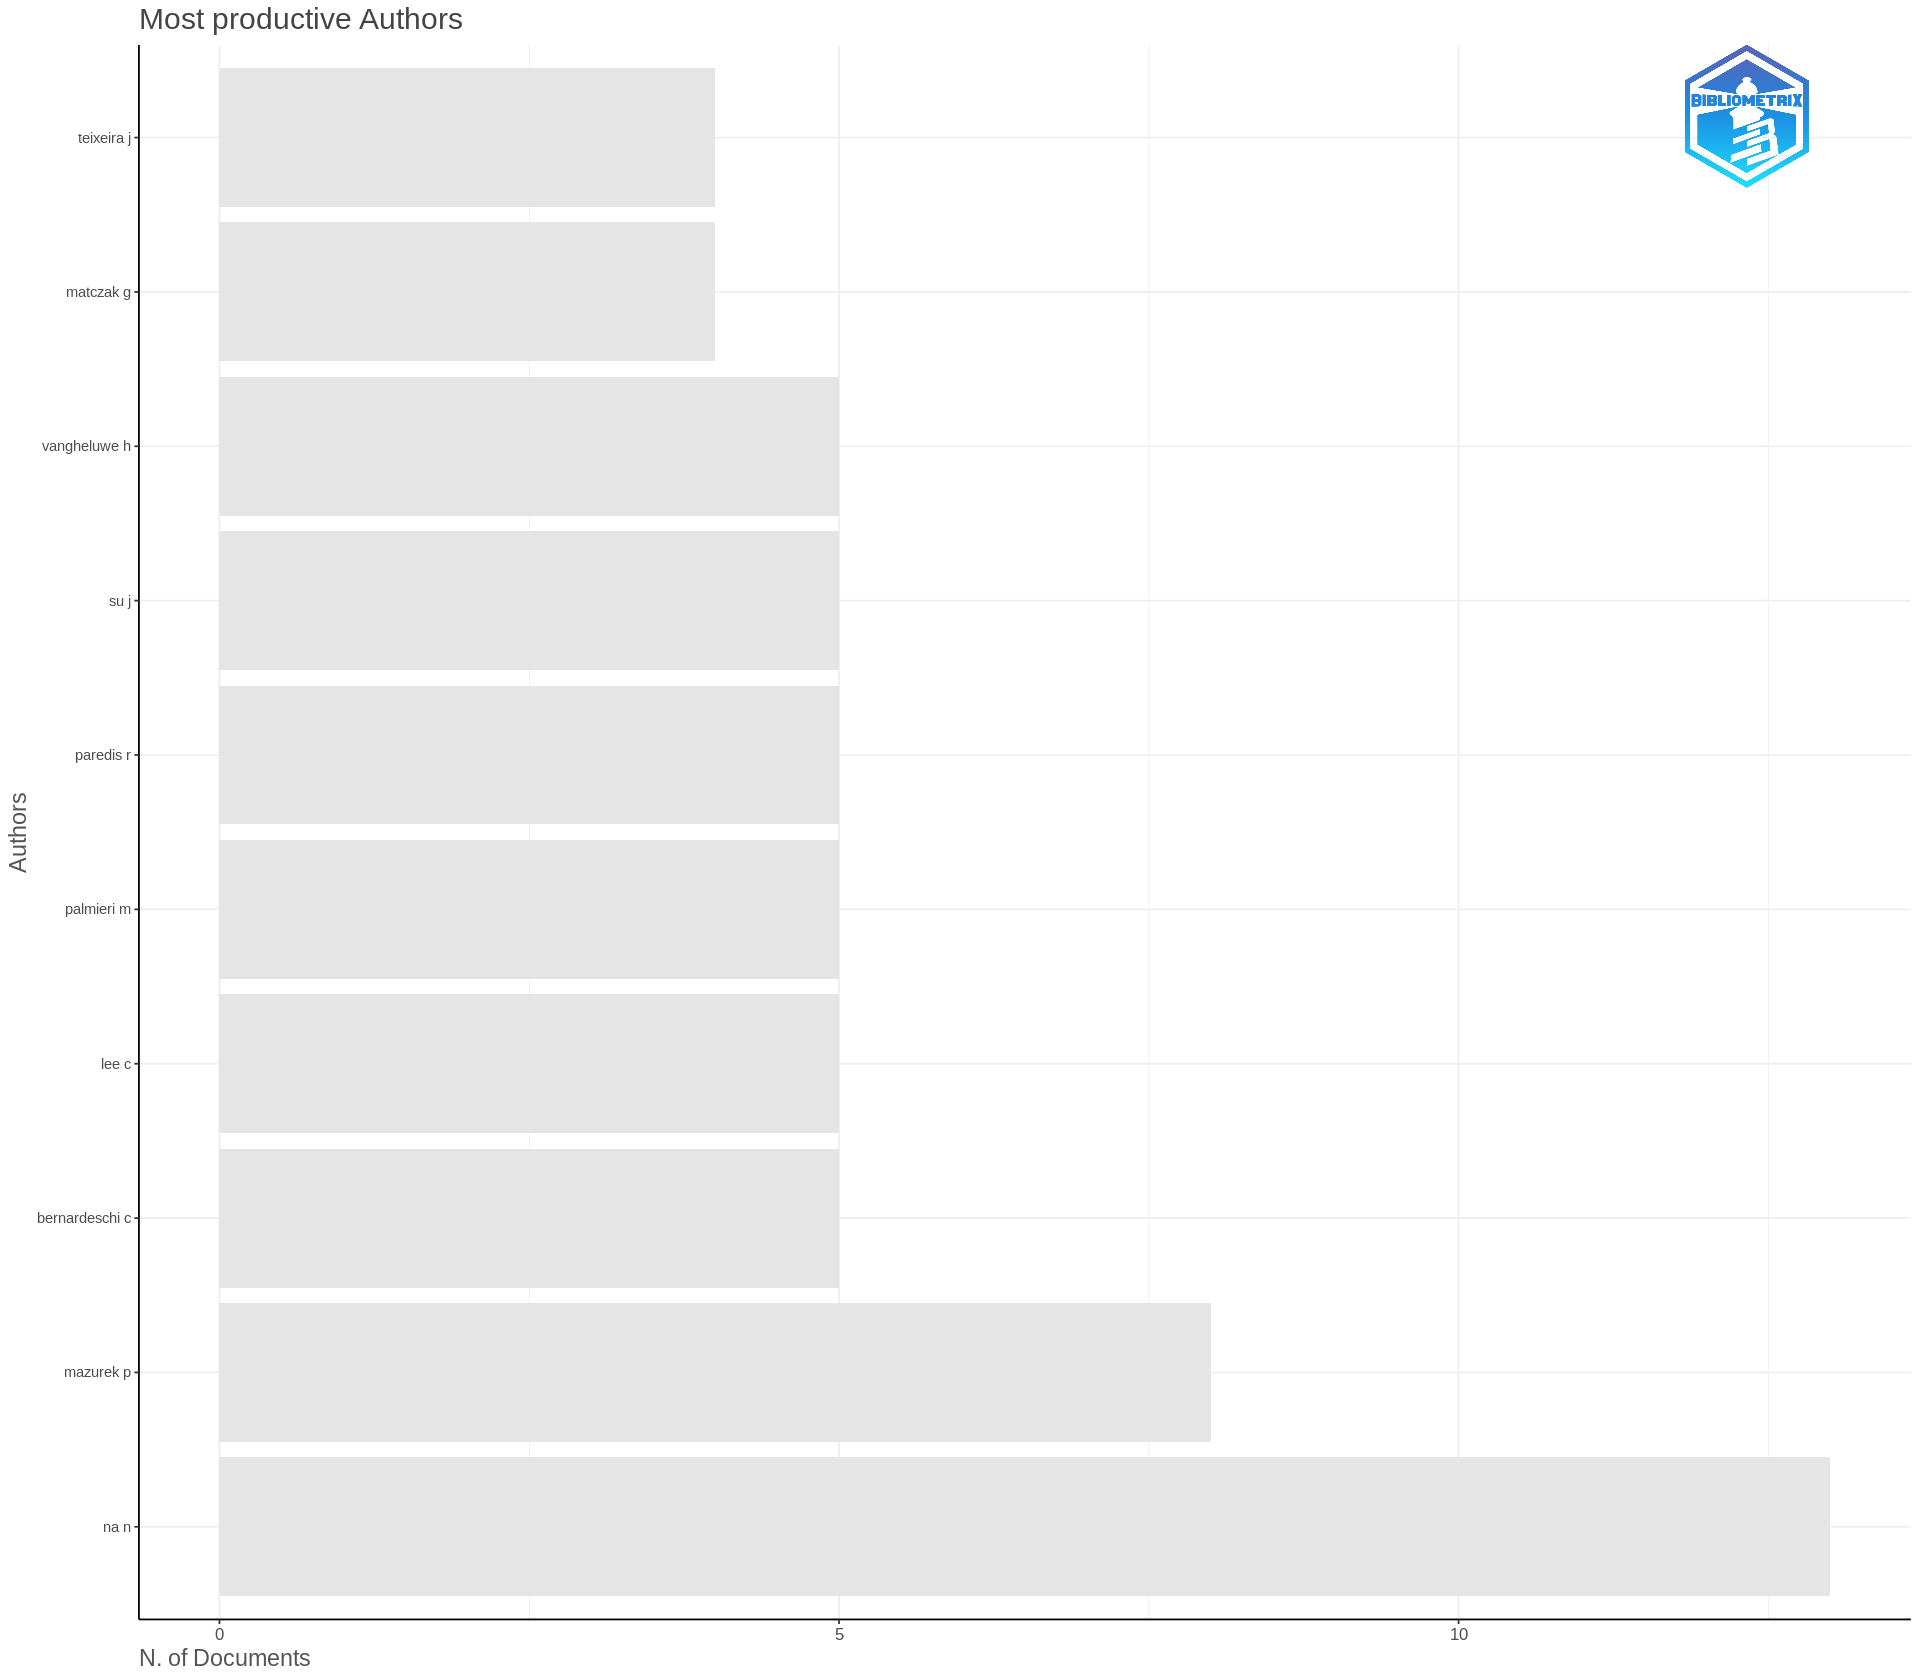

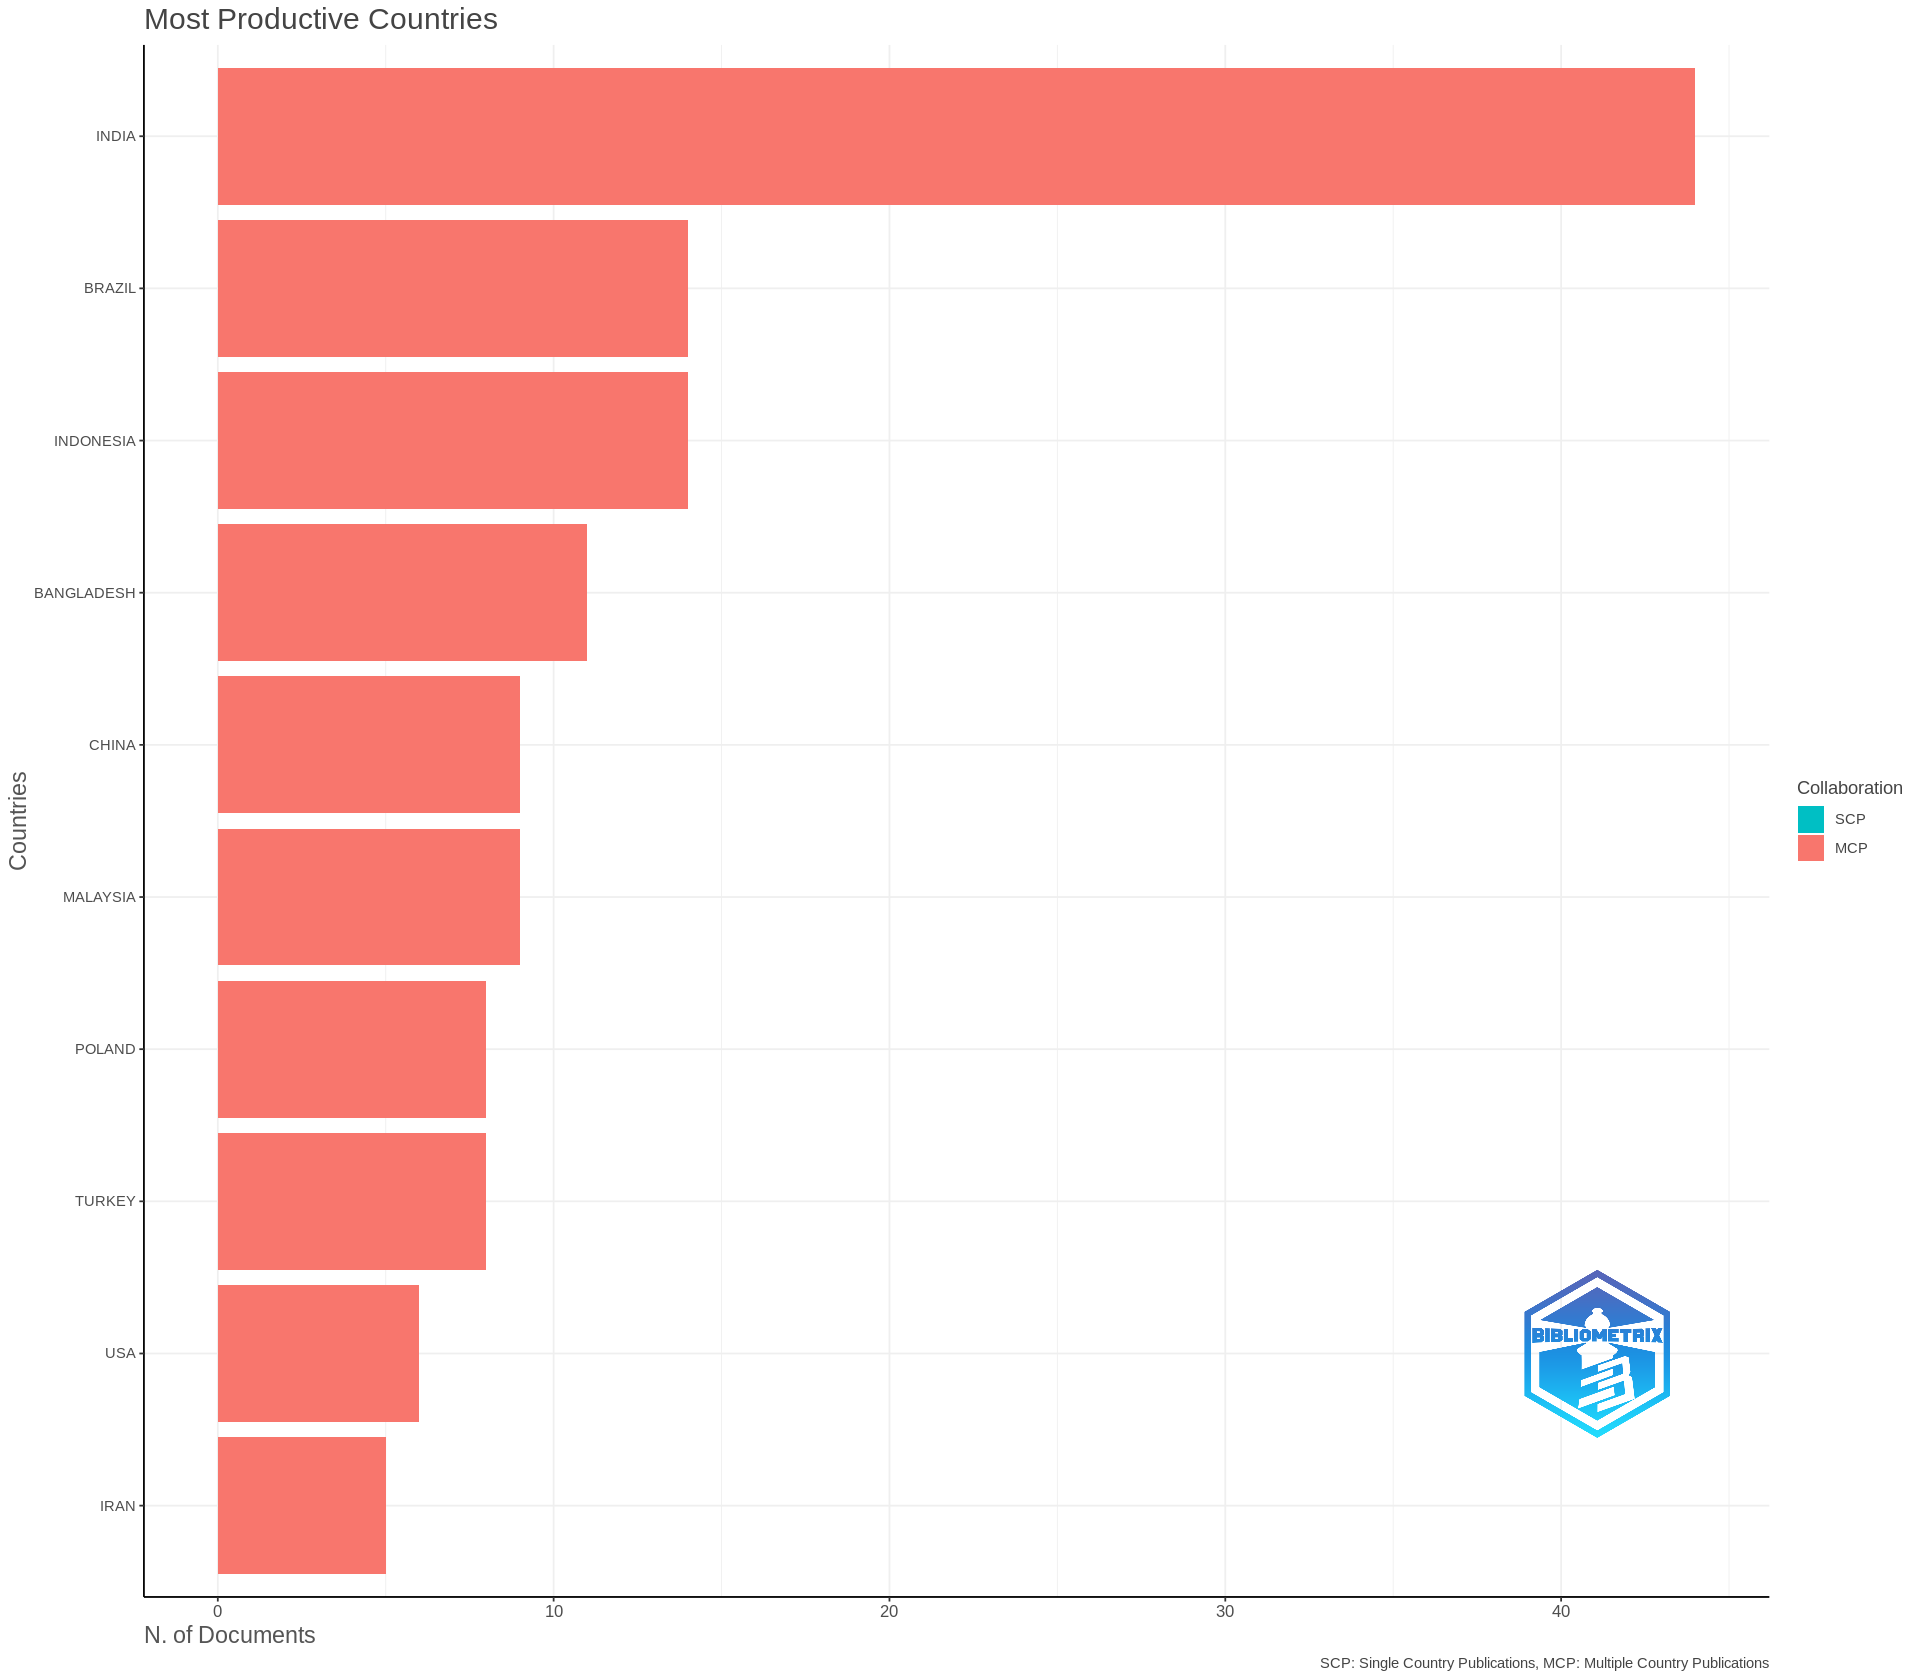

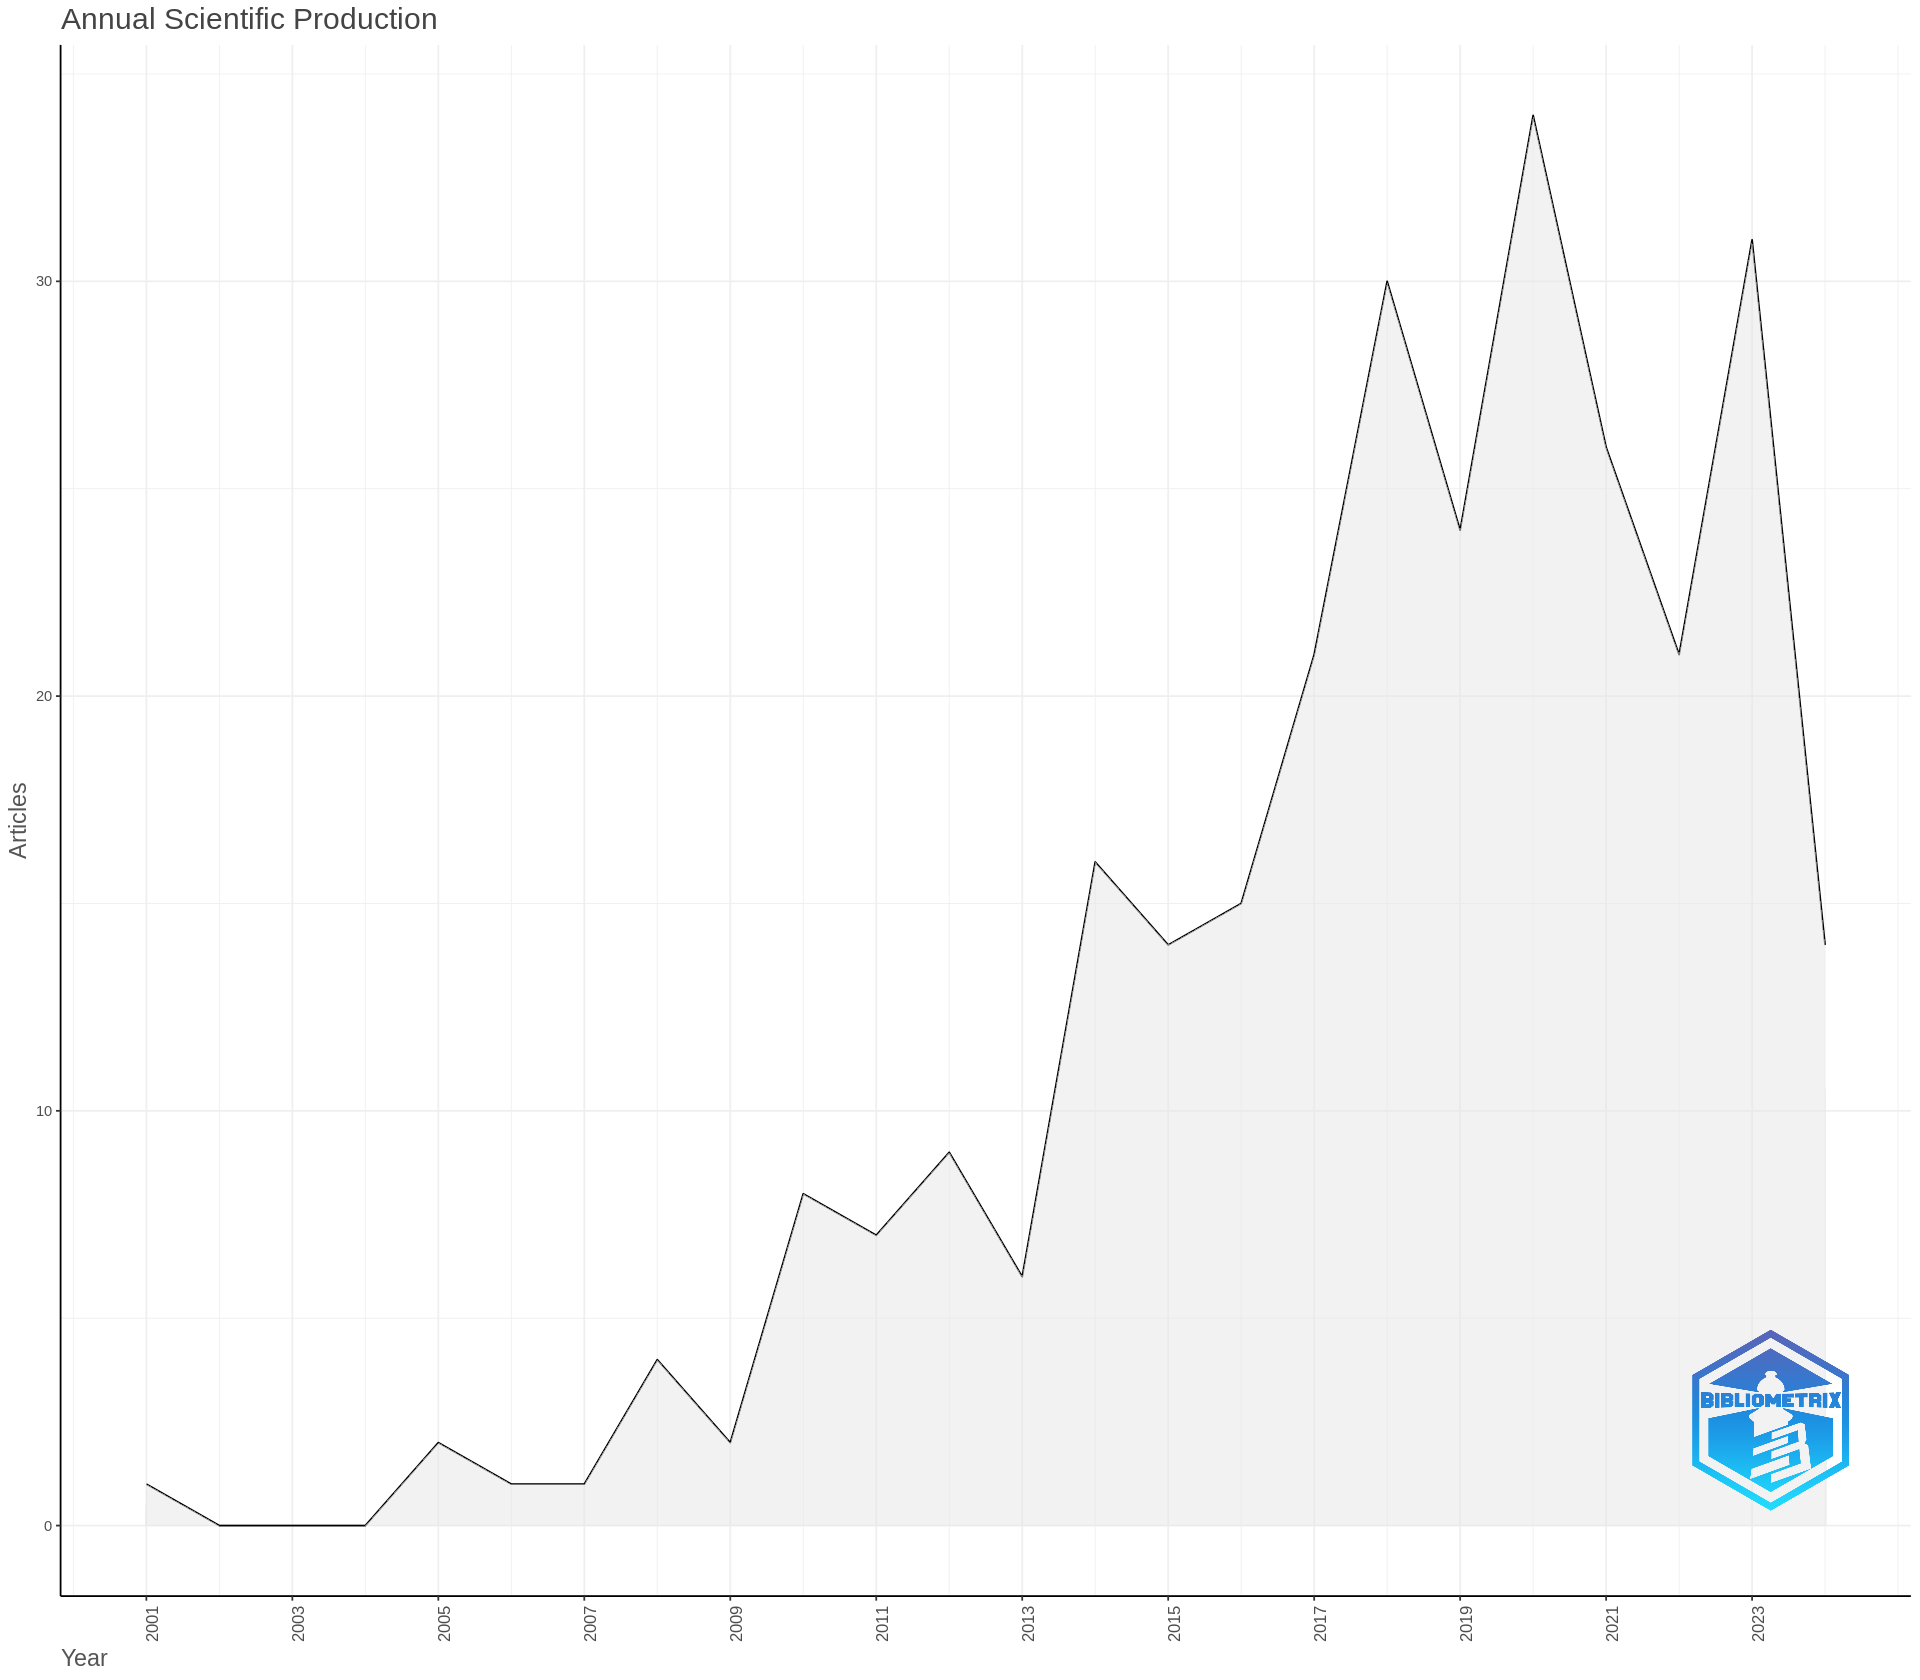

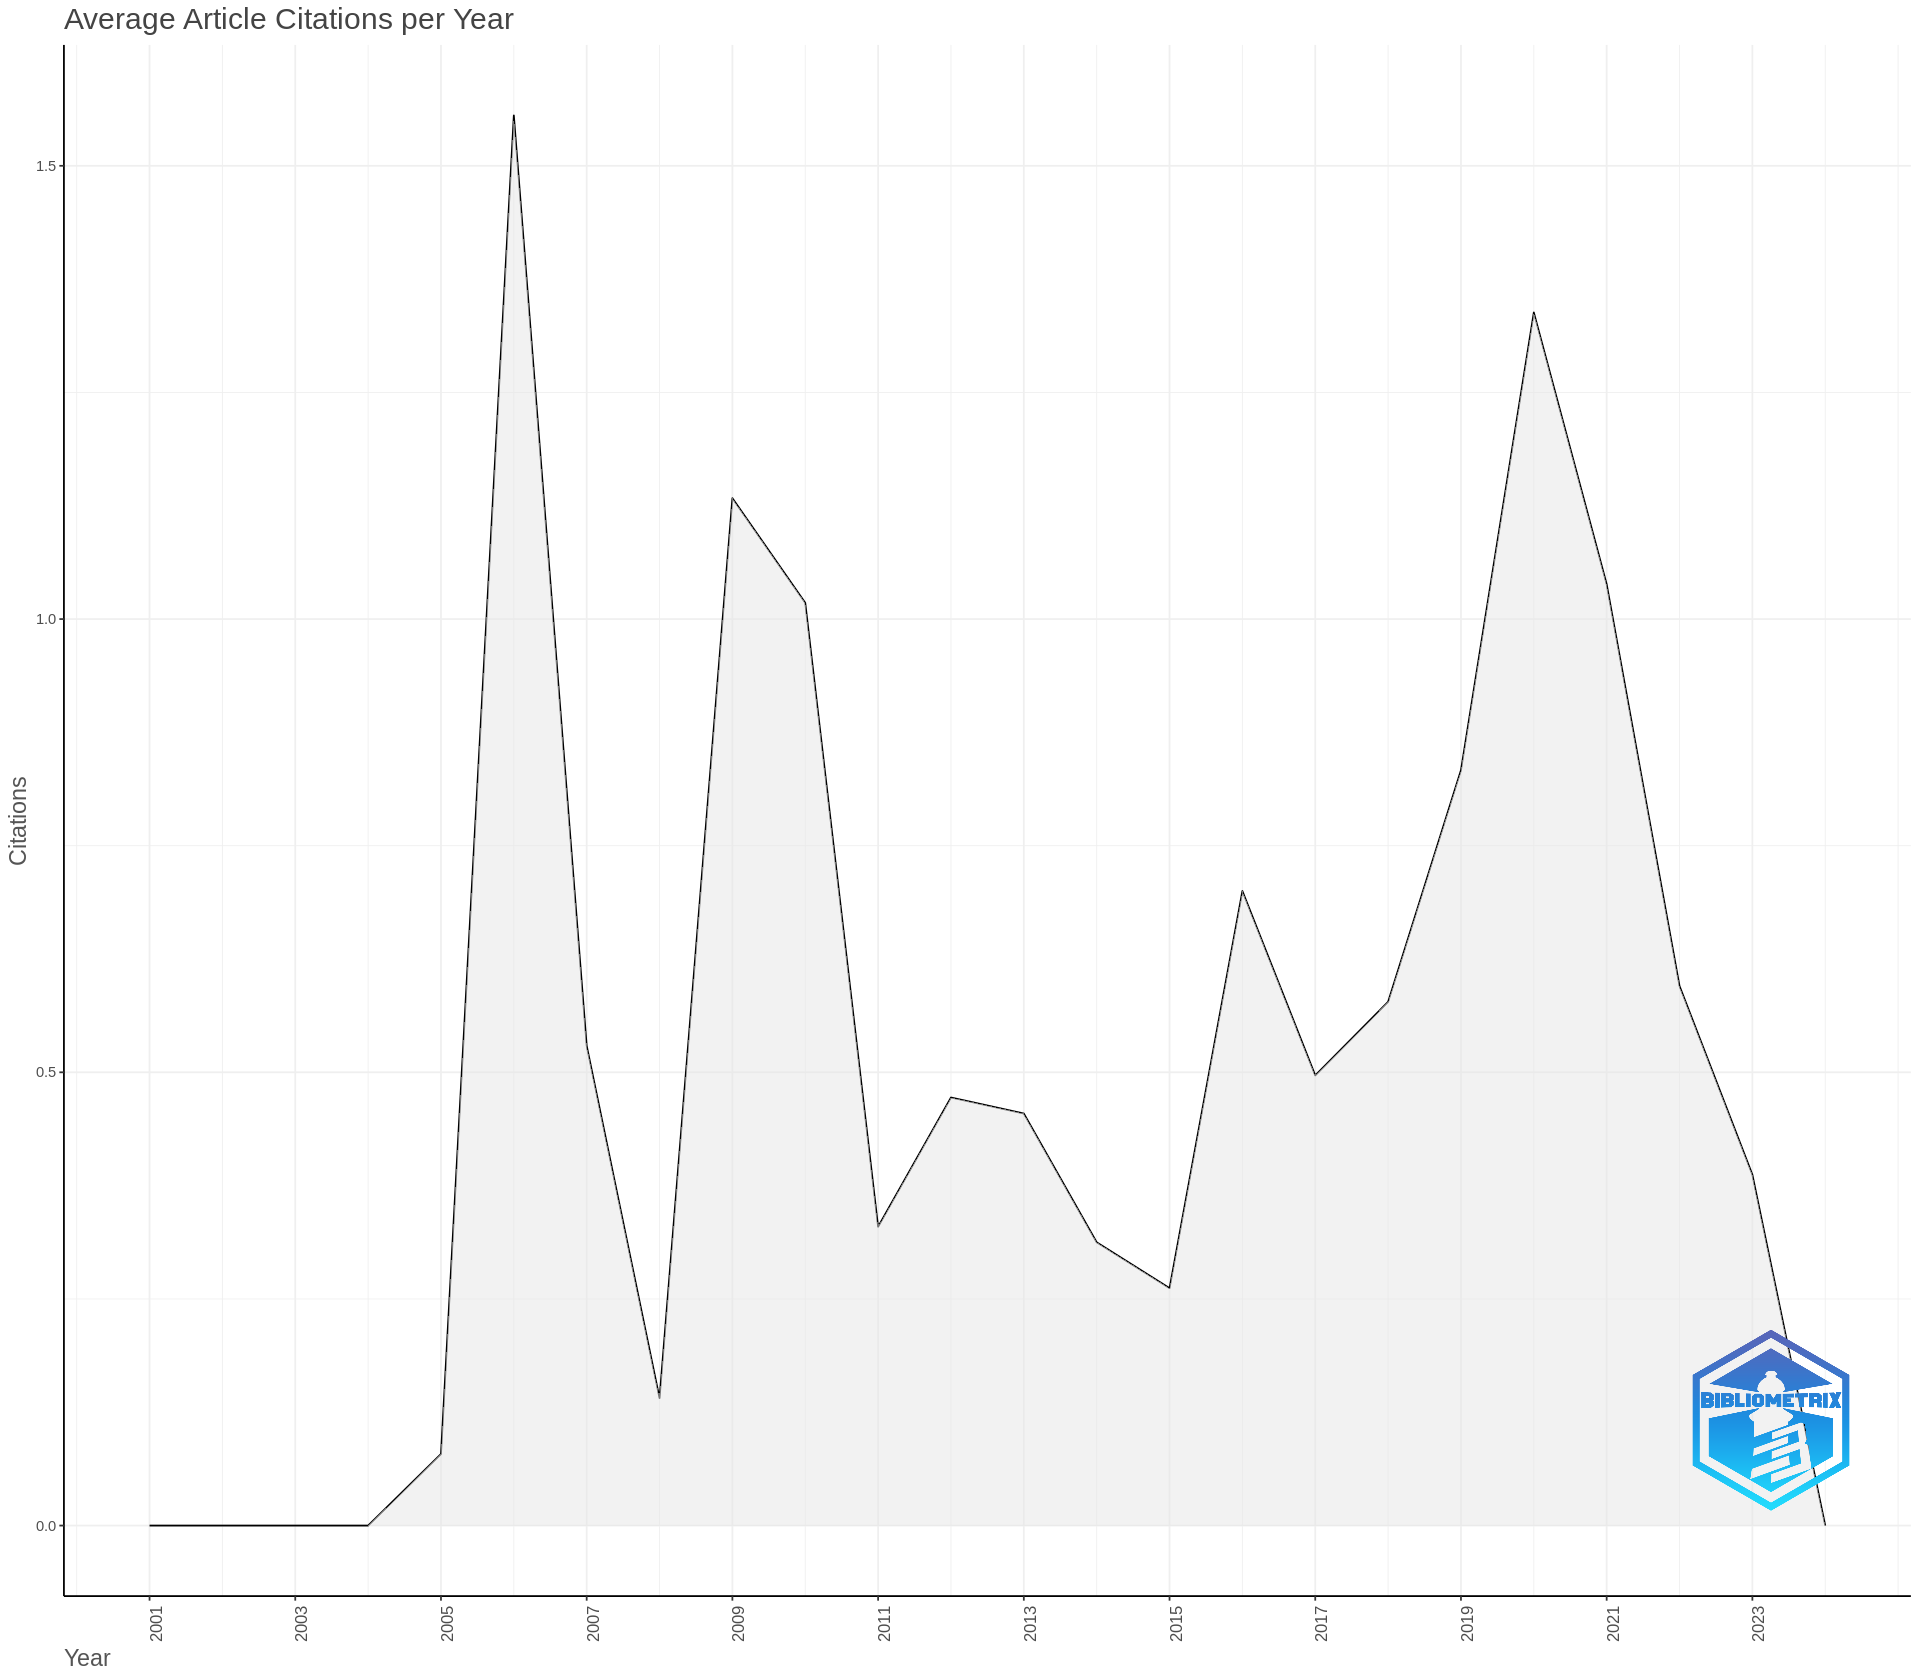

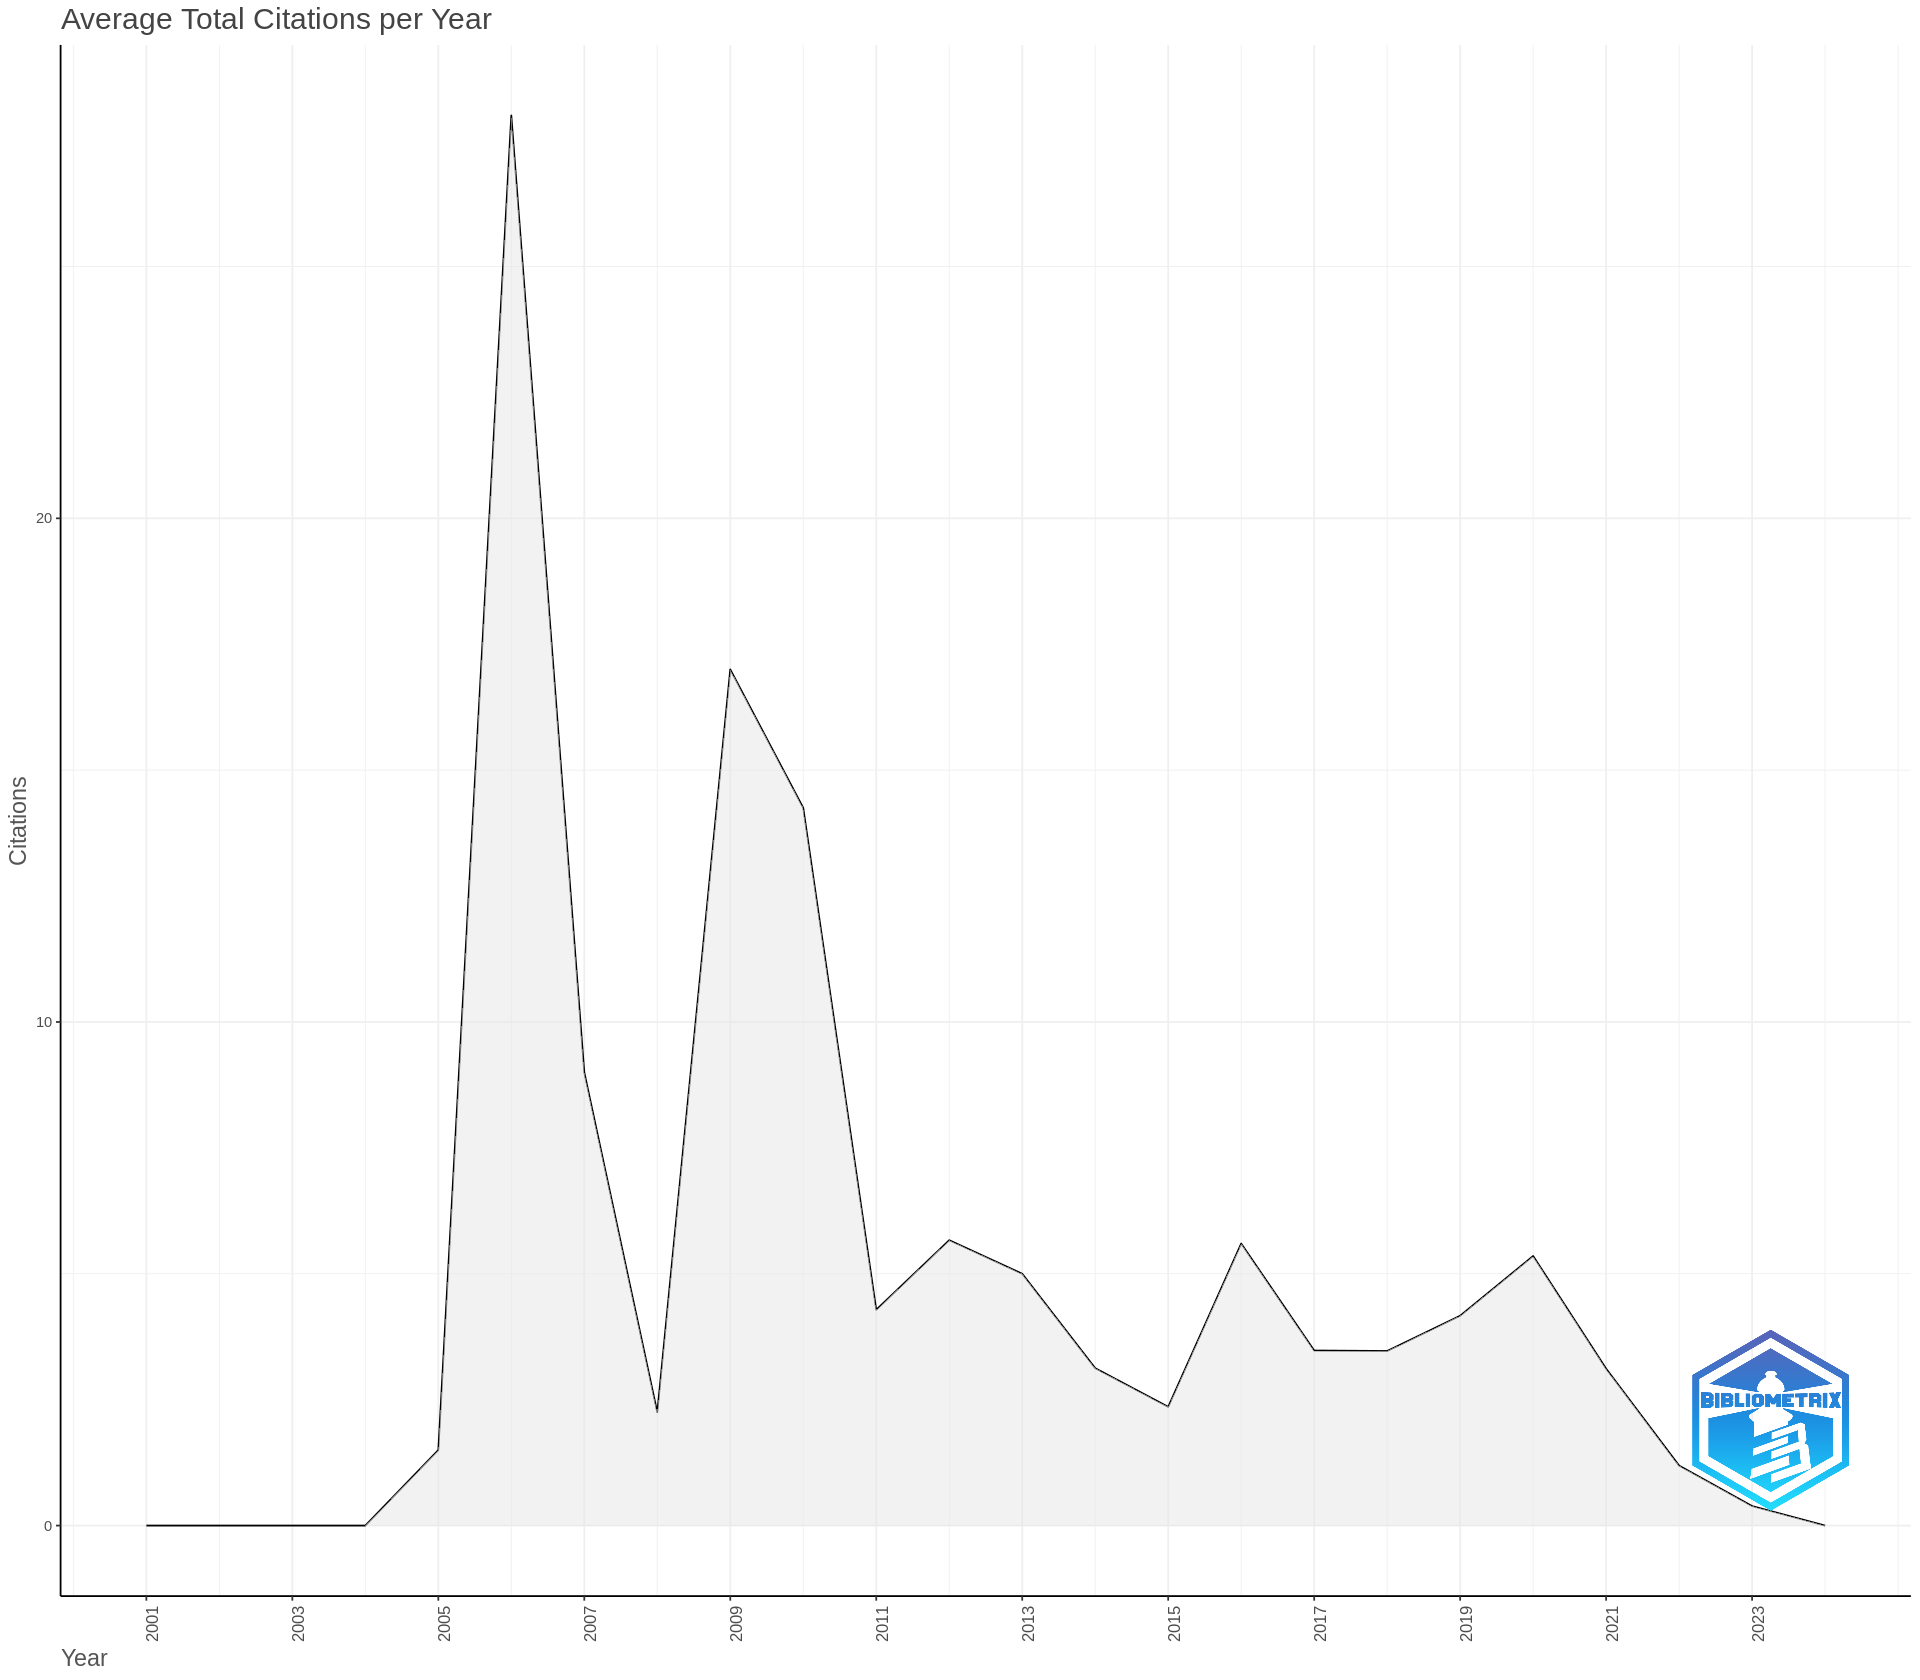

In [ ]:
options(repr.plot.width=16, repr.plot.height=14)
plot(x=output, k=10, pause=F)

In [ ]:
output.summary$MostProdAuthors

Authors        Articles Authors        Articles Fractionalized
1  na n           13       na n           13.00                  
2  mazurek p       8       mazurek p       6.00                  
3  bernardeschi c  5       paredis r       2.17                  
4  lee c           5       vangheluwe h    2.17                  
5  palmieri m      5       matczak g       2.00                  
6  paredis r       5       bernardeschi c  1.50                  
7  su j            5       gawlicki m      1.50                  
8  vangheluwe h    5       palmieri m      1.50                  
9  matczak g       4       li j            1.17                  
10 teixeira j      4       lee c           1.10

In [ ]:
M1[grep("^mazurek", M1$AU, ignore.case = TRUE),]$DI #first author

[1] "10.1109/MMAR.2014.6957456"    "10.1007/978-3-319-11331-9_51" "10.1109/MMAR.2015.7284010"    "10.1007/978-3-319-10662-5_14"

In [ ]:
M1[grep("^bernardeschi", M1$AU, ignore.case = TRUE),]$DI #first author

[1] "10.5220/0007705307000708"   "10.1007/s11416-019-00344-9"

In [ ]:
M1[grep("^lee c", M1$AU, ignore.case = TRUE),]$TI #first author

[1] "a project-based laboratory for learning embedded system design with industry support"          
[2] "a project-based laboratory for learning embedded system designs with support from the industry"

In [ ]:
M1[grep("^palmieri m", M1$AU, ignore.case = TRUE),]$DI #first author

[1] "10.1109/SMARTCOMP55677.2022.00045" "10.1007/978-3-319-74781-1_29"      "10.1109/SMARTCOMP55677.2022.00075"

Demo: An On-line Supervisor for the Line Follower Robot (10.1109/SMARTCOMP55677.2022.00045) - without access </br>
A Workflow for Designing an On-line Supervisor for Cyber-Physical Systems: a Case Study 10.1109/SMARTCOMP55677.2022.00075 - without access </br>

In [ ]:
M1[grep("^paredis r", M1$AU, ignore.case = TRUE),]$DI #first author

[1] NA                                  "10.5220/0010717600003062"          "10.23919/ANNSIM52504.2021.9552143"
[4] NA                                  "10.1007/978-3-031-37228-5_6"

Towards a digital Z framework based on a family of architectures and a virtual knowledge graph 10.1007/978-3-031-37228-5_6 - without access

In [ ]:
M1[grep("^su j", M1$AU, ignore.case = TRUE),]$TI #first author

[1] "an intelligent line-following robot project for introductory robot courses"
[2] "a hands-on laboratory for autonomous mobile robot design courses"

In [ ]:
M1[grep("^matczak", M1$AU, ignore.case = TRUE),]$DI #first author

[1] "10.1007/978-3-319-57261-1_41" "10.1007/978-3-319-26227-7_61" "10.15199/48.2017.01.17"       "10.1007/978-3-319-23814-2_19"

Matczak, G., & Mazurek, P. (2016). Tracklet-Based Viterbi Track-Before-Detect Algorithm for Line Following Robots. Proceedings of the 9th International Conference on Computer Recognition Systems CORES 2015, 649–658. doi:10.1007/978-3-319-26227-7_61  - without access </br>
Viterbi Algorithm for Noise Line Following Robots 10.1007/978-3-319-23814-2_19 - without access

In [ ]:
output.summary$MostRelSources

Sources                                                                                                                                  
1  aip conference proceedings                                                                                                               
2  advances in intelligent systems and computing                                                                                            
3  lecture notes in computer science (including subseries lecture notes in artificial intelligence and lecture notes in bioinformatics)     
4  15th latin american robotics symposium 6th brazilian robotics symposium 9th workshop on robotics in education (lars/sbr/wre 2018)        
5  2022 latin american robotics symposium (lars) 2022 brazilian symposium on robotics (sbr) and 2022 workshop on robotics in education (wre)
6  ceur workshop proceedings                                                                                                                
7  international journal of engineering and advanced technology                                                                             
8  2018 ieee 27th international scientific conference electronics et 2018 - proceedings                                                     
9  2022 ieee international conference on smart computing (smartcomp 2022)                                                                   
10 arpn journal of engineering and applied sciences                                                                                         
   Articles
1  9       
2  8       
3  6       
4  3       
5  3       
6  3       
7  3       
8  2       
9  2       
10 2

In [ ]:
output.summary$MostCitedPapers

Paper                                                                          DOI                            TC TCperYear
1  PAKDAMAN M, 2009, INT C COMP ELEC ENG                                          10.1109/ICCEE.2009.43          34 2.12     
2  LEE C, 2010, IEEE T EDUC                                                       10.1109/TE.2008.2010990        32 2.13     
3  BAJESTANI S, 2010, ICEIE - INT CONF ELECTRON INF ENG, PROC                     10.1109/ICEIE.2010.5559826     32 2.13     
4  DUPUIS J, 2006, THIRD CANADIAN CONF COMPUT ROBOT VISION                        10.1109/CRV.2006.32            28 1.47     
5  PÉREZ E, 2019, COMPUT APPL ENG EDUC                                            10.1002/cae.22074              26 4.33     
6  SAADATMAND S, 2020, ANNU COMPUT COMMUN WORKSHOP CONF, CCWC                     10.1109/CCWC47524.2020.9031160 26 5.20     
7  THIRUMURUGAN J, 2010, INT CONF "EMERG TRENDS ROB COMMUN TECHNOL", INTERACT     10.1109/INTERACT.2010.5706151  25 1.67     
8  ALMASRI M, 2016, SENSORS-BASEL                                                 10.3390/s16010024              22 2.44     
9  LATIF A, 2020, J ROBOT CONTROL                                                 10.18196/jrc.1316              22 4.40     
10 ENGIN M, 2012, 2012 5TH EUROPEAN DSP EDUCATION AND RESEARCH CONFERENCE (EDERC) NA                             21 1.62     
   NTC 
1  2.00
2  2.25
3  2.25
4  1.00
5  6.24
6  4.86
7  1.75
8  3.93
9  4.11
10 3.71

An ultra-low cost line follower robot as educational tool for teaching programming and circuit's foundations 10.1002/cae.22074 - without access

# Co-citation (authors)

In [ ]:
M2 <- metaTagExtraction(M1, Field = "CR_AU", sep = ";")
neighborhood_matrix <- biblioNetwork(M2, analysis = "co-citation", network = "authors")

[1] "Matrix is empty!!"


## Co-Citation plot by author top ten

$graph
IGRAPH abb160a UNW- 11 5 -- 
+ attr: alpha (g/n), ylim (g/n), xlim (g/n), rescale (g/l), asp (g/n), layout (g/n), main (g/c), name (v/c), deg
| (v/n), size (v/n), label.cex (v/n), color (v/c), community (v/n), label.dist (v/n), frame.color (v/c), label.color
| (v/c), label.font (v/n), label (v/c), num (e/n), width (e/n), color (e/c), lty (e/n), weight (e/n), curved (e/l)
+ edges from abb160a (vertex names):
[1] pakdaman m--engin m pakdaman m--engin m pakdaman m--engin m pakdaman m--engin m pakdaman m--engin m

$graph_pajek
IGRAPH caa6388 UNW- 11 76 -- 
+ attr: name (v/c), deg (v/n), size (v/n), label.cex (v/n), id (v/c), num (e/n), weight (e/n)
+ edges from caa6388 (vertex names):
 [1] anonymous --pakdaman m     anonymous --pakdaman m     anonymous --bernardeschi c anonymous --bernardeschi c
 [5] anonymous --bernardeschi c anonymous --engin m        anonymous --engin m        anonymous --engin m       
 [9] anonymous --palmieri m     anonymous --palmieri m     anonymous --palmie

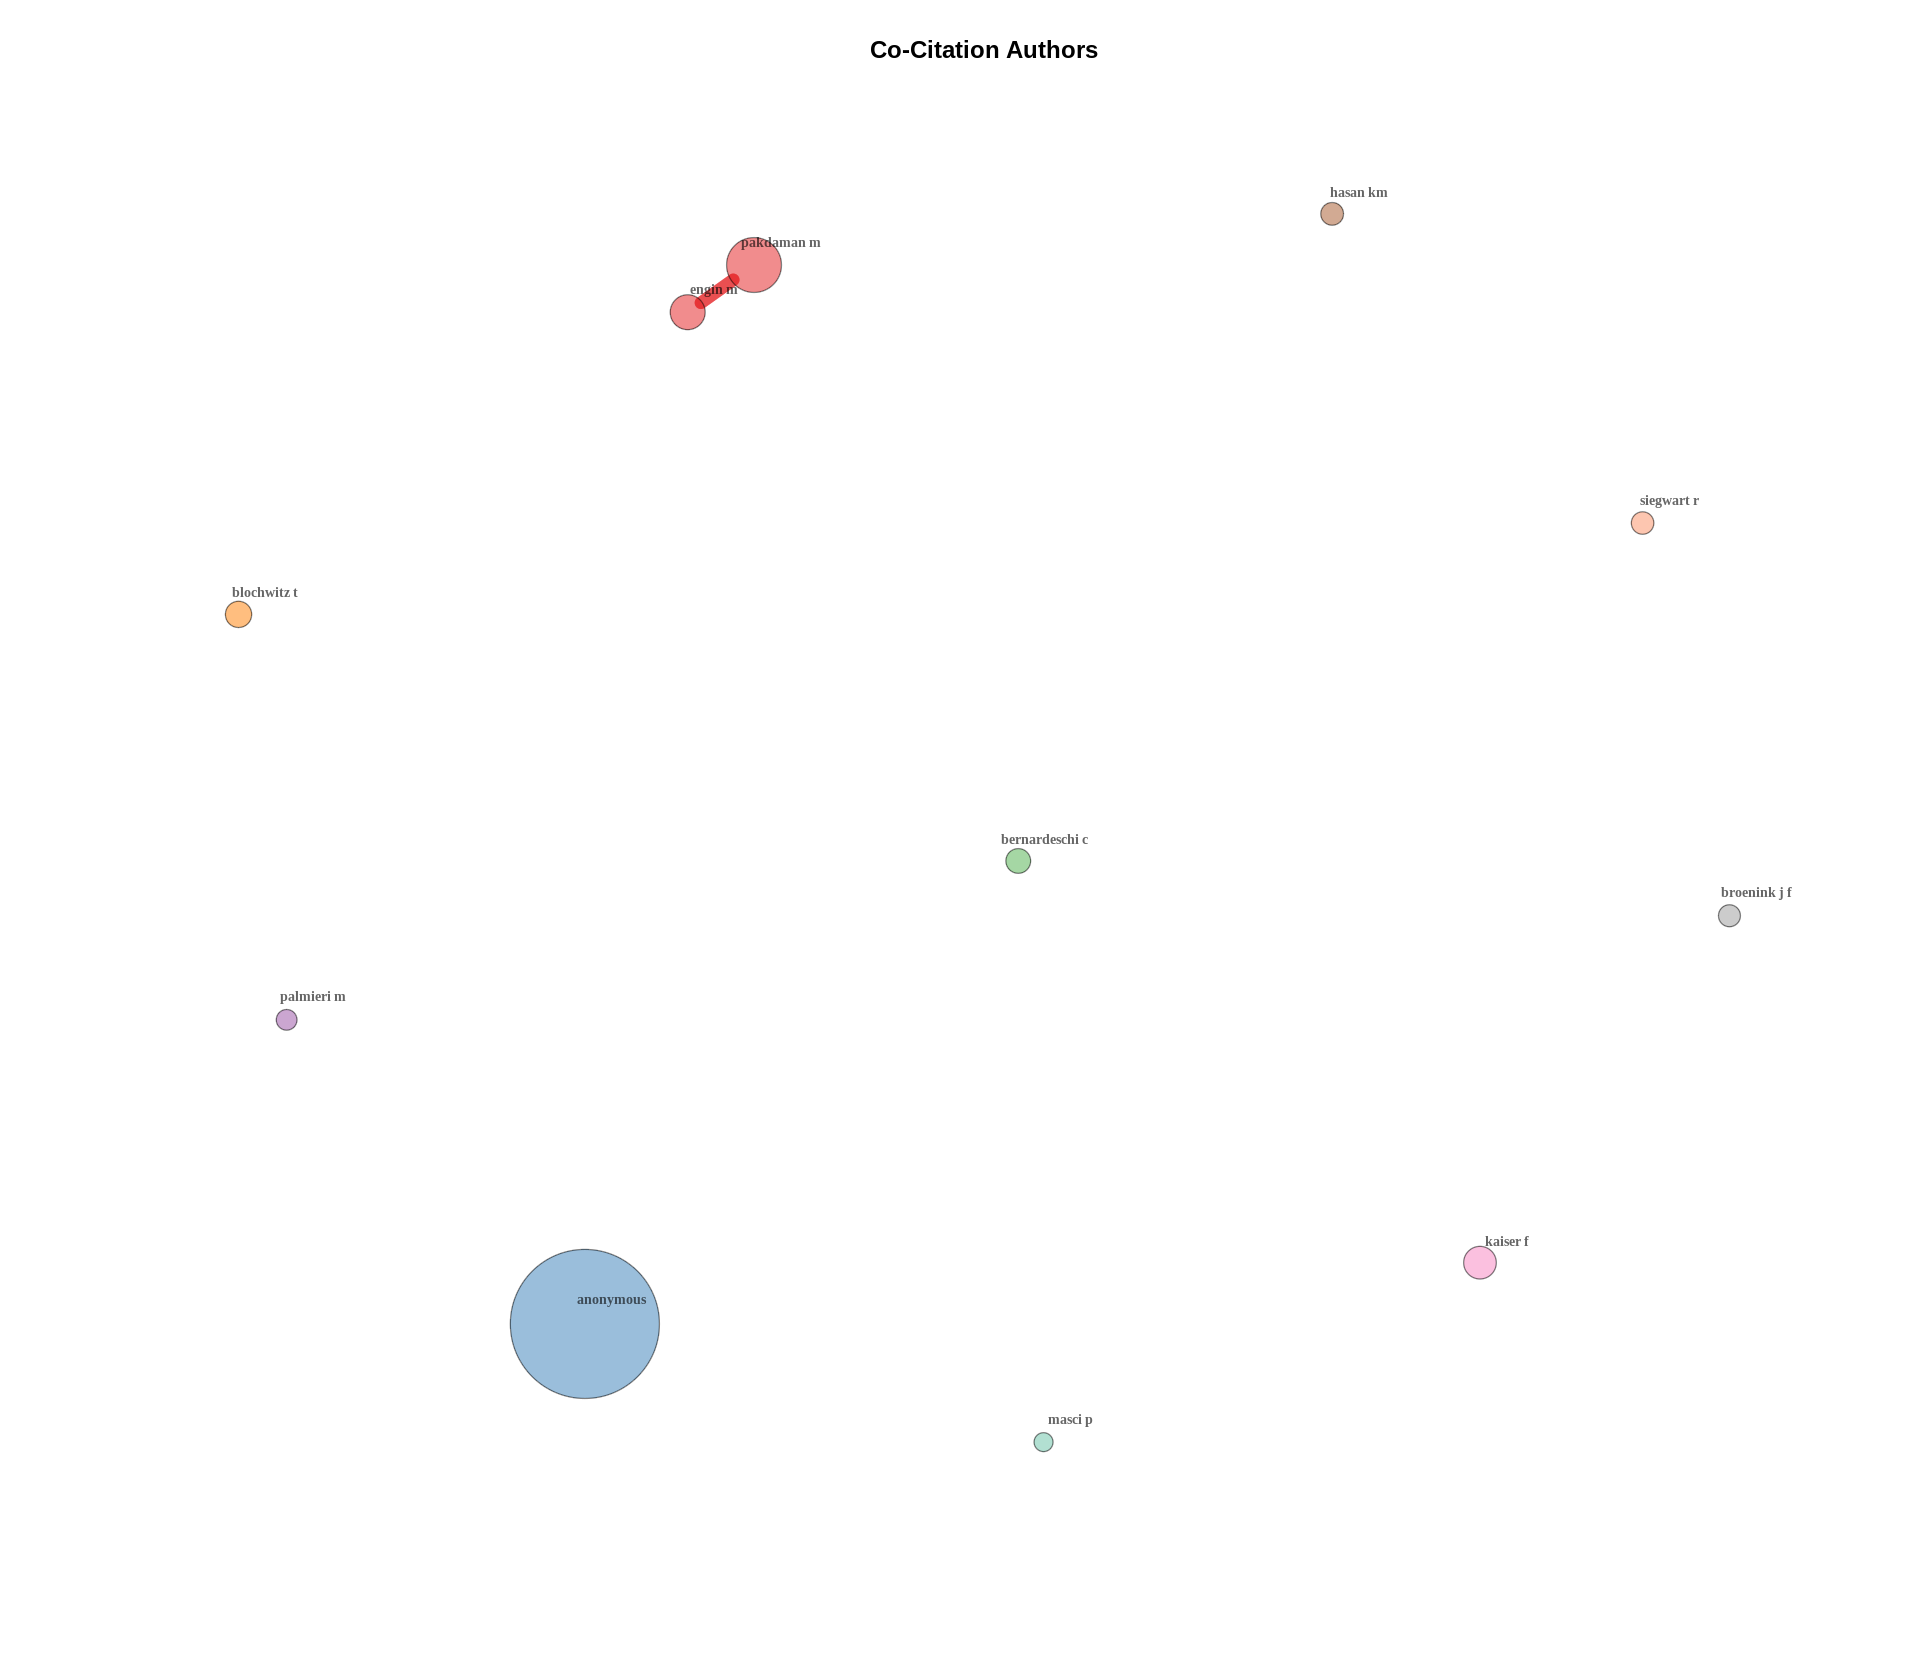

In [ ]:
# Removing duplicated
networkPlot(
  neighborhood_matrix,
  n = 11,
  Title = "Co-Citation Authors",
  type = "fruchterman",
  size.cex=TRUE,
  size=20,
  remove.multiple=FALSE,
  labelsize=0.7,
  edgesize = 10,
  edges.min=5)

In [ ]:
M1[grep("^engin", M1$AU, ignore.case = TRUE),]$TI #first author

[1] "path planning of line follower robot"

In [ ]:
library(tidyverse)

search.author<-function(name){
# Concatenate all columns of M1 into a single column
M1_concatenated <- M1 %>%
  unite("all_text", everything(), sep = " ", remove = FALSE)

# Search for a string (e.g., "benavi") in the concatenated column
result <- M1_concatenated %>%
  filter(grepl(name, all_text, ignore.case = TRUE))
return(result$DI)}

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract() masks stringdist::extract()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
search.author("hasan km")

[1] "10.1007/978-3-319-56991-8_42"          
[2] "10.1007/978-3-030-00353-1_41"          
[3] NA                                      
[4] "10.1109/LARS/SBR/WRE56824.2022.9995776"
[5] NA                                      
[6] NA

In [ ]:
search.author("siegwart r")

[1] NA                                "10.1016/j.promfg.2019.02.254"   
[3] "10.1109/LARS/SBR/WRE.2018.00103" "10.32604/iasc.2021.016219"      
[5] "10.32604/cmc.2021.015906"

In [ ]:
search.author("kaiser f")

[1] "10.1007/978-3-319-56991-8_42" NA                            
[3] "10.1007/s40430-020-02645-3"   NA                            
[5] "10.32604/iasc.2021.016219"    NA                            
[7] "10.32604/cmc.2021.015906"

In [ ]:
search.author("broenink")

[1] "10.1007/978-3-319-74781-1_29"    "10.5220/0007705307000708"       
[3] "10.1007/s11416-019-00344-9"      "10.1109/WETICE.2012.69"         
[5] "10.1109/HPCC-CSS-ICESS.2015.265" NA

### Network Analysis

In [ ]:
network_analysis <- networkStat(neighborhood_matrix)
#top 10
summary(network_analysis,k=10)



Main statistics about the network

 Size                                  1280 
 Density                               0.017 
 Transitivity                          0.706 
 Diameter                              6 
 Degree Centralization                 0.354 
 Average path length                   2.947 
 





## Co-citation analysis (references)

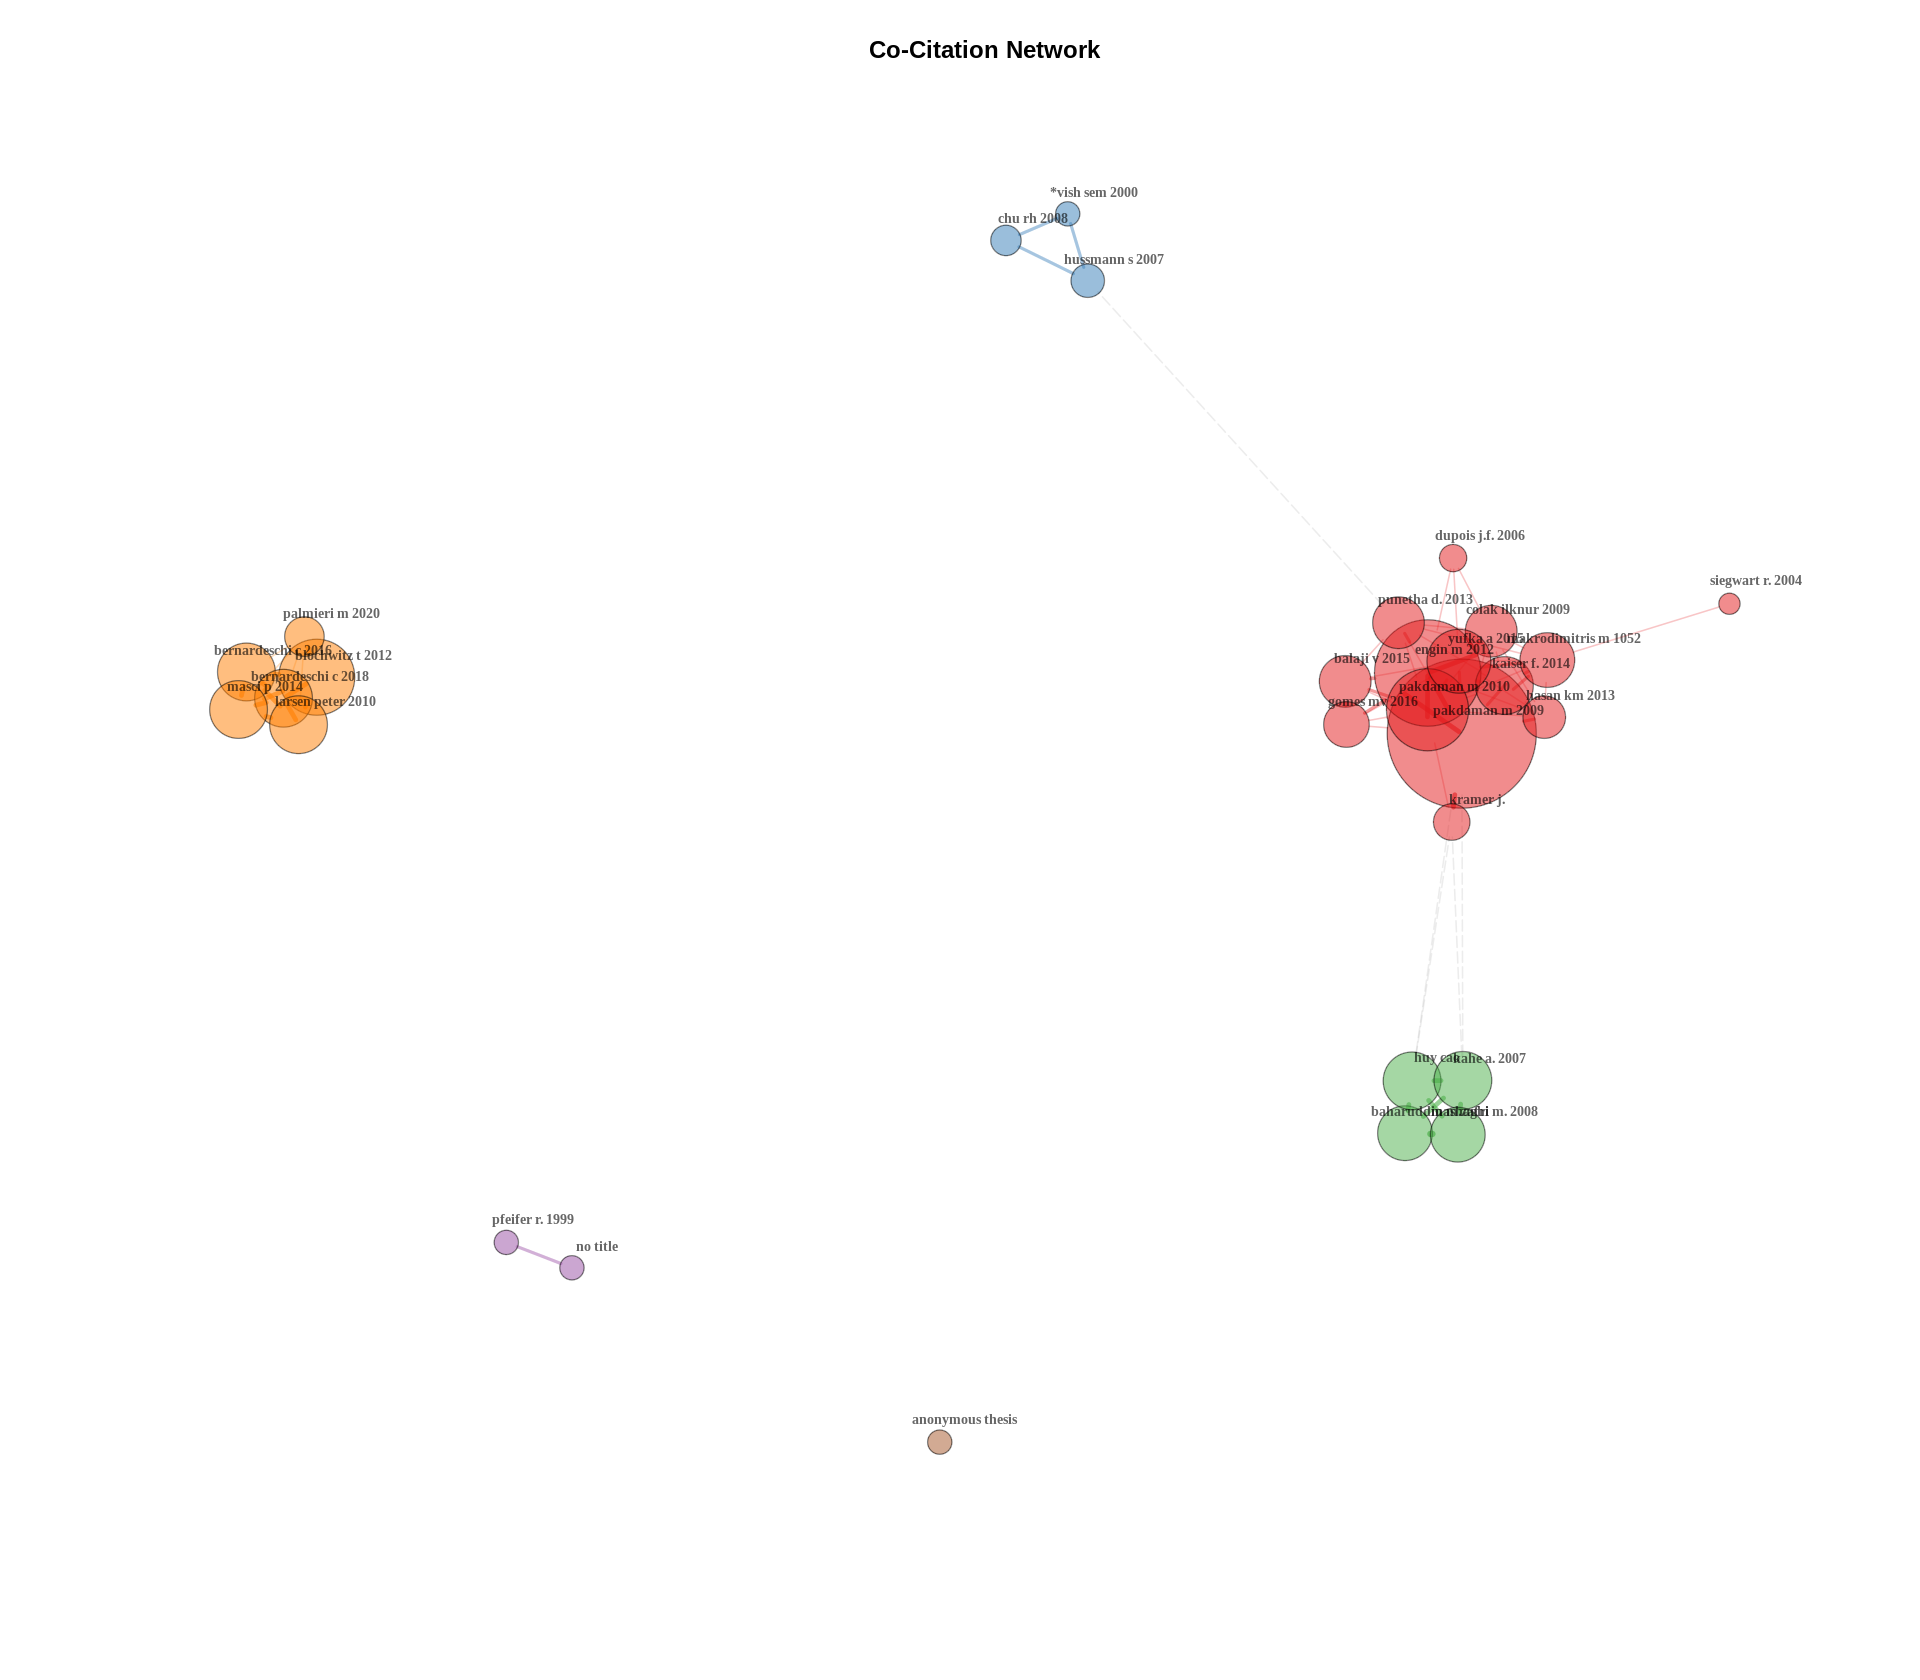

In [ ]:
# Create a co-citation network

NetMatrix <- biblioNetwork(M1, analysis = "co-citation", network = "references", n=30, sep = ";")

# Plot the network
net=networkPlot(NetMatrix, Title = "Co-Citation Network", type = "fruchterman", size=T, remove.multiple=FALSE, labelsize=0.7,edgesize = 5)

In [ ]:
library(tidyverse)

search.author<-function(name){
# Concatenate all columns of M1 into a single column
M1_concatenated <- M1 %>%
  unite("all_text", everything(), sep = " ", remove = FALSE)

# Search for a string (e.g., "benavi") in the concatenated column
result <- M1_concatenated %>%
  filter(grepl(name, all_text, ignore.case = TRUE))
return(result$TI)}

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract() masks stringdist::extract()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [26]:
library(tidyverse)

search.author.ano<-function(name){
# Concatenate all columns of M1 into a single column
M1_concatenated <- M1 %>%
  unite("all_text", everything(), sep = " ", remove = FALSE)

# Search for a string (e.g., "benavi") in the concatenated column
result <- M1_concatenated %>%
  filter(grepl(name, all_text, ignore.case = TRUE))
return(result$PY)}

In [ ]:
search.author("vish sem") #2000 a project-based laboratory for learning embedded system designs with support from the industry

[1] "a project-based laboratory for learning embedded system design with industry support"          
[2] "a project-based laboratory for learning embedded system designs with support from the industry"

In [ ]:
search.author("chu rh") #2008

[1] "10.1109/TE.2008.2010990"        "10.1109/TAEE54169.2022.9840543"
[3] NA

In [ ]:
search.author("hussmann s") #2007

[1] "10.29042/2020-10-2-232-237" "10.1109/TE.2008.2010990"   
[3] NA

In [ ]:
search.author("blochwitz t") #2012

[1] "10.1109/SMARTCOMP55677.2022.00045" "10.1007/978-3-319-74781-1_29"     
[3] "10.5220/0007705307000708"          "10.1007/s11416-019-00344-9"       
[5] "10.1109/SMARTCOMP55677.2022.00075"

In [ ]:
search.author.ano("blochwitz t") #nothing related to 2012

[1] 2022 2018 2019 2020 2022

In [ ]:
search.author("masci p") #2014

[1] "10.1007/978-3-319-74781-1_29" "10.5220/0007705307000708"    
[3] "10.1007/s11416-019-00344-9"

In [ ]:
search.author.ano("masci p") #nothing related to 2014

[1] 2018 2019 2020

In [ ]:
search.author("larsen peter") #2010

[1] "10.1007/978-3-319-74781-1_29"       "10.5220/0007705307000708"          
[3] "10.1007/s11416-019-00344-9"         "10.1016/B978-0-32-385347-7.00015-8"

In [ ]:
search.author.ano("larsen peter") #nothing realted to 2010

[1] 2018 2019 2020 2020

In [ ]:
search.author("bernardeschi c") #2016 e 2018

[1] "10.1109/SMARTCOMP55677.2022.00045" "10.1007/978-3-319-74781-1_29"     
[3] "10.5220/0007705307000708"          "10.1007/s11416-019-00344-9"       
[5] "10.1109/SMARTCOMP55677.2022.00075"

In [ ]:
search.author.ano("bernardeschi c") #2018

[1] 2022 2018 2019 2020 2022

In [ ]:
search.author("bernardeschi c")[2]

[1] "co-simulation of semi-autonomous systems: the line follower robot case study"

In [ ]:
search.author("pakdaman m") #2010

[1] "design and implementation of line follower robot"                                                        
 [2] "controlling line follower robot with the remote web server"                                              
 [3] "development of a line-follower robot for robotic competition purposes"                                   
 [4] "design implementation of high-performance line following robot"                                          
 [5] "sliding mode control of a line following robot"                                                          
 [6] "psoc 4 line-follower robot for engineering mixed signal electronics course"                              
 [7] "design and implementation of rgb color line following robot"                                             
 [8] "a line follower robot from design to implementation: technical issues and problems"                      
 [9] "sensor based autonomous color line follower robot with obstacle avoidance"                               
[10] "improving early robotics education using a line-following robot simulator"                               
[11] "autonomous control of a line follower robot using a q-leaming controller"                                
[12] "implementation of autonomous line follower robot"                                                        
[13] "line following robot using arduino for hospitals"                                                        
[14] "a new approach for line following robot using radius of path curvature and differential drive kinematics"
[15] "diffusion of robotics through line follower robots"                                                      
[16] "computer vision assisted line following robot"                                                           
[17] "software implementation of a static store system using the digital differential analyzer algorithm"      
[18] "design and implementation of a nursing robot for old or paralyzed person"                                
[19] "improved fuzzy-pid controller in following complicated path for lego mindstorms nxt"                     
[20] "design of all color line follower sensor with auto calibration ability"                                  
[21] "an improved line following optimization algorithm for mobile robot"                                      
[22] "line follower with obstacle information system using zigbee"

In [ ]:
search.author.ano("pakdaman m")

[1] 2009 2018 2018 2017 2020 2022 2017 2010 2013 2018 2020 2012 2019 2017 2018
[16] 2012 2018 2020 2017 2017 2012 2018

In [ ]:
search.author("pakdaman m")[8]

[1] "a line follower robot from design to implementation: technical issues and problems"

In [ ]:
search.author("kramer")

[1] "design and implementation of rgb color line following robot"              
[2] "sensor based autonomous color line follower robot with obstacle avoidance"
[3] "implementation of autonomous line follower robot"

In [ ]:
search.author("colak") #2009

[1] "controlling line follower robot with the remote web server"                                                          
[2] "dual purpose cartesian infrared sensor array based pid controlled line follower robot for medical applications"      
[3] "intelligent line follower robot using msp430g2et for industrial applications"                                        
[4] "evolving a line following robot to use in shopping centers for entertainment"                                        
[5] "design and implementation of advanced auto calibrating line following sensor for coloured surfaces with a white line"

In [ ]:
search.author.ano("colak")

[1] 2018 2018 2020 2009 2016

In [ ]:
search.author("colak")[4]

[1] "evolving a line following robot to use in shopping centers for entertainment"

In [ ]:
search.author("gomes mv") #2016

[1] "development of a line-follower robot for robotic competition purposes"                                                     
[2] "autonomous line follower robot with fuzzy based hybrid controller"                                                         
[3] "control tunning approach and digital filter application for competitive line follower robot"                               
[4] "mathematical analysis of a line-follower robot, a stable controller design using lyapunov approach, and experimental tests"

In [ ]:
search.author.ano("gomes mv")

[1] 2018 2020 2023 2023

In [ ]:
search.author("gomes mv")[1]

[1] "development of a line-follower robot for robotic competition purposes"

In [ ]:
search.author("balaj") #2015

[1] "development of a line-follower robot for robotic competition purposes"                                                     
[2] "a new approach for line following robot using radius of path curvature and differential drive kinematics"                  
[3] "mathematical analysis of a line-follower robot, a stable controller design using lyapunov approach, and experimental tests"
[4] "development of an rfid-based semi-autonomous robotic library management system"

In [ ]:
search.author.ano("balaj")

[1] 2018 2017 2023 2020

In [ ]:
search.author("balaj")[2]

[1] "a new approach for line following robot using radius of path curvature and differential drive kinematics"

In [ ]:
search.author("punetha")

[1] "sliding mode control of a line following robot"                                                                      
[2] "a new approach for line following robot using radius of path curvature and differential drive kinematics"            
[3] "intelligent line follower robot using msp430g2et for industrial applications"                                        
[4] "design and implementation of advanced auto calibrating line following sensor for coloured surfaces with a white line"

In [ ]:
search.author.ano("punetha") #2013

[1] 2020 2017 2020 2016

In [ ]:
search.author("punetha")[4]

[1] "design and implementation of advanced auto calibrating line following sensor for coloured surfaces with a white line"

In [ ]:
search.author("huy")

[1] "design and implementation of rgb color line following robot"                       
[2] "a line follower robot from design to implementation: technical issues and problems"
[3] "line following robot using arduino for hospitals"                                  
[4] "design and development of material behavior of line follower automated vehicle"    
[5] "development of an rfid-based semi-autonomous robotic library management system"

In [ ]:
search.author("bahar") #2008

[1] "design and implementation of line follower robot"                                  
[2] "vision enhancement of line following robot using wiener filter and morphology"     
[3] "a line follower robot from design to implementation: technical issues and problems"
[4] "line following robot using arduino for hospitals"                                  
[5] "computer vision assisted line following robot"                                     
[6] "design and development of material behavior of line follower automated vehicle"    
[7] "design of all color line follower sensor with auto calibration ability"

In [ ]:
search.author.ano("bahar")

[1] 2009 2011 2010 2019 2012 2021 2017

In [ ]:
search.author("kahe") #2007

[1] "design and implementation of line follower robot"                                  
[2] "design and implementation of rgb color line following robot"                       
[3] "a line follower robot from design to implementation: technical issues and problems"
[4] "line following robot using arduino for hospitals"                                  
[5] "design and development of material behavior of line follower automated vehicle"

In [ ]:
search.author("pfeifer") #1999

[1] "human-inspired similarity control system: enhancing line-following robot perception"
[2] "exploiting interaction between sensory morphology and learning"                     
[3] "simultaneous design of the sensory morphology and controller of mobile robots"

In [ ]:
search.author.ano("pfeifer")

[1] 2024 2005 2010

Warning message in max(ind):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ind):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ind):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ind):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ind):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ind):
“no non-missing arguments to max; returning -Inf”


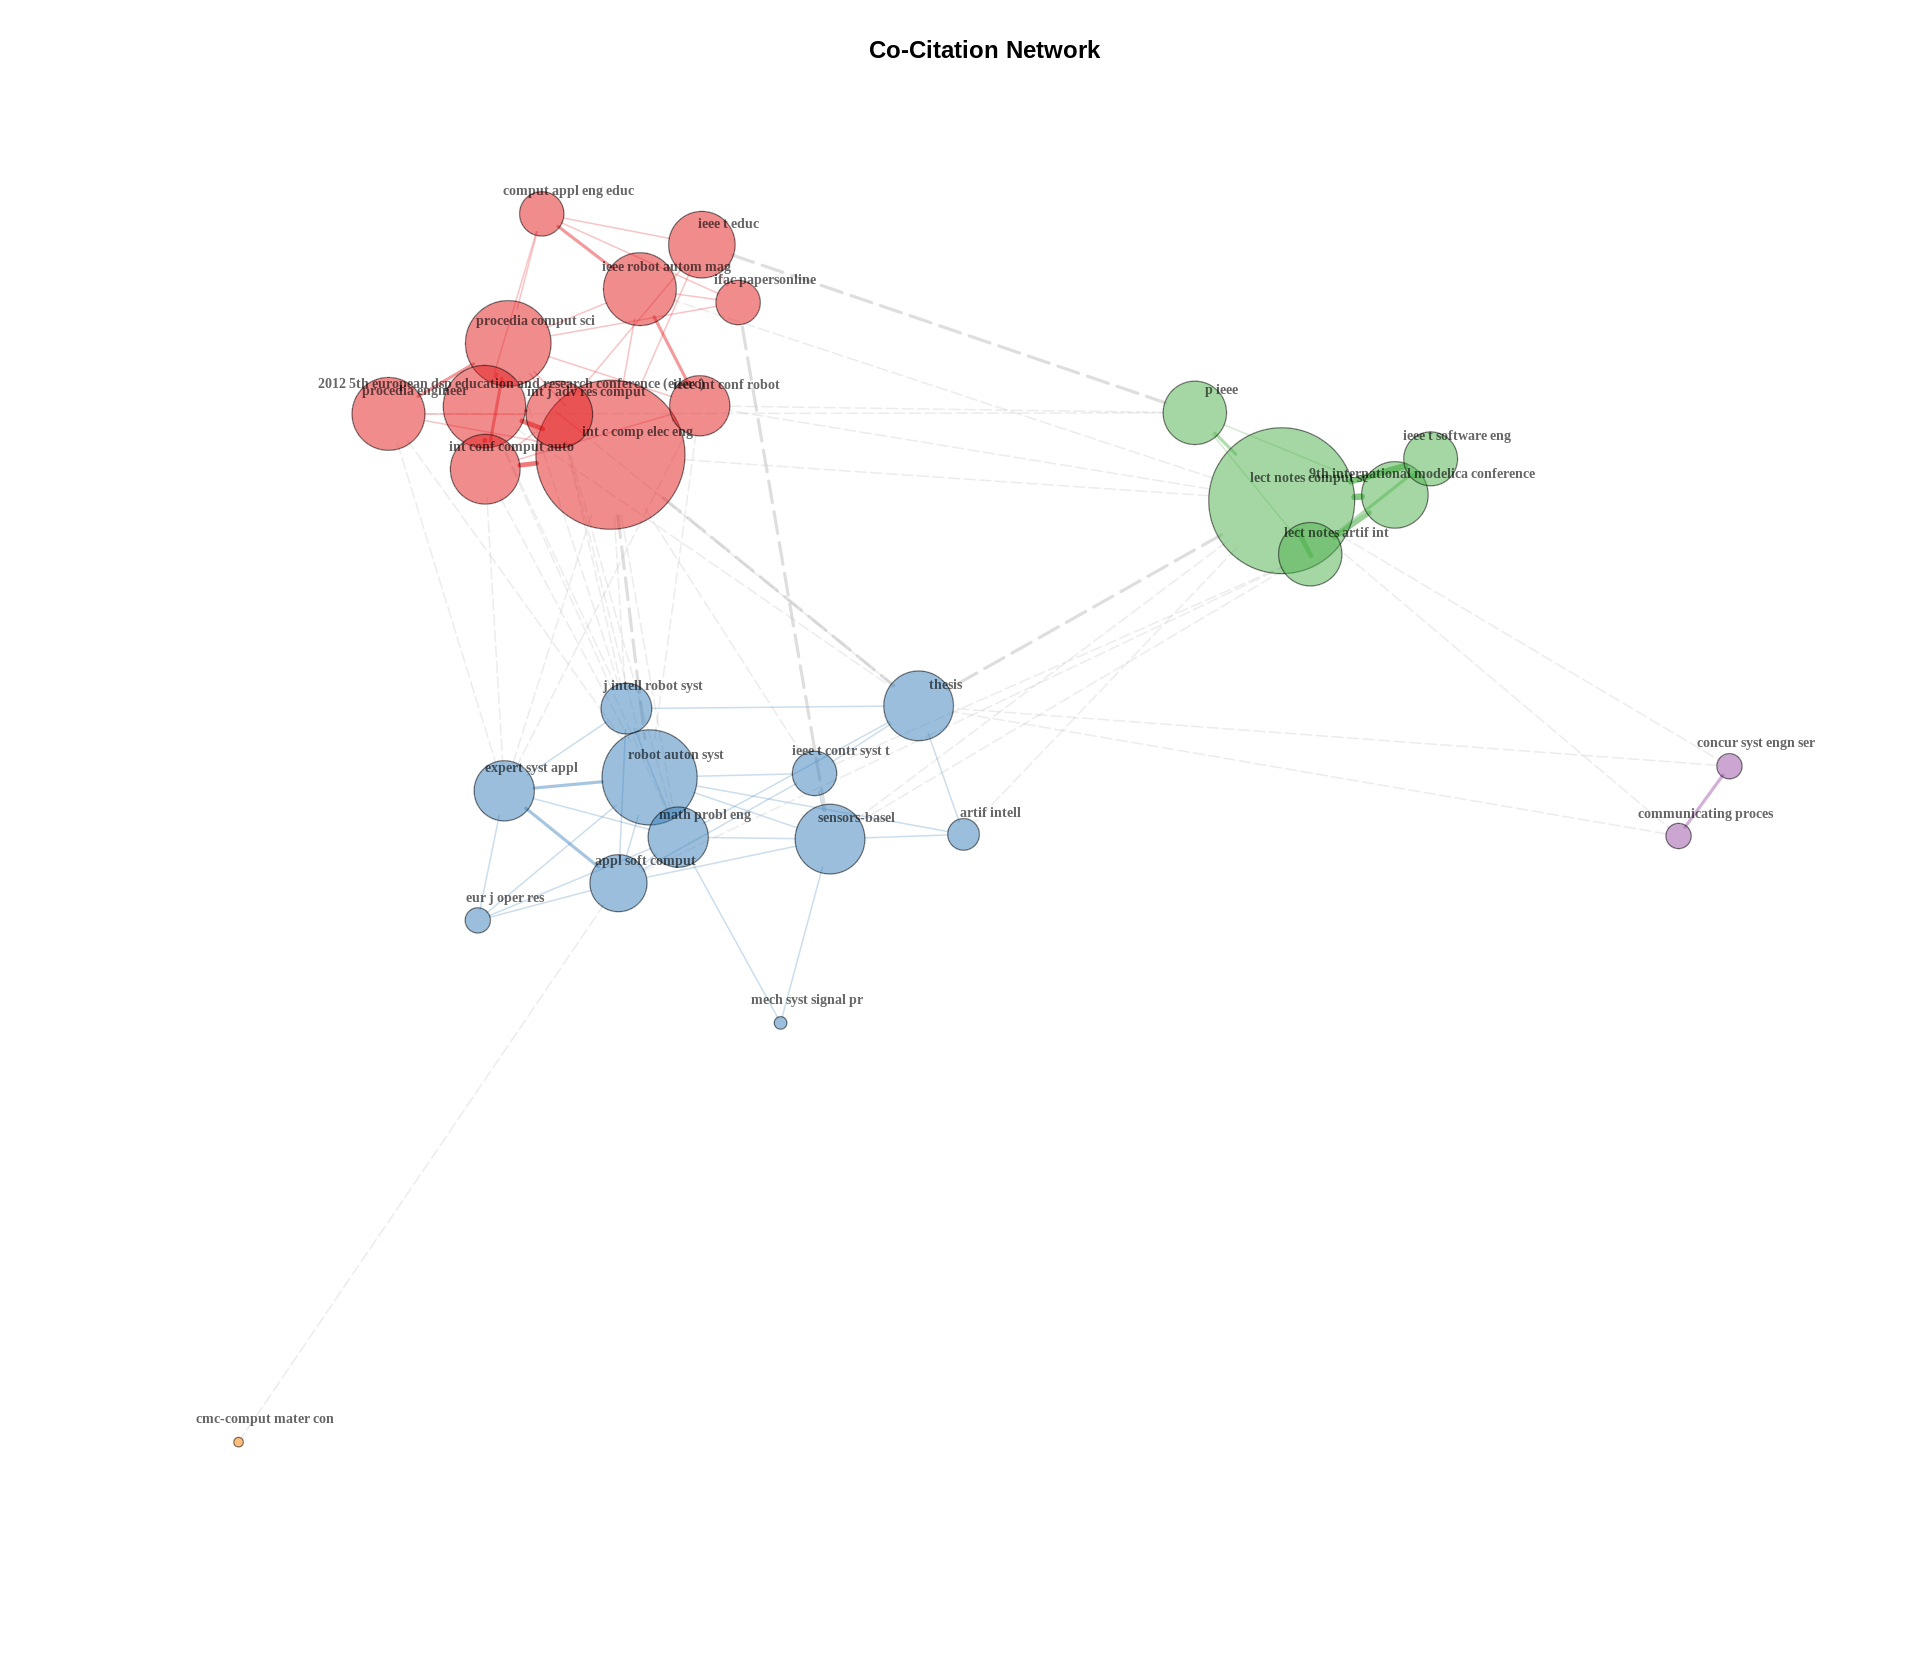

In [ ]:
M2 <- metaTagExtraction(M1, Field = "CR_SO", sep = ";")
# Create a co-citation network
NetMatrix <- biblioNetwork(M2, analysis = "co-citation", network = "sources", n=30, sep = ";")
# Plot the network
net=networkPlot(NetMatrix, Title = "Co-Citation Network", type = "fruchterman", size=T, remove.multiple=FALSE, labelsize=0.7,edgesize = 5)

# Co-Word

In [ ]:
co_words <- biblioNetwork(M1, analysis = "co-occurrences", network = "author_keywords", sep = ";")

In [ ]:
dim(co_words)

[1] 692 692

  [[ suppressing 58 column names ‘robotics’, ‘arduino’, ‘robot’ ... ]]



$graph
IGRAPH c285ea7 UN-- 100 181 -- 
+ attr: alpha (g/n), ylim (g/n), xlim (g/n), rescale (g/l), asp (g/n), layout (g/n), main (g/c), name (v/c), deg
| (v/n), size (v/n), label.cex (v/n), color (v/c), community (v/n), labelsize (v/n), label.dist (v/n), frame.color
| (v/c), label.color (v/c), label.font (v/n), label (v/c), num (e/n), width (e/n), color (e/c), lty (e/n), curved
| (e/l)
+ edges from c285ea7 (vertex names):
 [1] robotics--microcontroller        robotics--microcontroller        robotics--line-following robot  
 [4] robotics--line-following robot   robotics--feedback               robotics--feedback              
 [7] robotics--obstacle avoidance     robotics--obstacle avoidance     robotics--reinforcement learning
[10] robotics--reinforcement learning robotics--autonomous system      robotics--autonomous system     
[13] robotics--control systems        robotics--control systems        robotics--embedded systems      
+ ... omitted several edges

$graph_pajek
IGRAPH 79a40

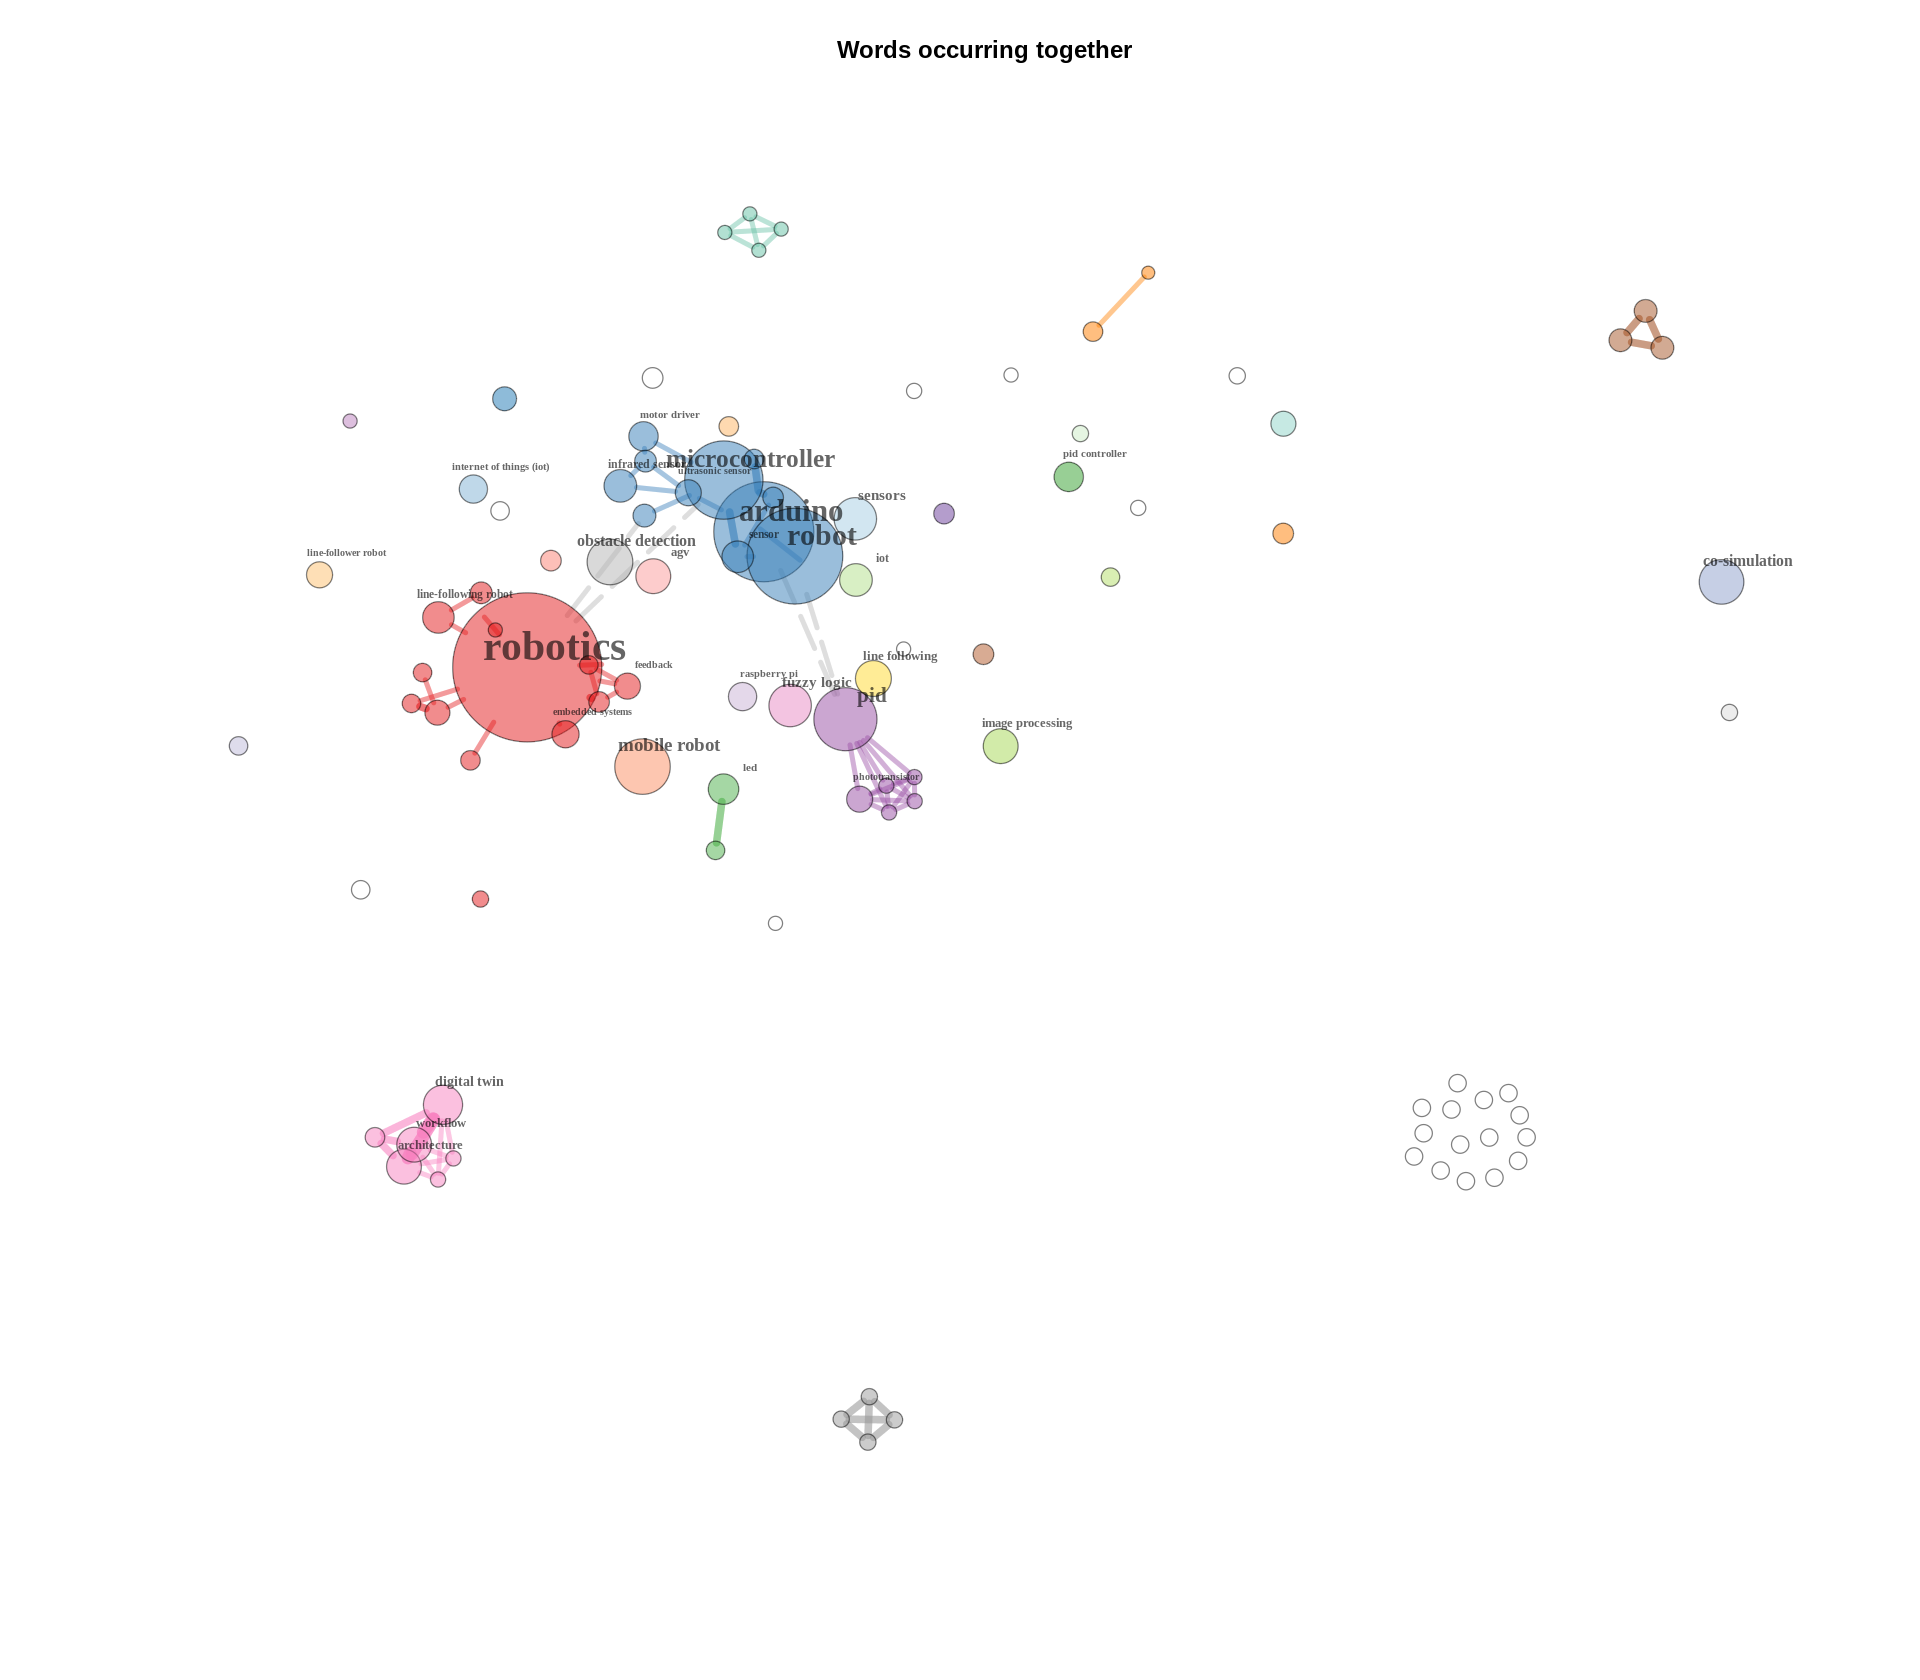

In [ ]:
# avoid terms like "line following robot"
networkPlot(co_words[4:692, 4:692], normalize="association",
  n= 100,
  Title = "Words occurring together",
  type = "fruchterman",
  size.cex=TRUE, size=20,
  remove.multiple=F,
  edgesize = 10,
  labelsize=3,
  label.cex=TRUE,
  label.n=30,
  edges.min=2)

# Co-Authors

  [[ suppressing 58 column names ‘na n’, ‘mazurek p’, ‘bernardeschi c’ ... ]]



$graph
IGRAPH 24ca012 UN-- 100 278 -- 
+ attr: alpha (g/n), ylim (g/n), xlim (g/n), rescale (g/l), asp (g/n), layout (g/n), main (g/c), name (v/c), deg
| (v/n), size (v/n), label.cex (v/n), color (v/c), community (v/n), labelsize (v/n), label.dist (v/n), frame.color
| (v/c), label.color (v/c), label.font (v/n), label (v/c), num (e/n), width (e/n), color (e/c), lty (e/n), curved
| (e/l)
+ edges from 24ca012 (vertex names):
 [1] mazurek p     --matczak g  mazurek p     --matczak g  mazurek p     --matczak g  mazurek p     --matczak g 
 [5] bernardeschi c--palmieri m bernardeschi c--palmieri m bernardeschi c--palmieri m bernardeschi c--palmieri m
 [9] bernardeschi c--palmieri m bernardeschi c--anastasi g bernardeschi c--anastasi g bernardeschi c--vallati c 
[13] bernardeschi c--vallati c  lee c         --su j       lee c         --su j       lee c         --su j      
[17] lee c         --su j       lee c         --su j       lee c         --chang j    lee c         --chang j   
+ ... omi

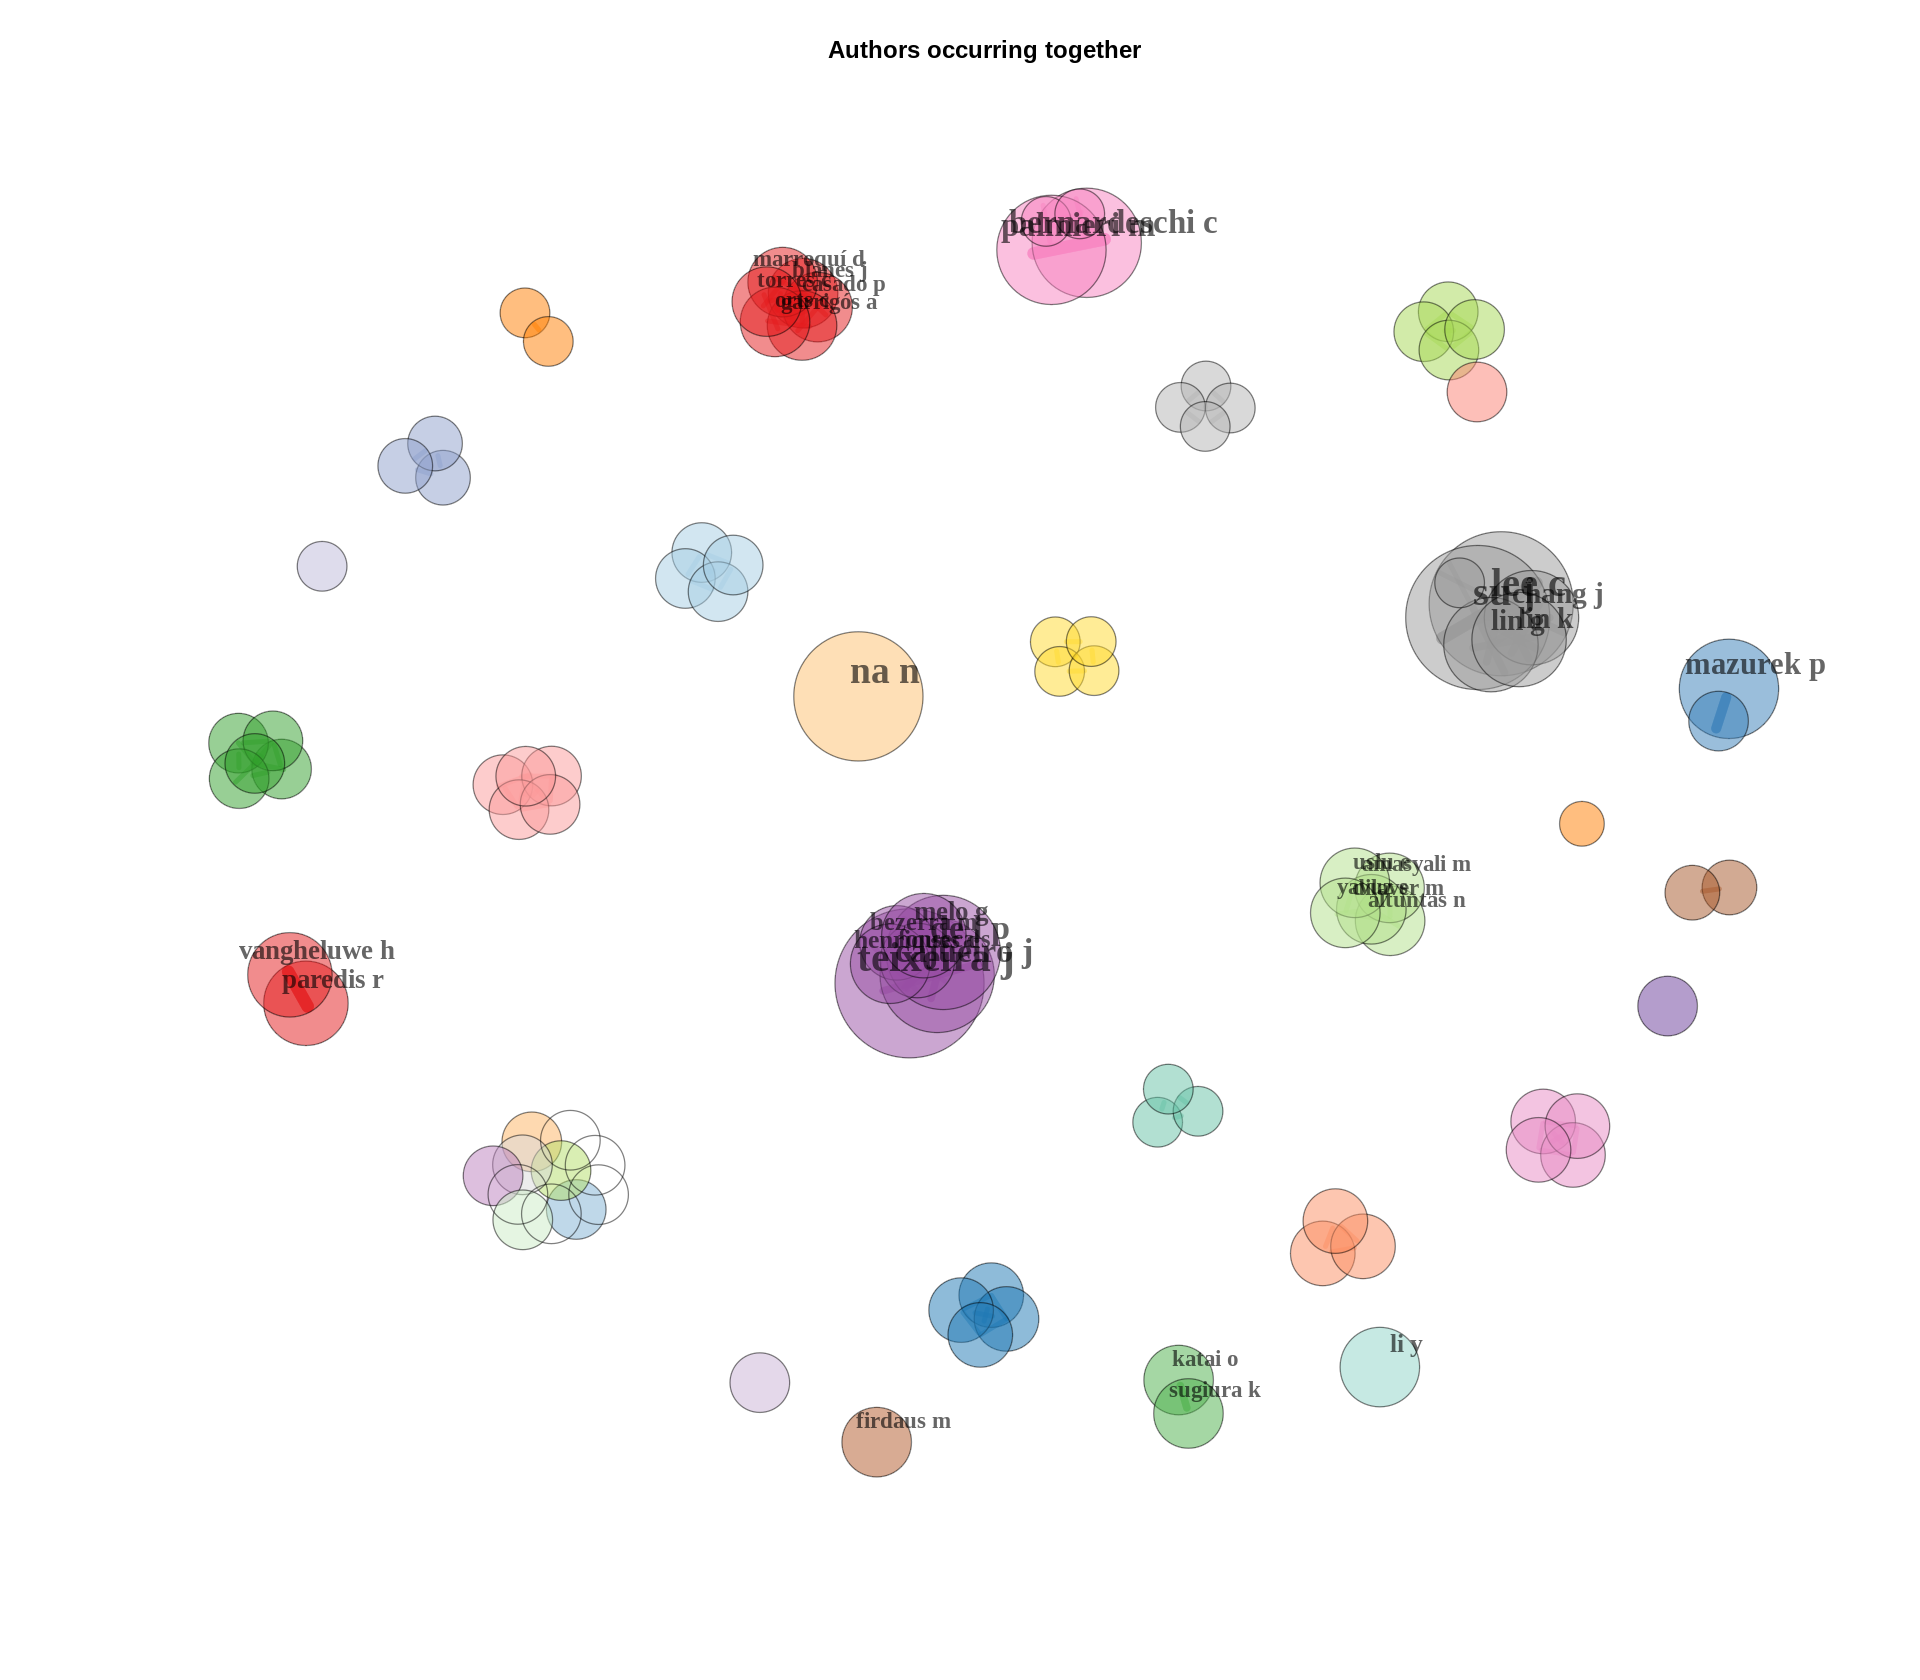

In [ ]:
co_authors <- biblioNetwork(M1, analysis = "co-occurrences", network = "authors", sep = ";")
networkPlot(co_authors, normalize="association",
  n= 100,
  Title = "Authors occurring together",
  type = "fruchterman",
  size.cex=TRUE, size=20,
  remove.multiple=F,
  edgesize = 10,
  labelsize=3,
  label.cex=TRUE,
  label.n=30,
  edges.min=2)

In [ ]:
load("complete_file.rda")

In [ ]:
search.author("katai")

[1] "exploiting interaction between sensory morphology and learning"                      
[2] "simultaneous design of the sensory morphology and controller of mobile robots"       
[3] "simultaneous design method of the sensory morphology and controller of mobile robots"

In [ ]:
search.author("sugiura")

[1] "exploiting interaction between sensory morphology and learning"                      
[2] "simultaneous design of the sensory morphology and controller of mobile robots"       
[3] "simultaneous design method of the sensory morphology and controller of mobile robots"

In [ ]:
search.author("vanghel")

[1] "exploring a digital shadow design workflow by means of a line following robot use-case"
[2] "towards a family of digital model/shadow/twin workflows and architectures"             
[3] "exploring a digital shadow design workflow by means of a line following robot use-case"
[4] "exploring a digital shadow designworkflow by means of a line following robot use-case" 
[5] "a family of digital t workflows and architectures: exploring two cases"

In [ ]:
search.author("paredis")

[1] "exploring a digital shadow design workflow by means of a line following robot use-case"
[2] "towards a family of digital model/shadow/twin workflows and architectures"             
[3] "exploring a digital shadow design workflow by means of a line following robot use-case"
[4] "exploring a digital shadow designworkflow by means of a line following robot use-case" 
[5] "a family of digital t workflows and architectures: exploring two cases"

In [ ]:
search.author("melo g")

[1] "improving early robotics education using a line-following robot simulator"
[2] "3djpi: an open-source web-based 3d simulator for pololu's 3pi platform"

In [ ]:
search.author("marroqu")

[1] "psoc 4 line-follower robot for engineering mixed signal electronics course"       
[2] "mixed signal electronics project based learning approach for engineering students"

psoc 4 line-follower robot for engineering mixed signal electronics course https://doi.org/10.1109/TAEE54169.2022.9840743 without access

In [ ]:
search.author("casado")

[1] "psoc 4 line-follower robot for engineering mixed signal electronics course"       
[2] "mixed signal electronics project based learning approach for engineering students"

In [ ]:
search.author("rigos")

[1] "psoc 4 line-follower robot for engineering mixed signal electronics course"       
[2] "mixed signal electronics project based learning approach for engineering students"

In [ ]:
search.author("blanes")

[1] "psoc 4 line-follower robot for engineering mixed signal electronics course"       
[2] "mixed signal electronics project based learning approach for engineering students"

In [ ]:
search.author("torres")

[1] "psoc 4 line-follower robot for engineering mixed signal electronics course"       
[2] "mixed signal electronics project based learning approach for engineering students"

In [ ]:
search.author("bezerra")

[1] "improving early robotics education using a line-following robot simulator"
[2] "turning pololu 3pi into a multi-programming platform"                     
[3] "3djpi: an open-source web-based 3d simulator for pololu's 3pi platform"

# Co-Keywords

  [[ suppressing 57 column names ‘robots’, ‘line-following robots’, ‘line-follower robots’ ... ]]



$graph
IGRAPH 21655a1 UN-- 100 1011 -- 
+ attr: alpha (g/n), ylim (g/n), xlim (g/n), rescale (g/l), asp (g/n), layout (g/n), main (g/c), name (v/c), deg
| (v/n), size (v/n), label.cex (v/n), color (v/c), community (v/n), labelsize (v/n), label.dist (v/n), frame.color
| (v/c), label.color (v/c), label.font (v/n), label (v/c), num (e/n), width (e/n), color (e/c), lty (e/n), curved
| (e/l)
+ edges from 21655a1 (vertex names):
 [1] robots--line-following robots robots--line-following robots robots--line-following robots robots--line-following robots
 [5] robots--line-following robots robots--line-following robots robots--line-following robots robots--line-following robots
 [9] robots--line-following robots robots--line-following robots robots--line-following robots robots--line-following robots
[13] robots--line-following robots robots--line-following robots robots--line-following robots robots--line-following robots
[17] robots--line-following robots robots--line-following robots robots--

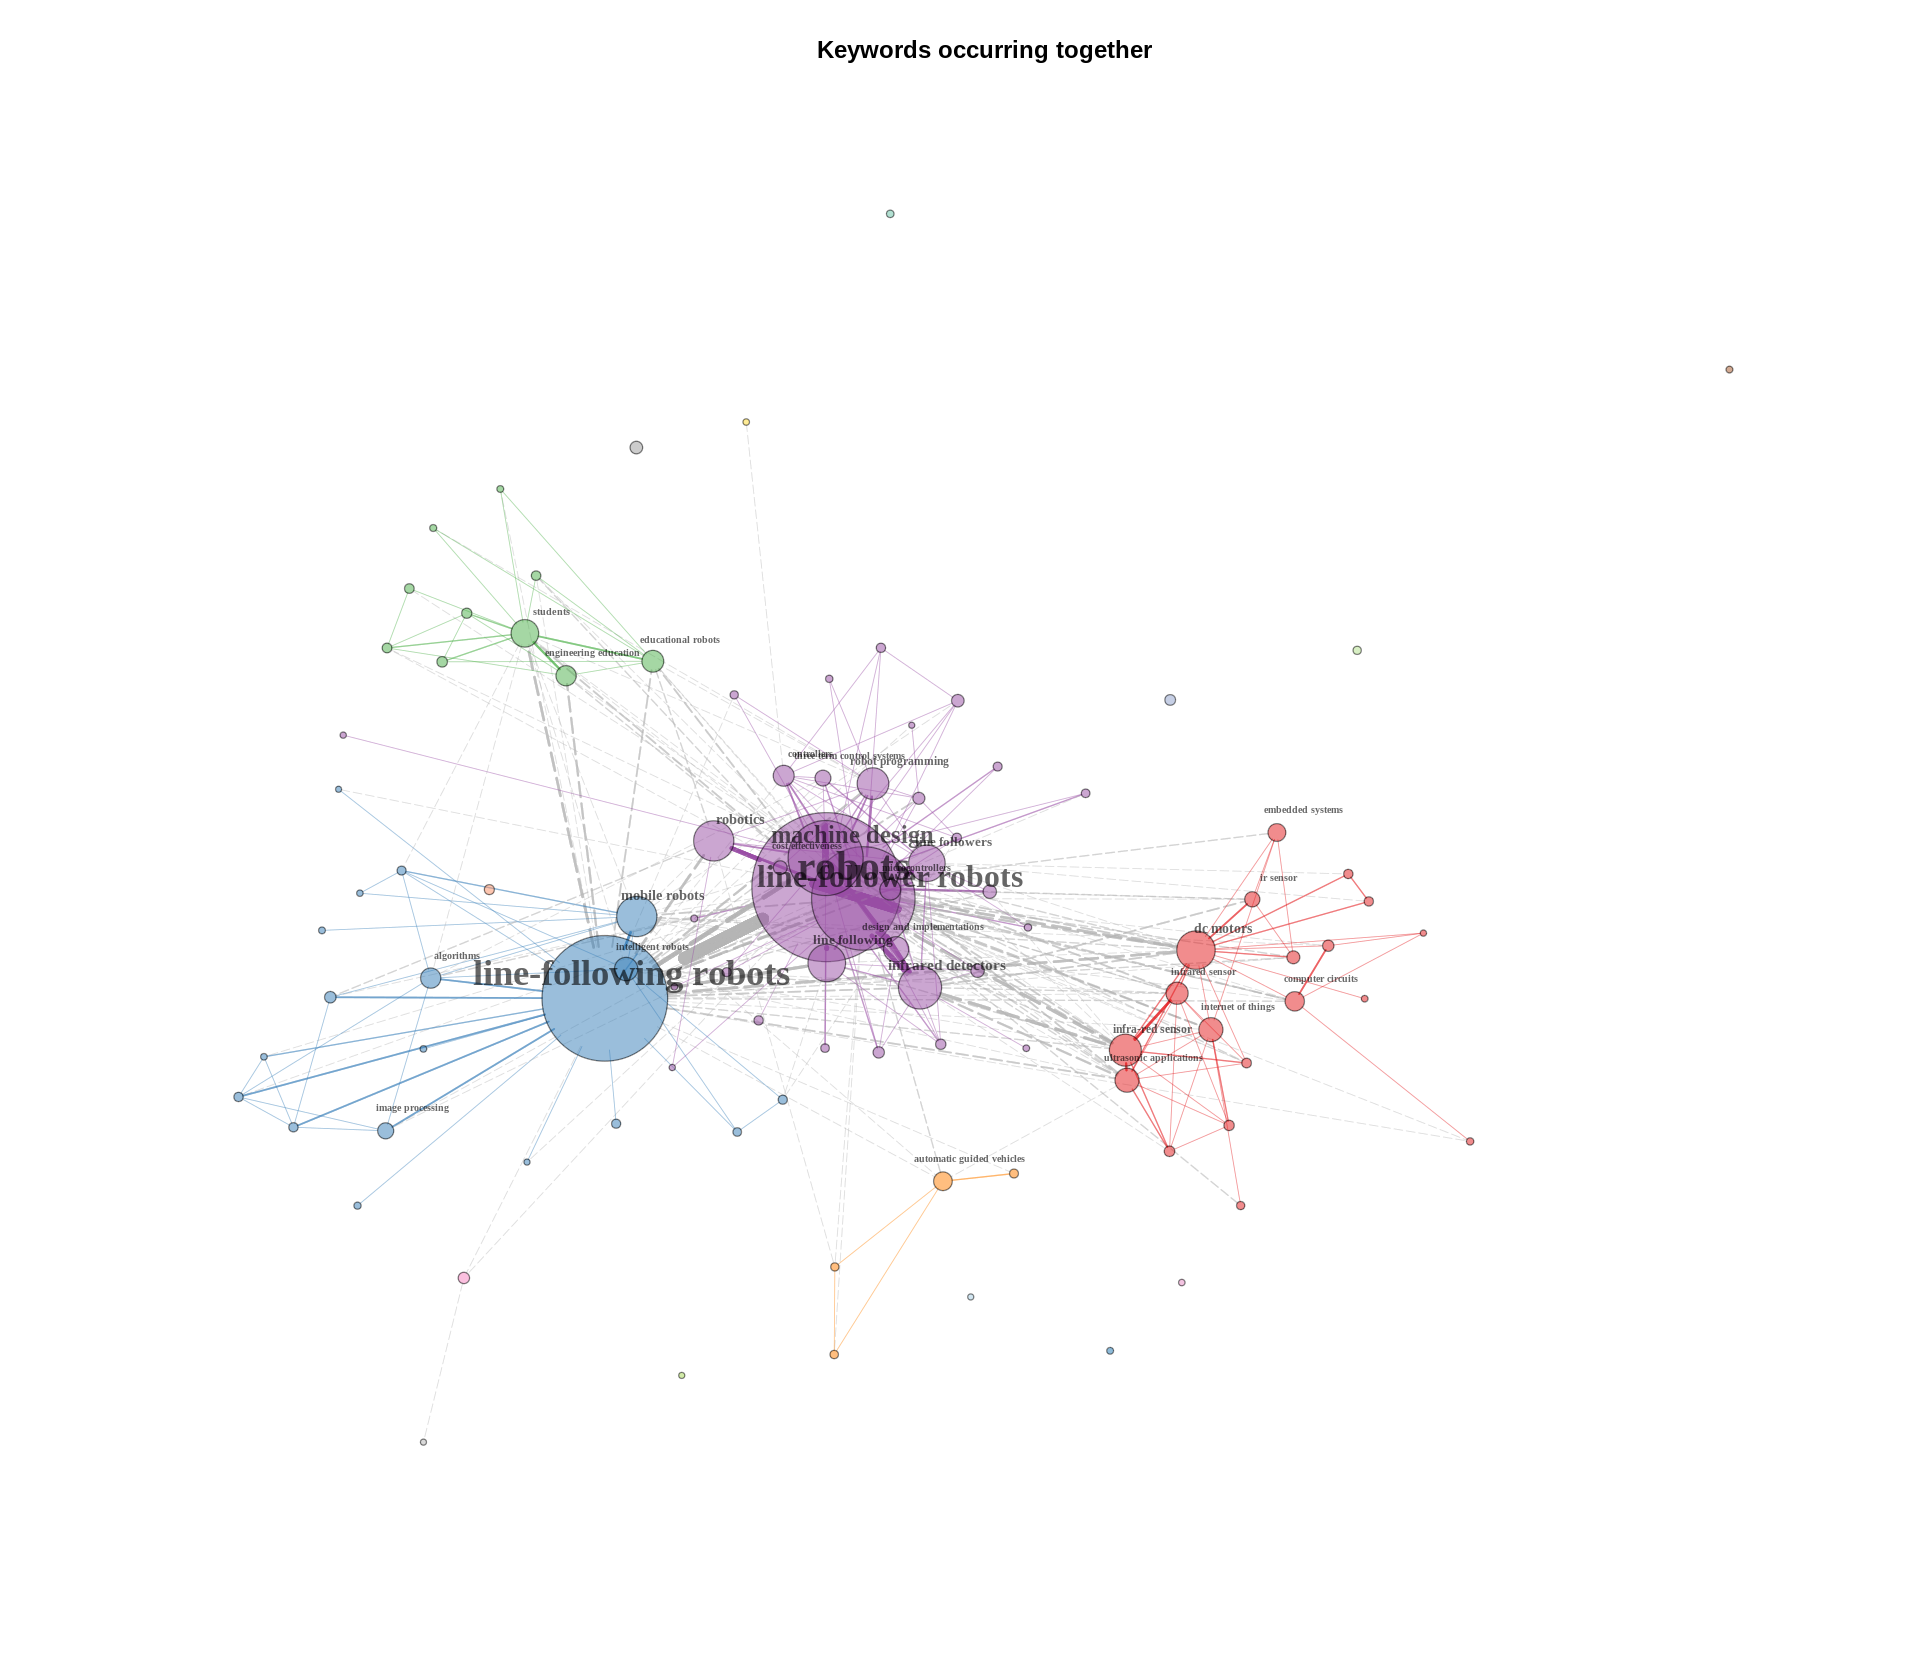

In [ ]:
co_keywords <- biblioNetwork(M1, analysis = "co-occurrences", network = "keywords", sep = ";")
networkPlot(co_keywords, normalize="association",
  n= 100,
  Title = "Keywords occurring together",
  type = "fruchterman",
  size.cex=TRUE, size=20,
  remove.multiple=F,
  edgesize = 10,
  labelsize=3,
  label.cex=TRUE,
  label.n=30,
  edges.min=2)

# Conceptual Analysis

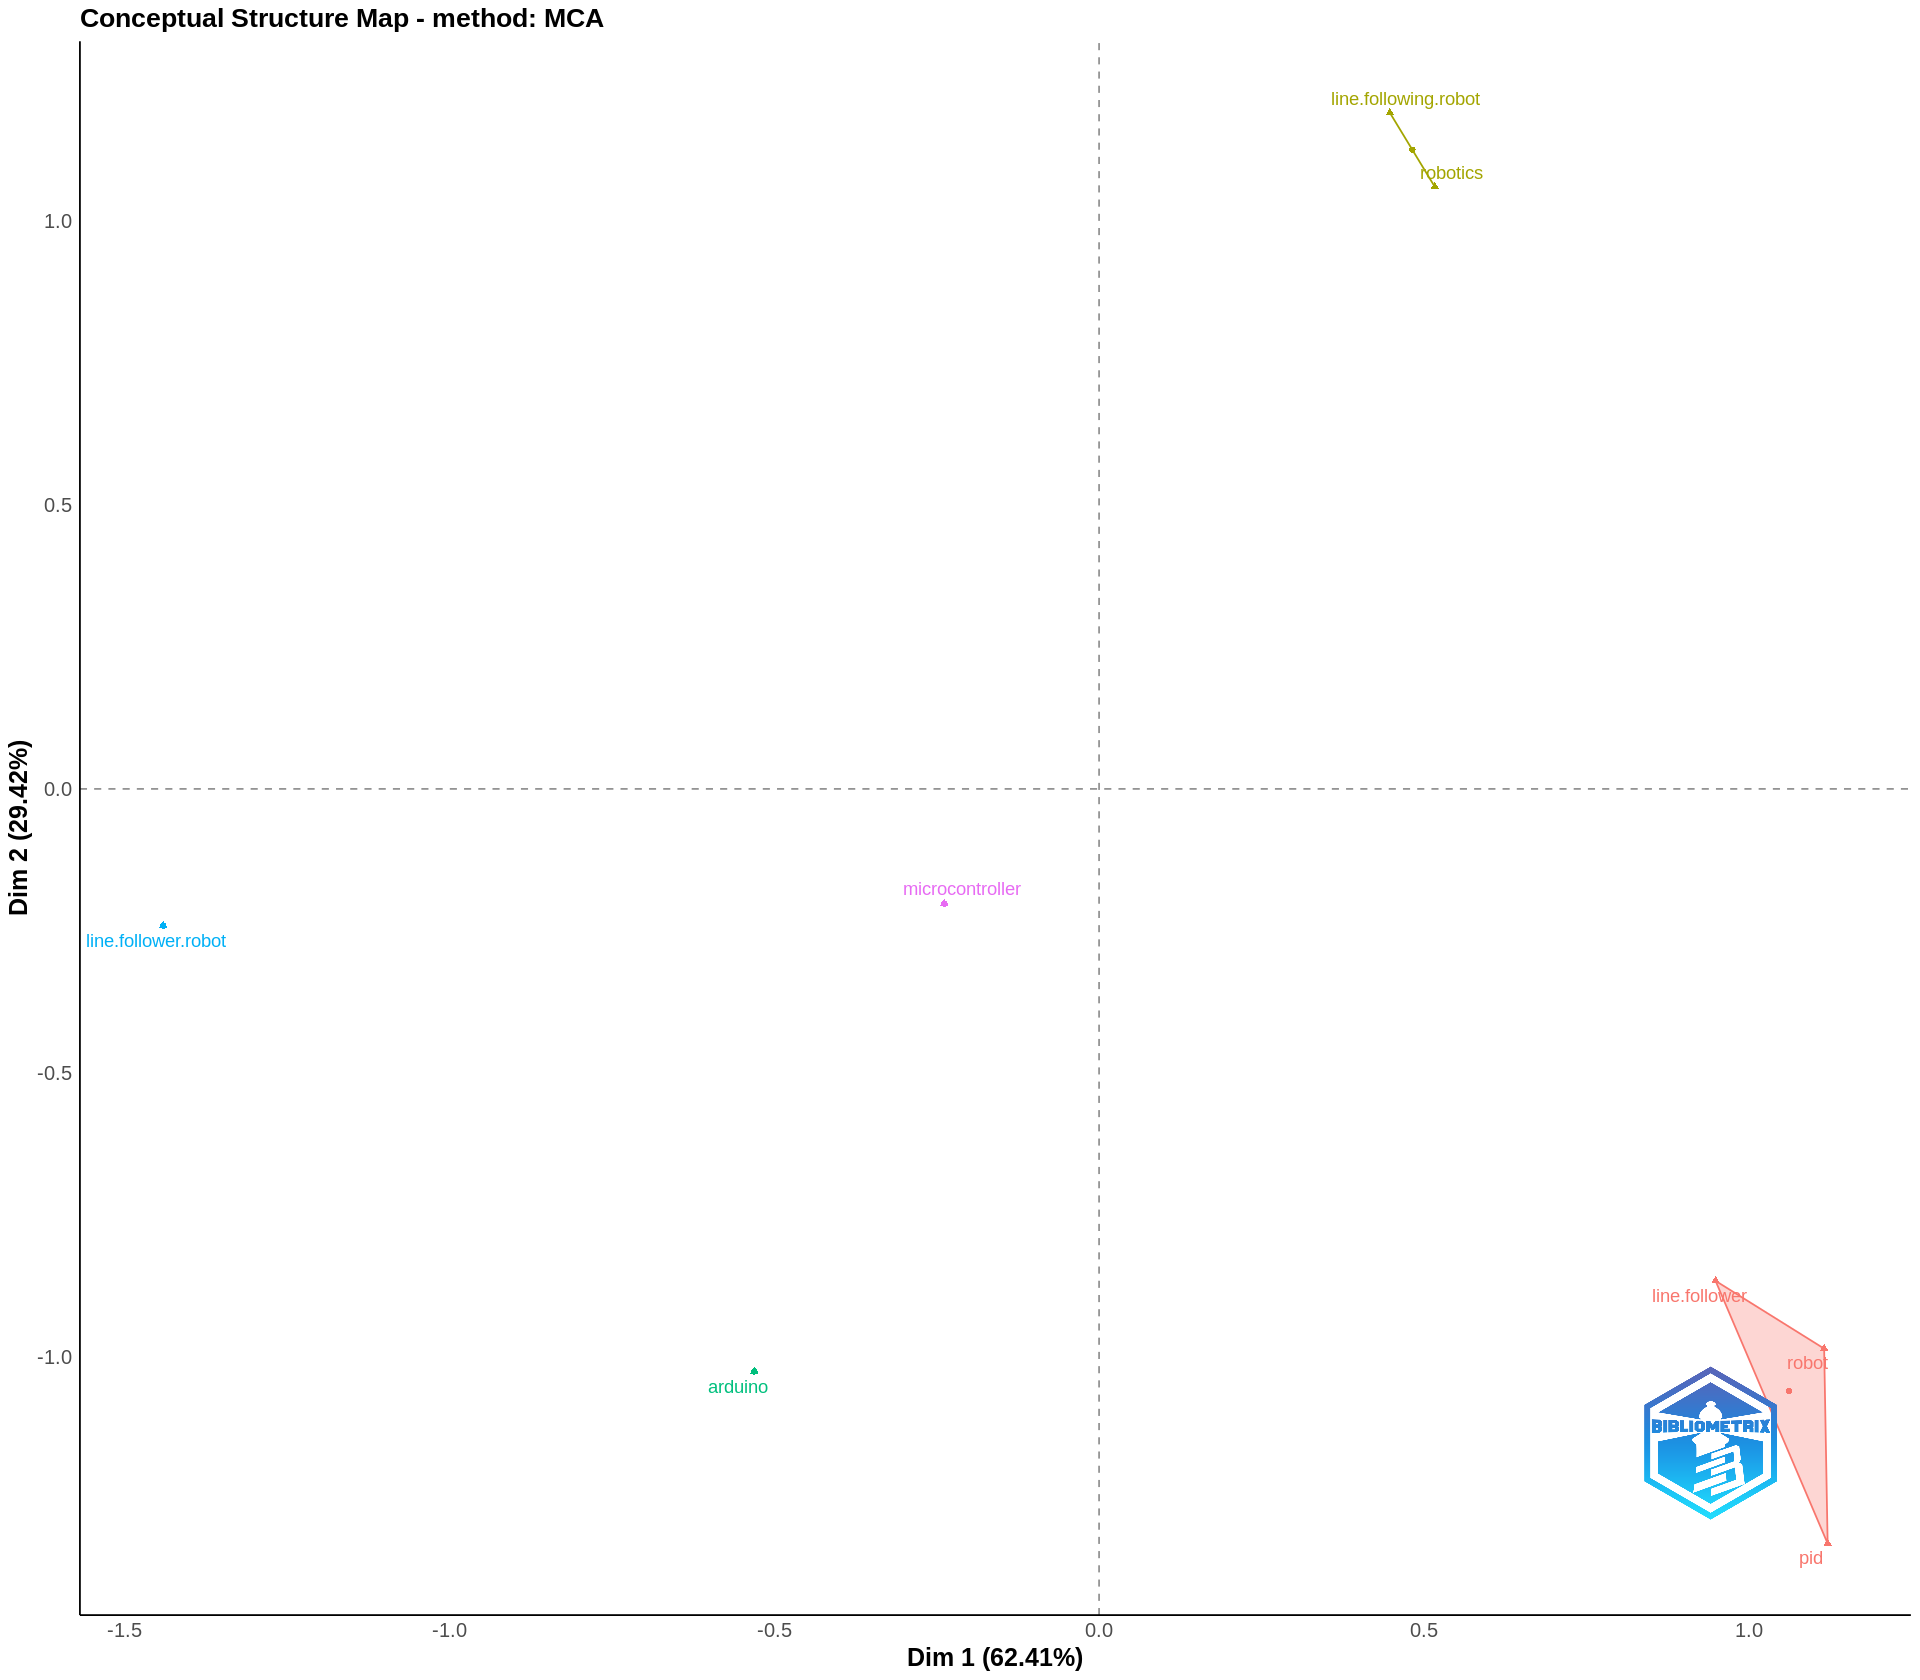

Warning message:
“ggrepel: 55 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


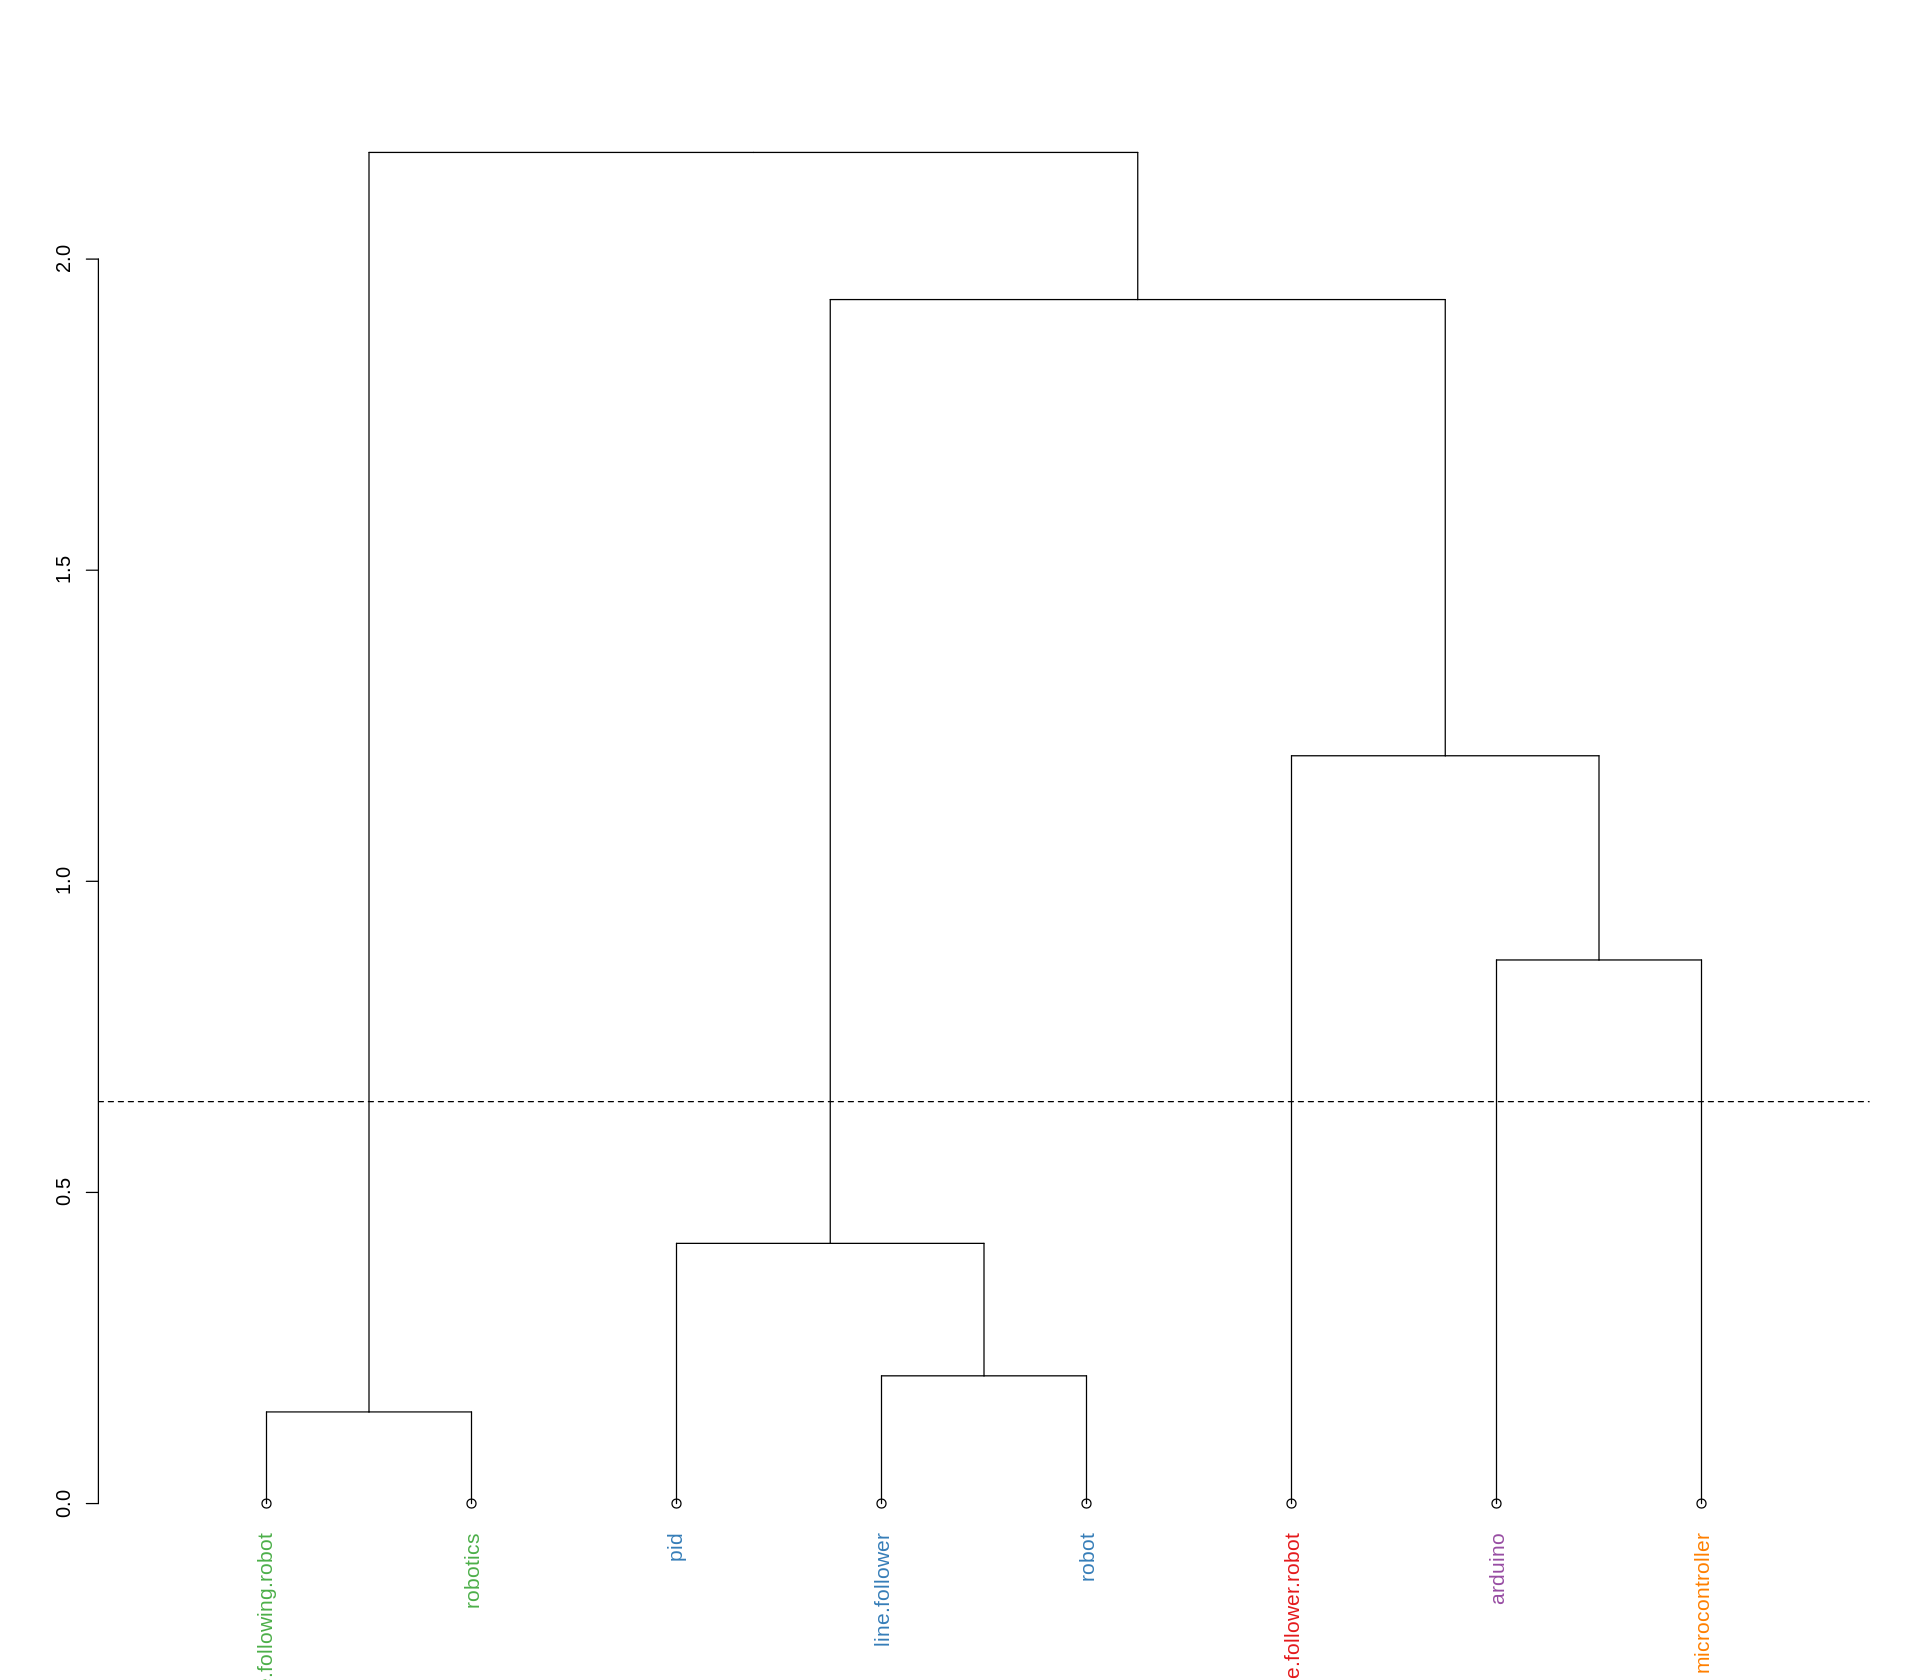

Warning message:
“ggrepel: 54 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


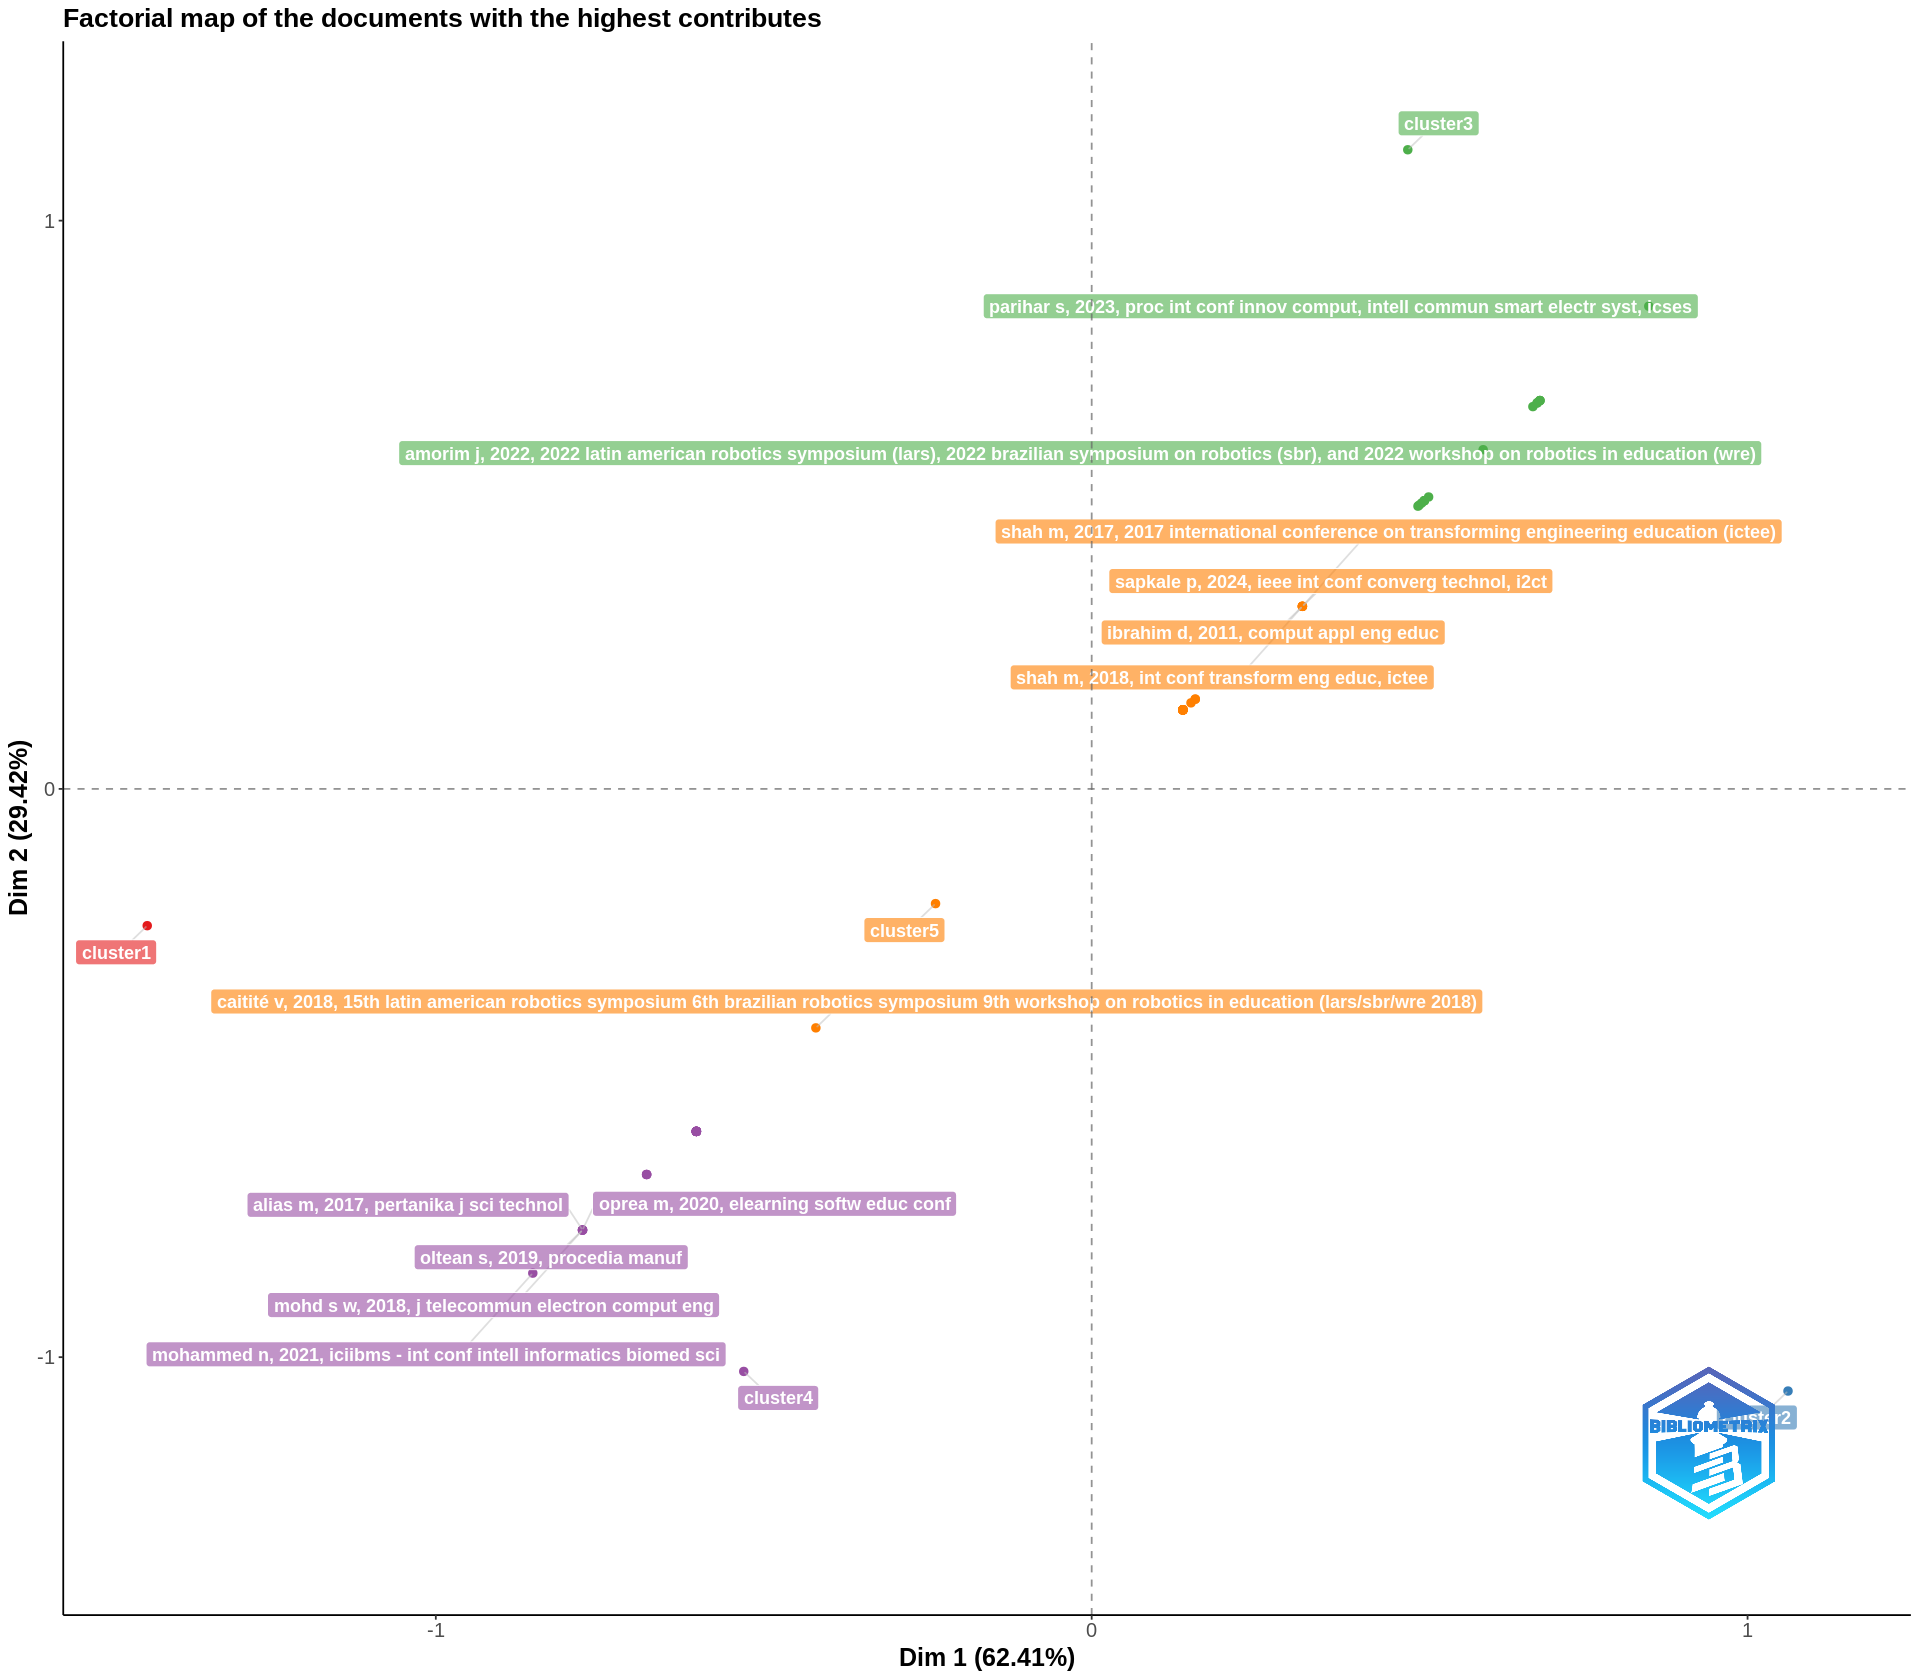

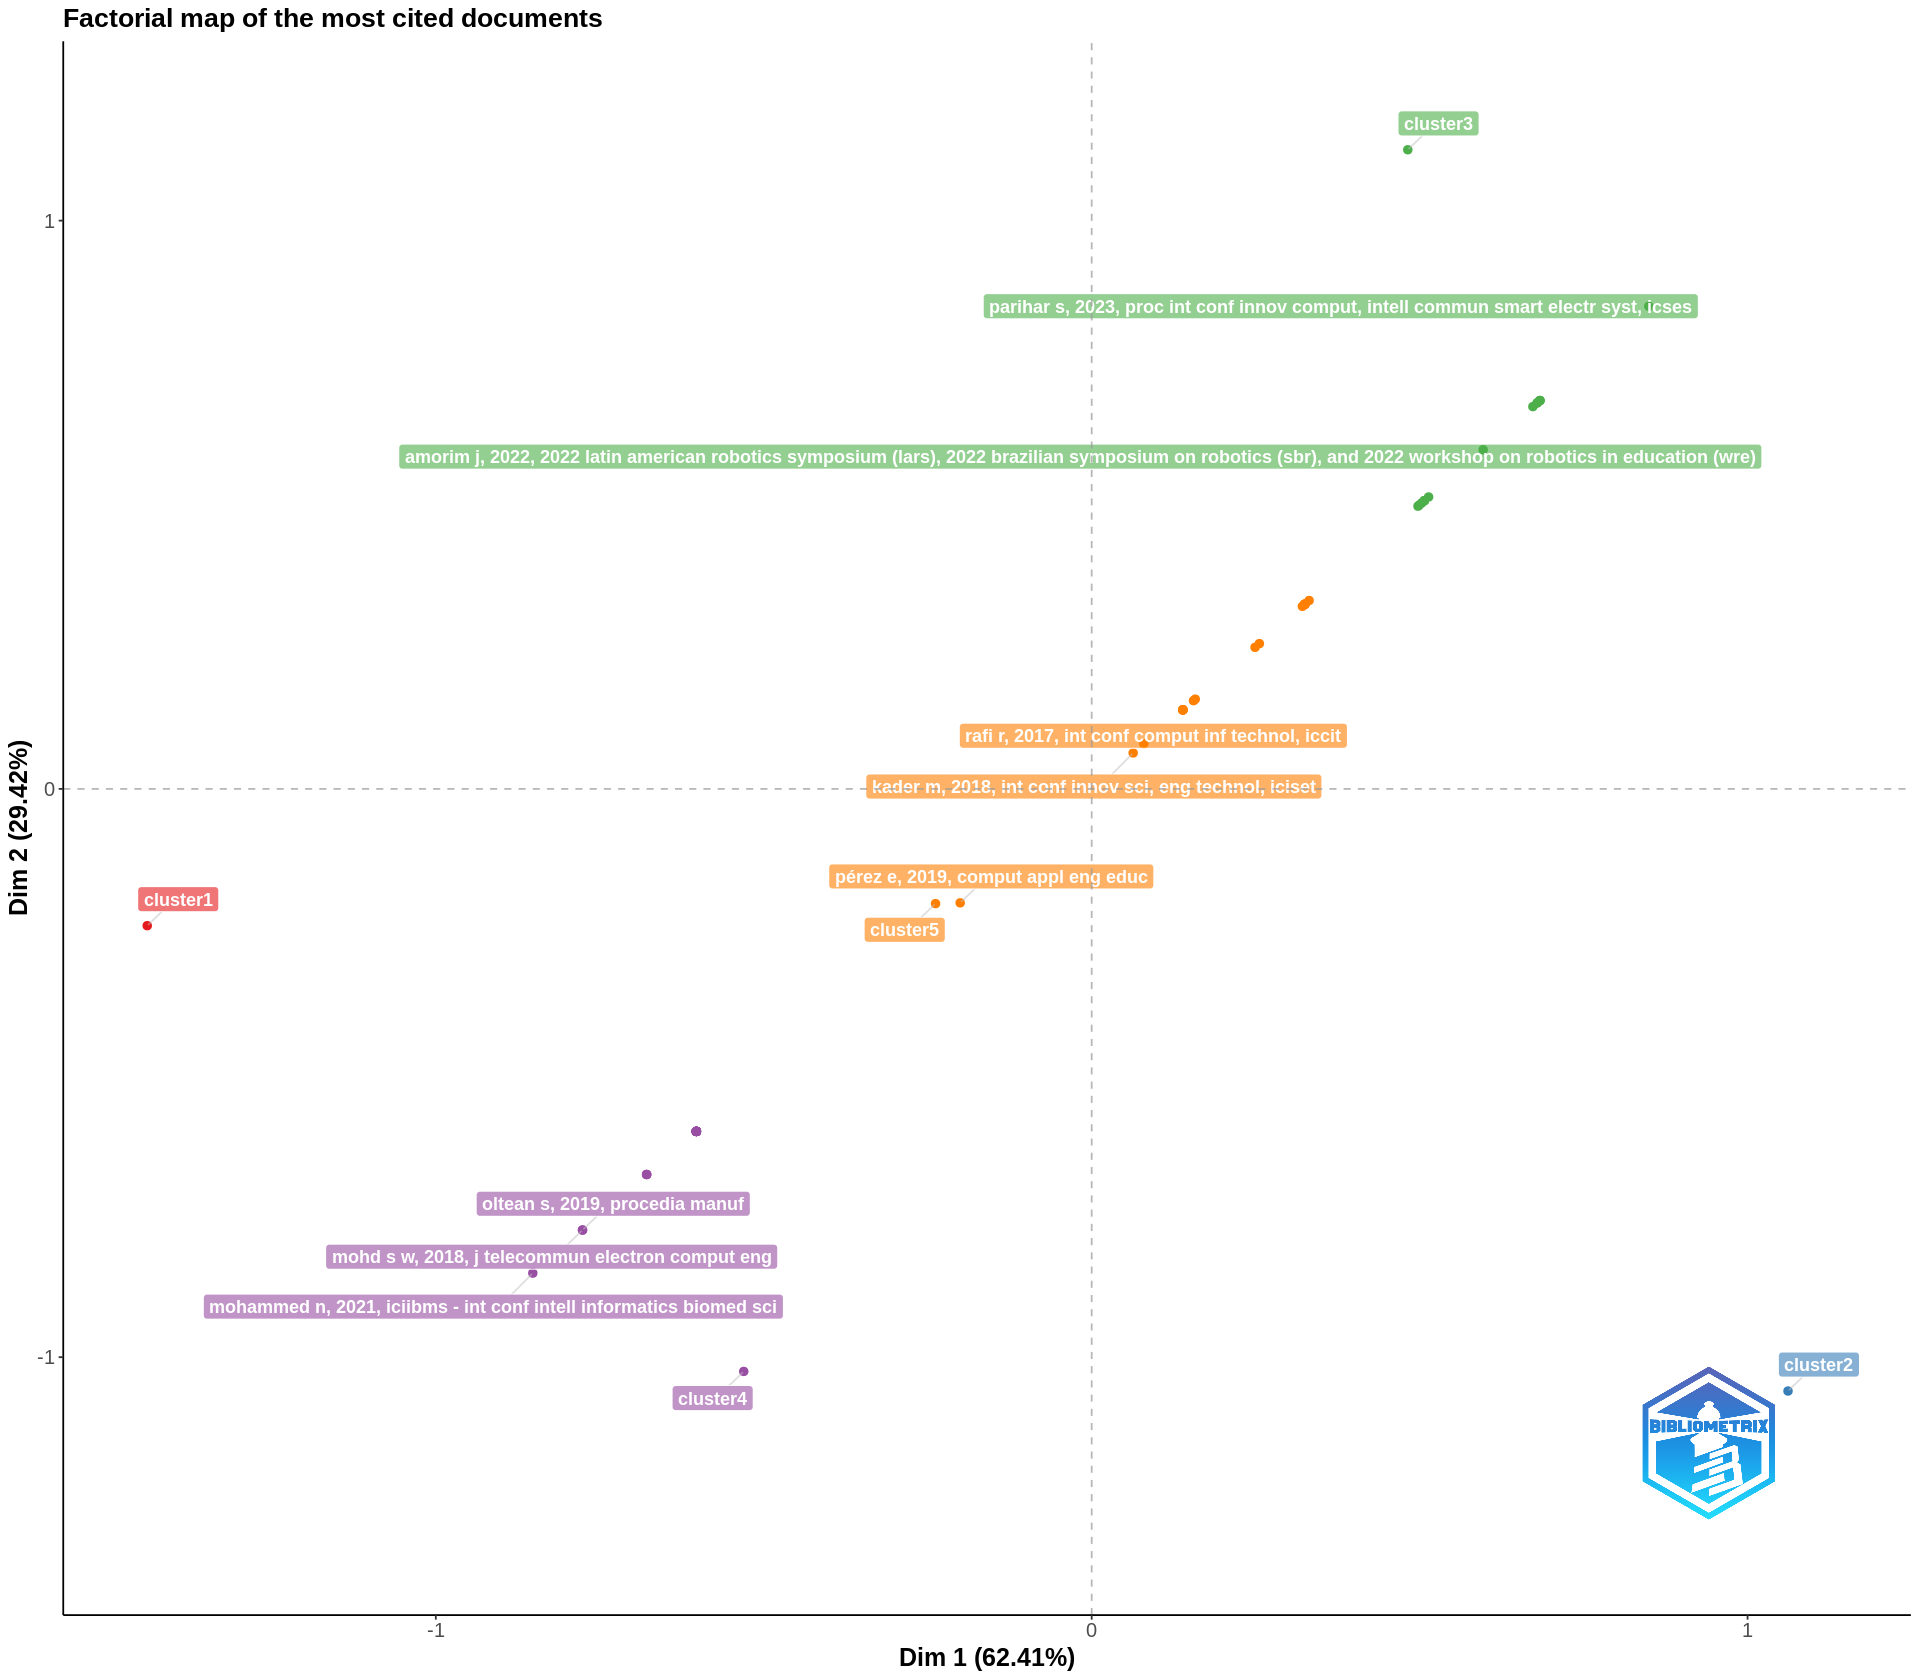

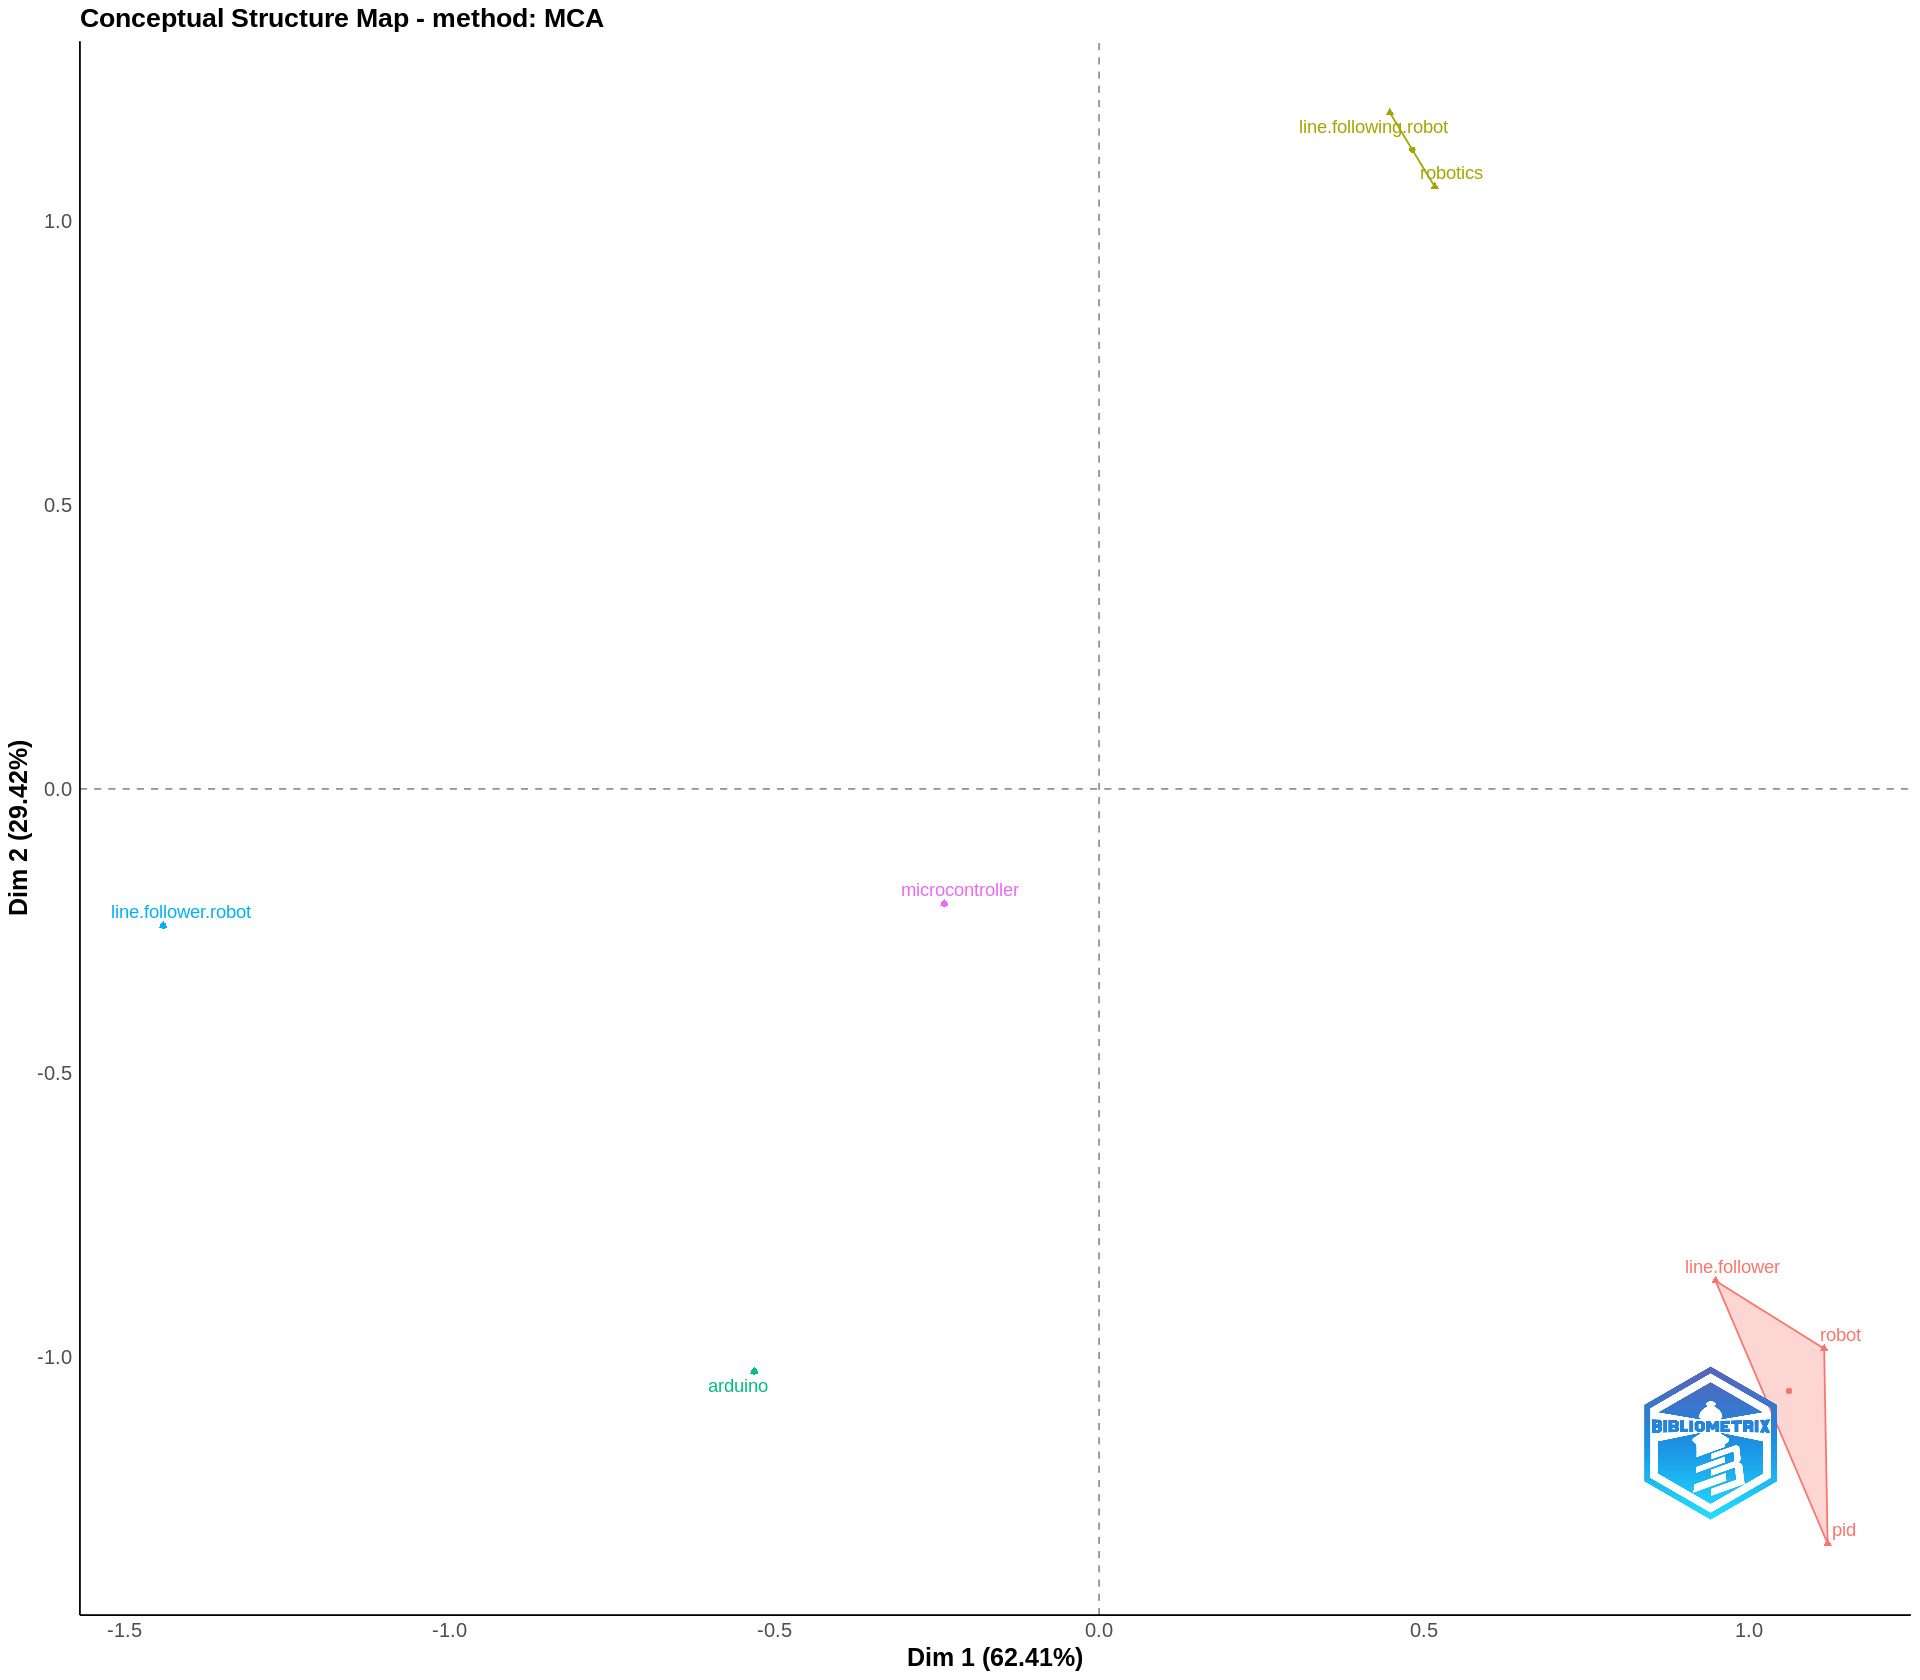

In [ ]:
CS <- conceptualStructure(M1,field="DE", method="MCA", minDegree=10, clust=5, stemming=FALSE, labelsize=15, documents=20, graph=TRUE)
CS$graph_terms

In [22]:
search.author("parihar")

[1] "enhancing line following robot navigating with smart assistant capabilities"

In [23]:
search.author("amorim j")

[1] "control tunning approach and digital filter application for competitive line follower robot"
[2] "design of a control approach to assist the performance of a competitive line follower robot"

In [24]:
search.author("shah m")

[1] "design implementation of high-performance line following robot"
[2] "design implementation of high-performance line following robot"

In [25]:
search.author("ibrahim d")

[1] "investigation in autonomous line follower robot"                                                             
[2] "line follower robot: fabrication and accuracy measurement by data acquisition"                               
[3] "an undergraduate fuzzy logic control lab using a line following robot"                                       
[4] "an ultra-low cost line follower robot as educational tool for teaching programming and circuit's foundations"
[5] "line follower simulator with fuzzy control"

In [27]:
search.author.ano("ibrahim d")

[1] 2017 2014 2011 2019 2017

In [28]:
search.author("ibrahim d")[3]

[1] "an undergraduate fuzzy logic control lab using a line following robot"

In [29]:
search.author("sapkale p") #withou access

[1] "food serving restaurant robot with infrared line detection path"

In [30]:
search.author("caitite")

[1] "diffusion of robotics through line follower robots"

In [31]:
search.author("alias m") #withtou access

[1] "implementation of a fuzzy-based line follower robot using arduino"

In [32]:
search.author("oprea m")

[1] "integration of robotics projects in the pre-university educational environment"

In [34]:
search.author("oltean s") #2019

[1] "mobile robot platform with arduino uno and raspberry pi for autonomous navigation"
[2] "a deep learning approach for the mobile-robot motion control system"              
[3] "intelligent autonomous-robot control for medical applications"

In [35]:
search.author.ano("oltean s")

[1] 2019 2021 2021

In [37]:
search.author("mohd s")

[1] "line follower mobile robot for surveillance camera monitoring system"

In [39]:
search.author("mohammed n") #2021

[1] "autonomous line follower robot with fuzzy based hybrid controller"           
[2] "line-following service robot using arduino with face recognition for offices"
[3] "line following autonomous office assistant robot with pid algorithm"         
[4] "gps based guiding system for a small car"

In [40]:
search.author.ano("mohammed n")

[1] 2021

# Collaboration network between the authors

$graph
IGRAPH 65d82f7 UNW- 10 7 -- 
+ attr: alpha (g/n), ylim (g/n), xlim (g/n), rescale (g/l), asp (g/n), layout (g/n), main (g/c), name (v/c), deg
| (v/n), size (v/n), label.cex (v/n), color (v/c), community (v/n), label.dist (v/n), frame.color (v/c), label.color
| (v/c), label.font (v/n), label (v/c), num (e/n), width (e/n), color (e/c), lty (e/n), weight (e/n), curved (e/l)
+ edges from 65d82f7 (vertex names):
[1] bernardeschi c--palmieri m lee c         --su j       lee c         --chang j    su j          --chang j   
[5] teixeira j    --cajueiro j teixeira j    --de l p     cajueiro j    --de l p    

$graph_pajek
IGRAPH 2a8b4d5 UNW- 10 7 -- 
+ attr: name (v/c), deg (v/n), size (v/n), label.cex (v/n), id (v/c), num (e/n), weight (e/n)
+ edges from 2a8b4d5 (vertex names):
[1] bernardeschi c--palmieri m lee c         --su j       lee c         --chang j    su j          --chang j   
[5] teixeira j    --cajueiro j teixeira j    --de l p     cajueiro j    --de l p    

$cluster_obj


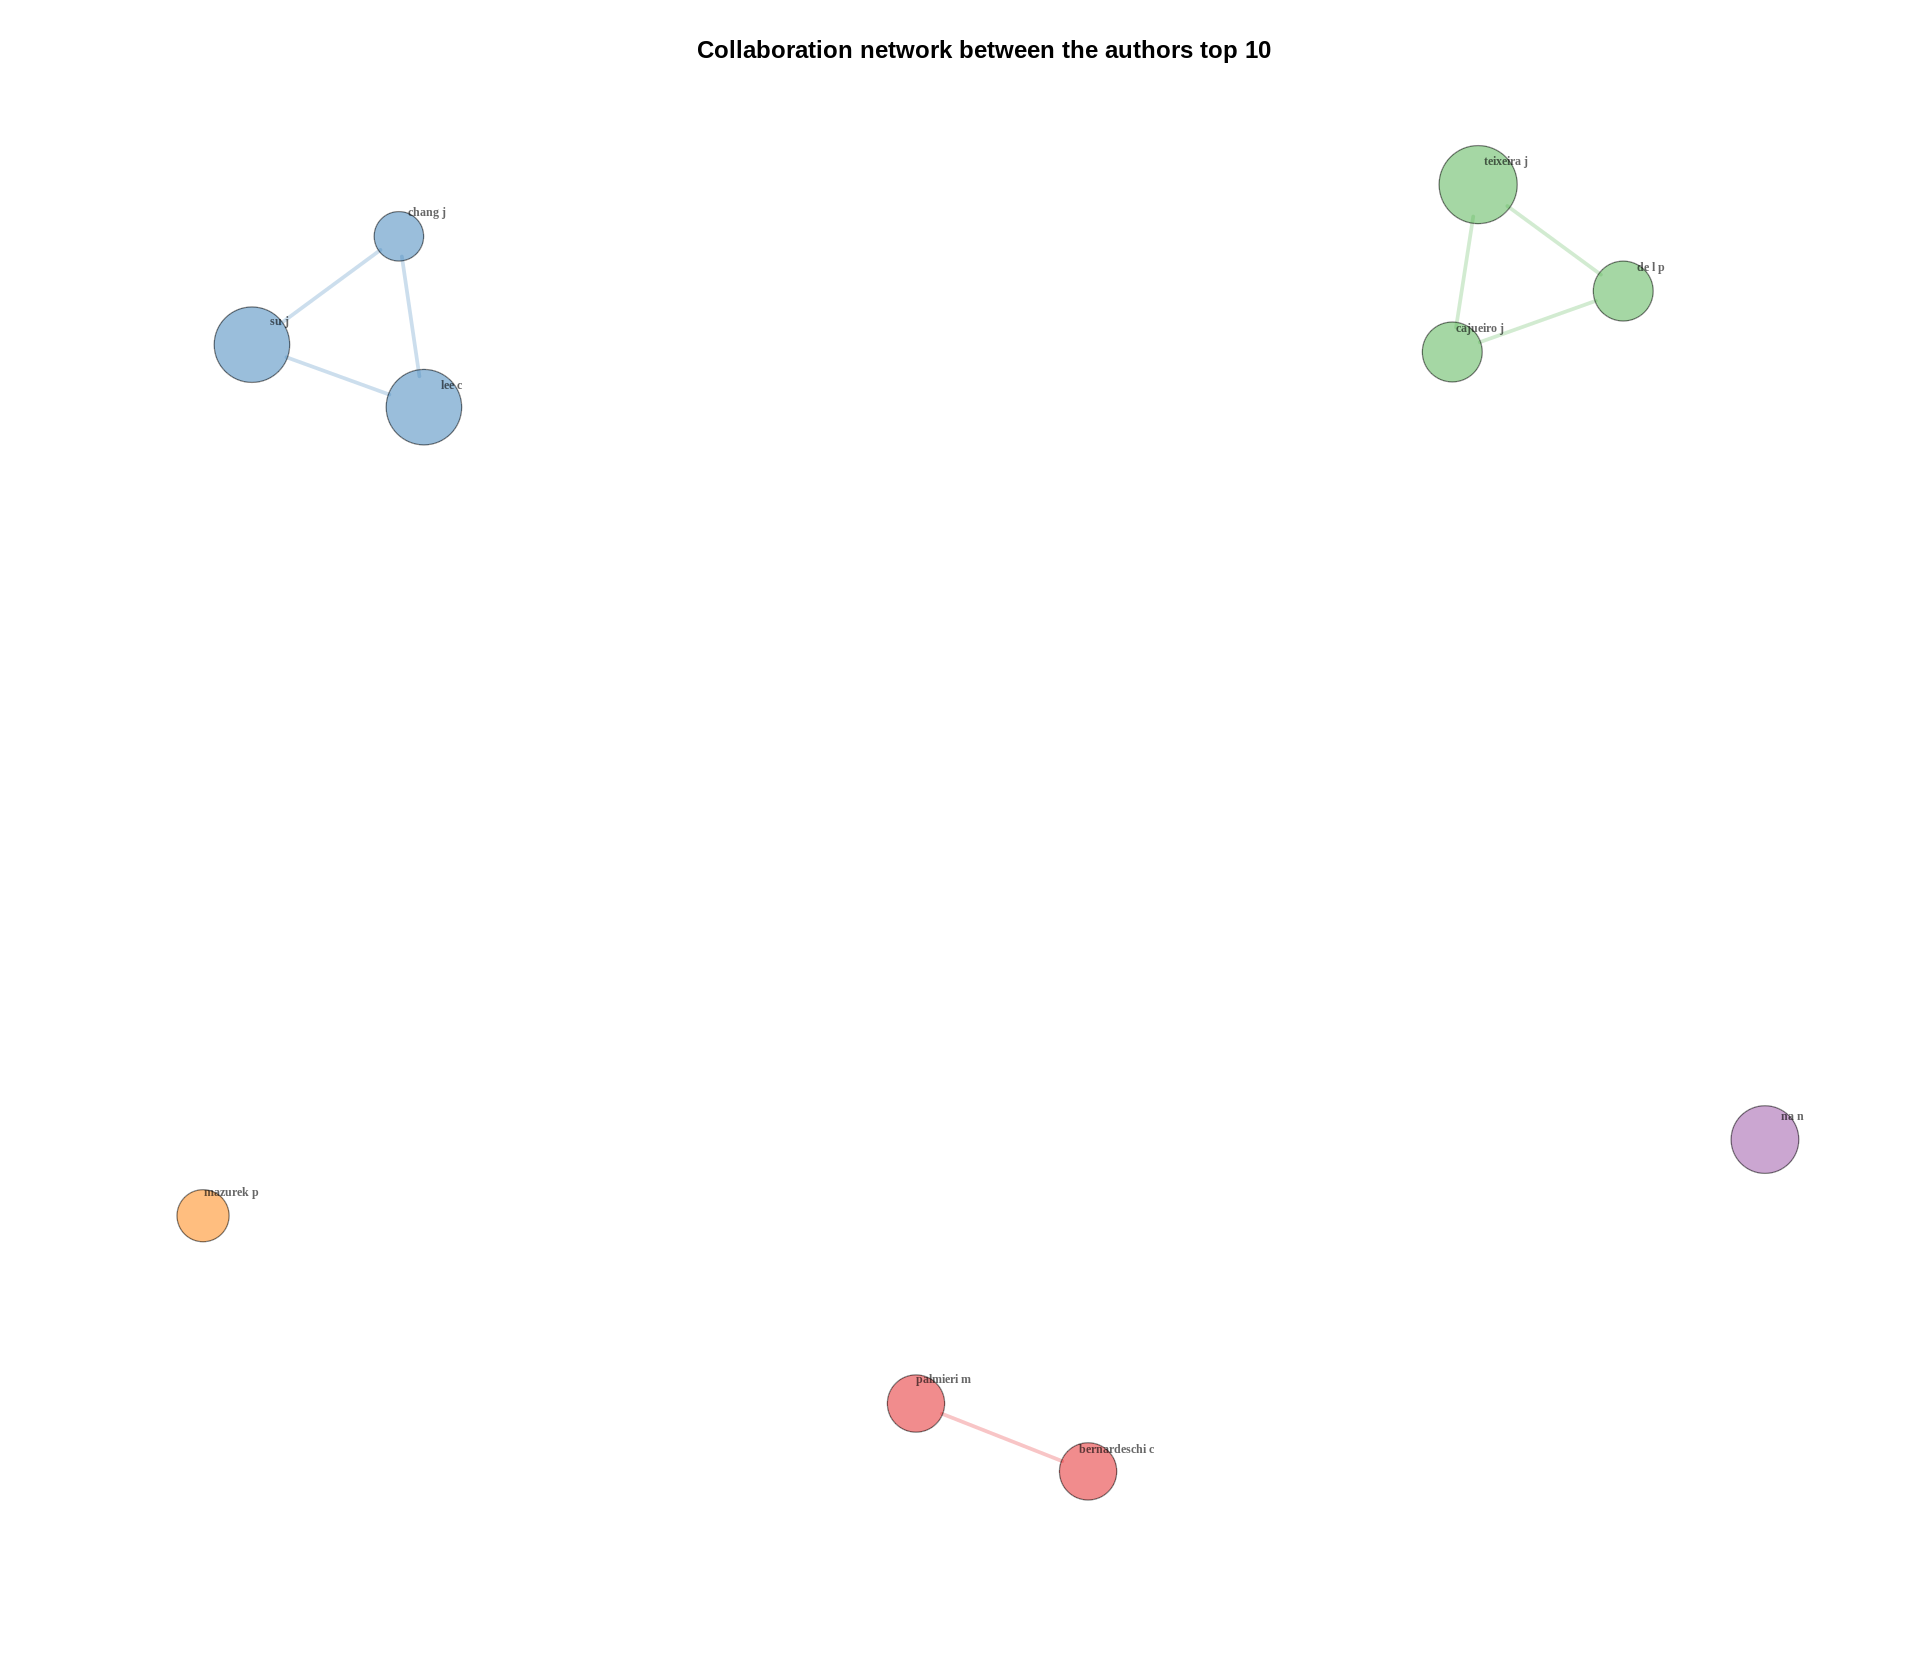

In [ ]:
resultados <- biblioNetwork(M1,
  analysis = "collaboration",  network = "authors", sep = ";")
networkPlot(resultados,
  n = 10,
  Title = "Collaboration network between the authors top 10",
  type = "auto", size=10,size.cex=T,edgesize = 3,labelsize=0.6)

In [ ]:
search.author("chang j")

[1] "a project-based laboratory for learning embedded system design with industry support"          
[2] "a project-based laboratory for learning embedded system designs with support from the industry"
[3] "a hands-on laboratory for autonomous mobile robot design courses"

# Coupling

In [ ]:
# only the last three years
coupling<-M1%>%filter(PY>=2024-4)

$graph
IGRAPH 48bd557 UNW- 10 16 -- 
+ attr: alpha (g/n), ylim (g/n), xlim (g/n), rescale (g/l), asp (g/n), layout (g/n), main (g/c), name (v/c), deg
| (v/n), size (v/n), label.cex (v/n), color (v/c), community (v/n), label.dist (v/n), frame.color (v/c), label.color
| (v/c), label.font (v/n), label (v/c), num (e/n), width (e/n), color (e/c), lty (e/n), weight (e/n), curved (e/l)
+ edges from 48bd557 (vertex names):
 [1] al j k            --alhuwaimel s       al j k            --farkh r            al j k            --quasim m          
 [4] alhuwaimel s      --farkh r            alhuwaimel s      --quasim m           farkh r           --quasim m          
 [7] amaya i           --benavides-robles m amaya i           --cruz-duarte j      amaya i           --ortiz-bayliss j   
[10] amaya i           --valencia-rivera g  benavides-robles m--cruz-duarte j      benavides-robles m--ortiz-bayliss j   
[13] benavides-robles m--valencia-rivera g  cruz-duarte j     --ortiz-bayliss j    cruz-duart

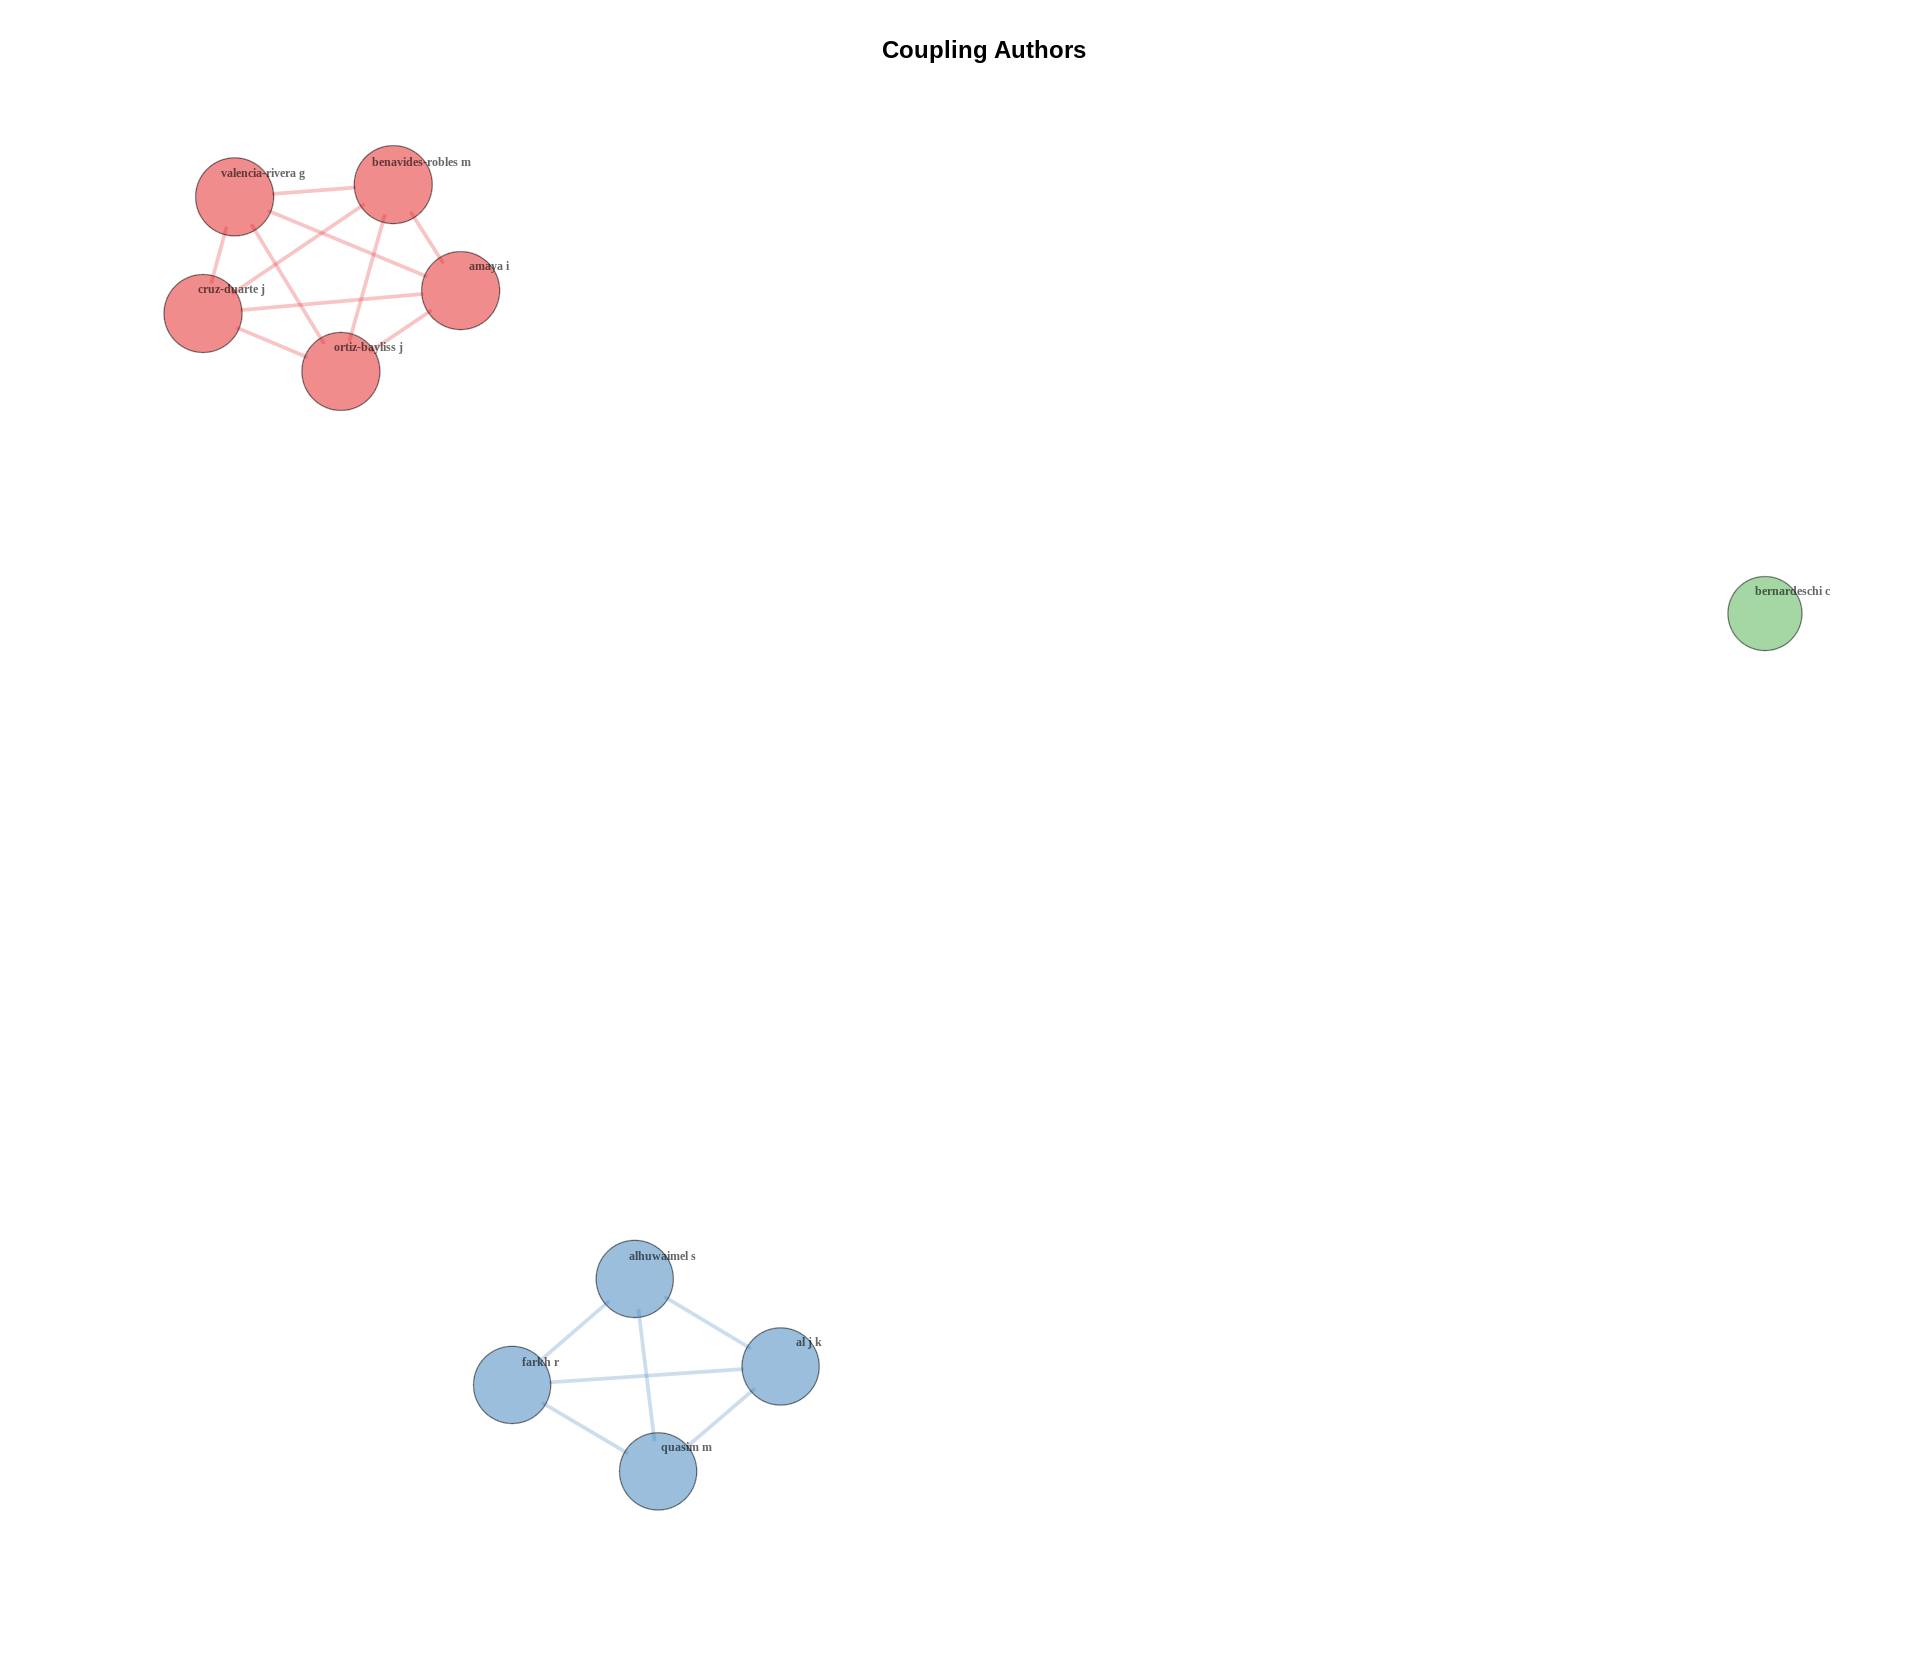

In [ ]:
resultados<-biblioNetwork(coupling, analysis = "coupling", network="authors", sep = ";")
networkPlot(resultados,
  n = 10,
  Title = "Coupling Authors",
  type = "auto", size=10,size.cex=T,edgesize = 3,labelsize=0.6)

In [ ]:
search.author("amaya")

[1] "robotic mobile fulfillment system: a systematic review"

In [ ]:
search.author("ortiz")

[1] "robotic mobile fulfillment system: a systematic review"                                                                   
[2] "mixed signal electronics project based learning approach for engineering students"                                        
[3] "educational robotics in action: development of a line-following robot through steam methodology to address traffic issues"

In [ ]:
search.author("cruz")

[1] "robotic mobile fulfillment system: a systematic review"                                                                                             
[2] "an experience using robotics to assist in the learning the concept of angles with 8<sup>th</sup> and 9<sup>th</sup> grade students of middle school"
[3] "line follower simulator with fuzzy control"                                                                                                         
[4] "implementing rfid technologies for automated guided vehicles in industry 4.0"

In [ ]:
search.author("valencia")

[1] "development of a line-follower robot for robotic competition purposes"                                     
[2] "a study of sequential program and concurrent program performance in line follower robot sensor acquisition"
[3] "robotic mobile fulfillment system: a systematic review"

In [ ]:
search.author("fark")

[1] "a deep learning approach for the mobile-robot motion control system"
[2] "intelligent autonomous-robot control for medical applications"

In [ ]:
search.author("alhuwai")

[1] "a deep learning approach for the mobile-robot motion control system"
[2] "intelligent autonomous-robot control for medical applications"

In [ ]:
search.author("al j k")

[1] "a deep learning approach for the mobile-robot motion control system"
[2] "intelligent autonomous-robot control for medical applications"

In [ ]:
search.author("quasim m")

[1] "a deep learning approach for the mobile-robot motion control system"
[2] "intelligent autonomous-robot control for medical applications"

$graph
IGRAPH 59d8f8f UNW- 10 2 -- 
+ attr: alpha (g/n), ylim (g/n), xlim (g/n), rescale (g/l), asp (g/n), layout (g/n), main (g/c), name (v/c), deg
| (v/n), size (v/n), label.cex (v/n), color (v/c), community (v/n), label.dist (v/n), frame.color (v/c), label.color
| (v/c), label.font (v/n), label (v/c), num (e/n), width (e/n), color (e/c), lty (e/n), weight (e/n), curved (e/l)
+ edges from 59d8f8f (vertex names):
[1] 2022 ieee international conference on smart computing (smartcomp 2022)--journal of computer virology and hacking techniques                    
[2] cmc-computers materials & continua                                    --journal of the brazilian society of mechanical sciences and engineering

$graph_pajek
IGRAPH 3695370 UNW- 10 2 -- 
+ attr: name (v/c), deg (v/n), size (v/n), label.cex (v/n), id (v/c), num (e/n), weight (e/n)
+ edges from 3695370 (vertex names):
[1] 2022 ieee international conference on smart computing (smartcomp 2022)--journal of computer virology and hac

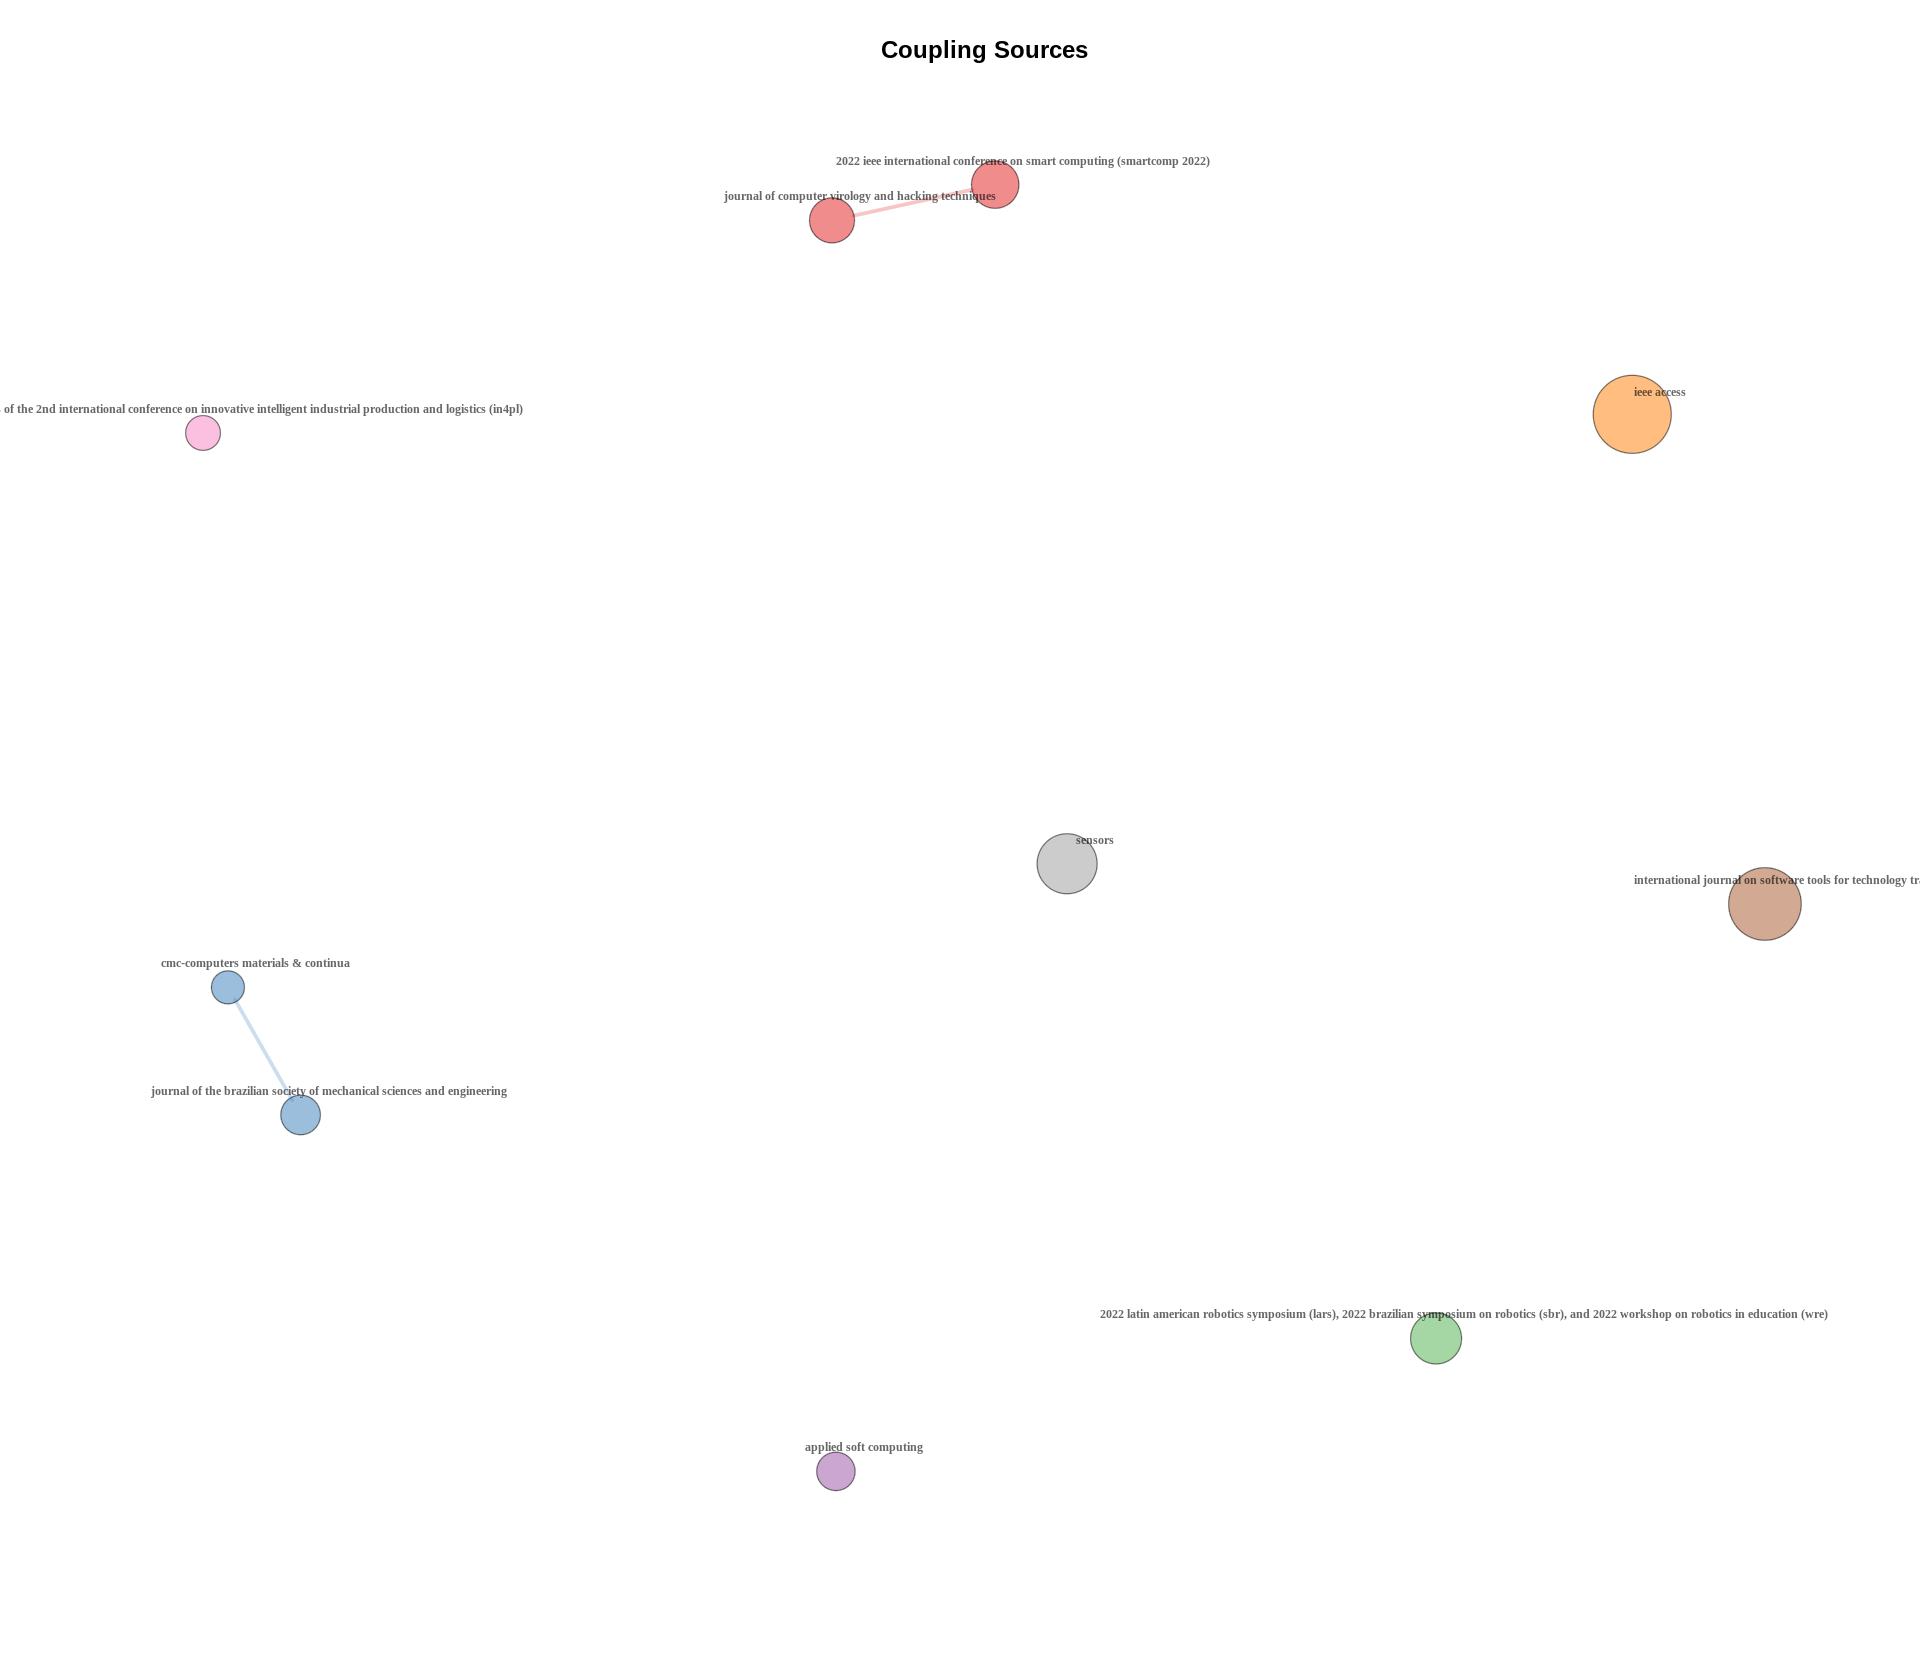

In [ ]:
resultados<-biblioNetwork(coupling, analysis = "coupling", network="sources", sep = ";")
networkPlot(resultados,
  n = 10,
  Title = "Coupling Sources",
  type = "auto", size=10,size.cex=T,edgesize = 3,labelsize=0.6)

$graph
IGRAPH efec77a UNW- 10 8 -- 
+ attr: alpha (g/n), ylim (g/n), xlim (g/n), rescale (g/l), asp (g/n), layout (g/n), main (g/c), name (v/c), deg
| (v/n), size (v/n), label.cex (v/n), color (v/c), community (v/n), label.dist (v/n), frame.color (v/c), label.color
| (v/c), label.font (v/n), label (v/c), num (e/n), width (e/n), color (e/c), lty (e/n), weight (e/n), curved (e/l)
+ edges from efec77a (vertex names):
[1] brazil      --bangladesh brazil      --tunisia    brazil      --turkey     bangladesh  --turkey     india       --turkey    
[6] saudi arabia--tunisia    saudi arabia--turkey     tunisia     --turkey    

$graph_pajek
IGRAPH 4101593 UNW- 10 8 -- 
+ attr: name (v/c), deg (v/n), size (v/n), label.cex (v/n), id (v/c), num (e/n), weight (e/n)
+ edges from 4101593 (vertex names):
[1] brazil      --bangladesh brazil      --tunisia    brazil      --turkey     bangladesh  --turkey     india       --turkey    
[6] saudi arabia--tunisia    saudi arabia--turkey     tunisia     --tur

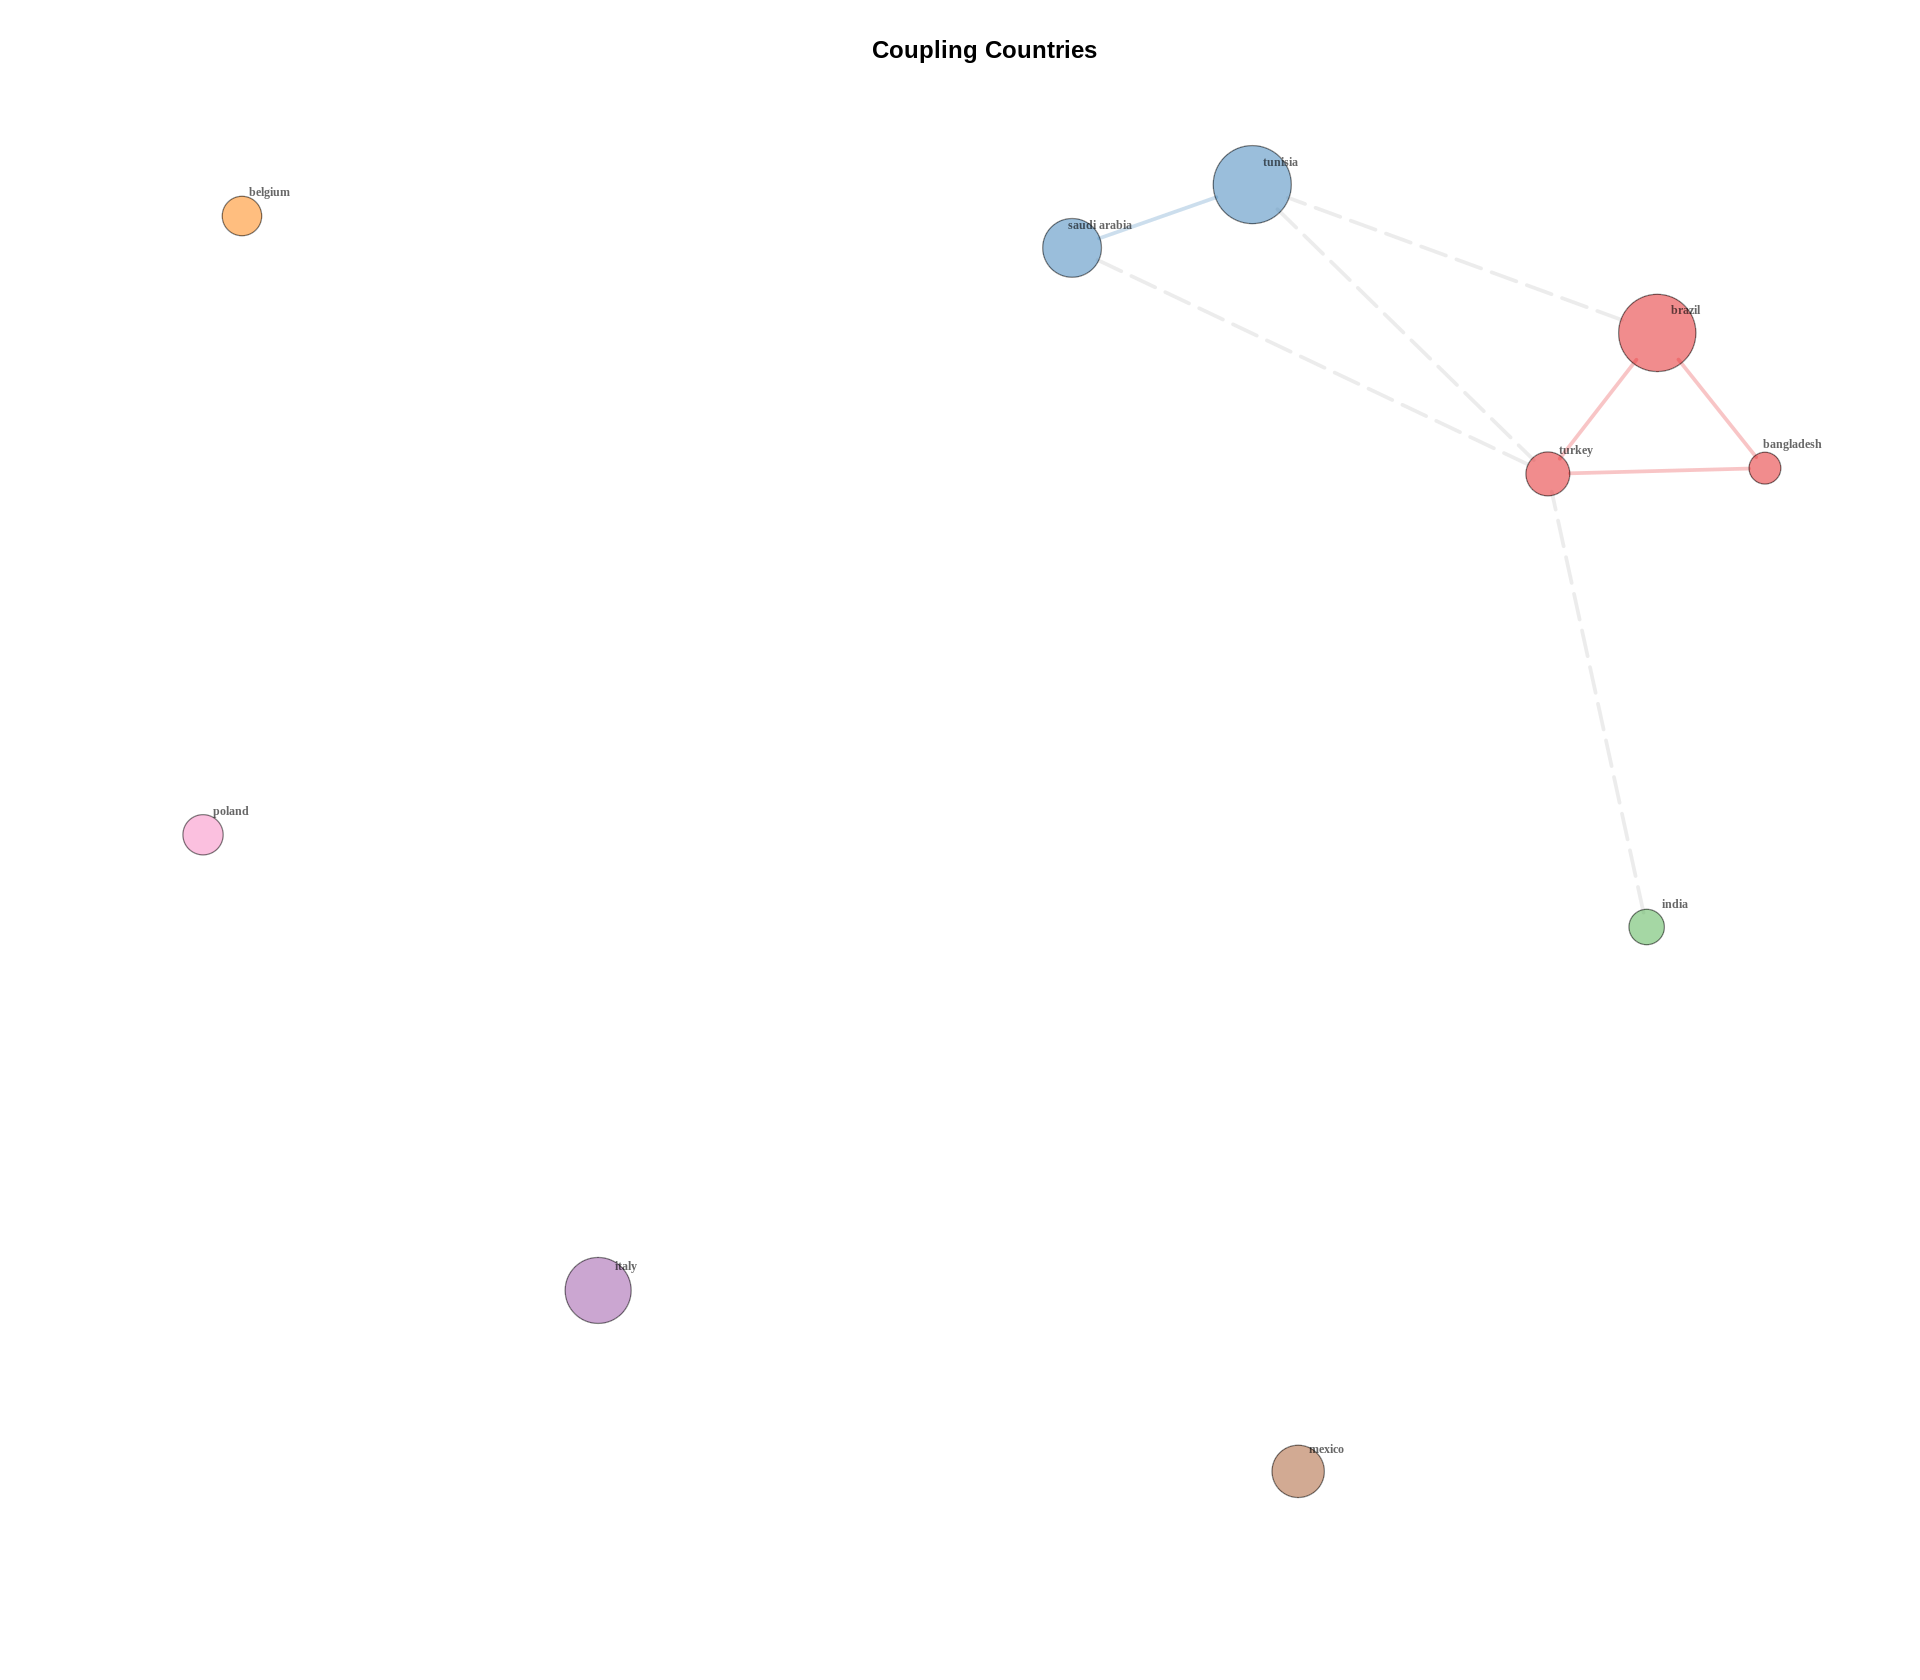

In [ ]:
resultados=metaTagExtraction(coupling,"AU_CO",sep=";")
resultados<-biblioNetwork(resultados, analysis = "coupling", network="countries", sep = ";")
networkPlot(resultados,
  n = 10,
  Title = "Coupling Countries",
  type = "auto", size=10,size.cex=T,edgesize = 3,labelsize=0.6)

$graph
IGRAPH 44cb1c6 UNW- 10 4 -- 
+ attr: alpha (g/n), ylim (g/n), xlim (g/n), rescale (g/l), asp (g/n), layout (g/n), main (g/c), name (v/c), deg
| (v/n), size (v/n), label.cex (v/n), color (v/c), community (v/n), label.dist (v/n), frame.color (v/c), label.color
| (v/c), label.font (v/n), label (v/c), num (e/n), width (e/n), color (e/c), lty (e/n), weight (e/n), curved (e/l)
+ edges from 44cb1c6 (vertex names):
[1] yildiz h, 2020      --farkh r, 2021-1    yildiz h, 2020      --farkh r, 2021-2    farkh r, 2021-1     --farkh r, 2021-2   
[4] bernardeschi c, 2020--palmieri m, 2022-2

$graph_pajek
IGRAPH a144e2f UNW- 10 4 -- 
+ attr: name (v/c), deg (v/n), size (v/n), label.cex (v/n), id (v/c), num (e/n), weight (e/n)
+ edges from a144e2f (vertex names):
[1] yildiz h, 2020      --farkh r, 2021-1    yildiz h, 2020      --farkh r, 2021-2    farkh r, 2021-1     --farkh r, 2021-2   
[4] bernardeschi c, 2020--palmieri m, 2022-2

$cluster_obj
IGRAPH clustering walktrap, groups: 7, mod: 0.38
+

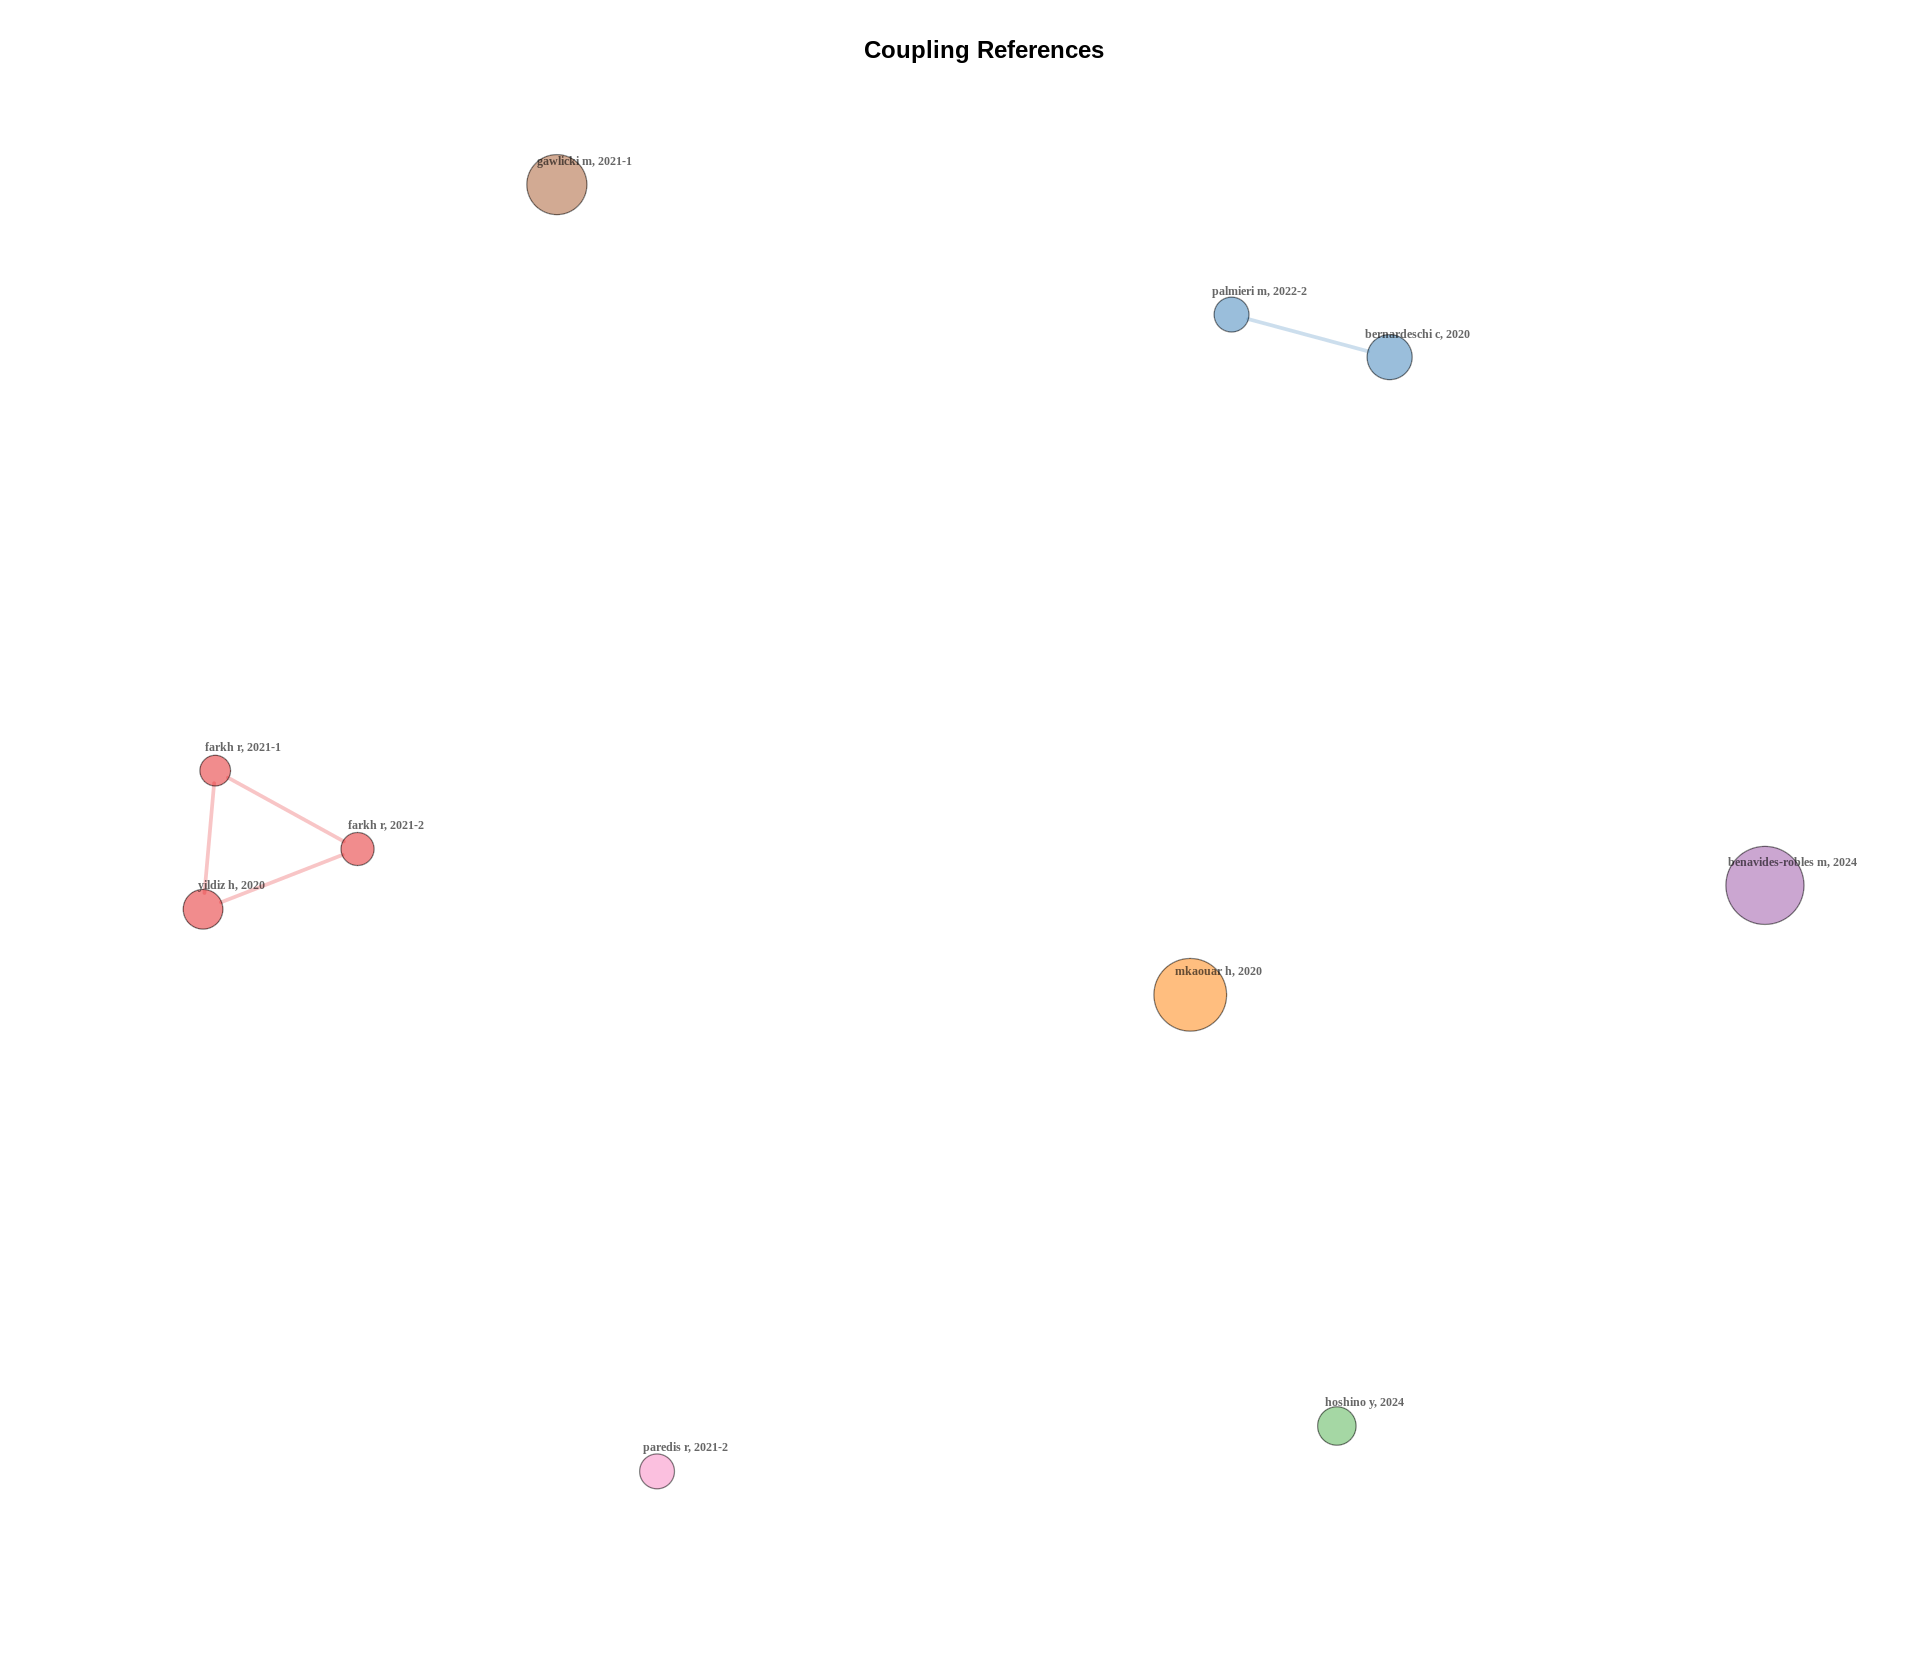

In [ ]:
resultados<-biblioNetwork(coupling, analysis = "coupling", network="references", sep = ";")
networkPlot(resultados,
  n = 10,
  Title = "Coupling References",
  type = "auto", size=10,size.cex=T,edgesize = 3,labelsize=0.6)

In [ ]:
search.author("gawlicki m") #2021

[1] "trajectory identification for moving loads by multicriterial optimization"
[2] "path identification of a moving load based on multiobjective optimization"
[3] "multiobjective optimization for identification of a moving load path"

In [41]:
search.author.ano("gawlicki m")

[1] 2021 2021 2019

In [ ]:
search.author("mkaouar") #2020

[1] "a formal approach to aadl model-based software engineering"

In [ ]:
search.author("yildiz") #2020

[1] "design and implementation of an outdoor line follower robot for robocup search and rescue league"                                                                                                           
[2] "sliding mode control of a line following robot"                                                                                                                                                             
[3] "design and implementation of an outdoor line follower robot for robocup search and rescue league; [robocup arama kurtarma ligi diş ortam kategorisi çizgi i̇zleyen robot platformu tasarimi ve gerçklenmesi]"

In [42]:
search.author.ano("yildiz")

[1] 2017 2020 2017

In [ ]:
search.author("hoshino")

[1] "human-inspired similarity control system: enhancing line-following robot perception"

# Word Cloud

In [ ]:
install.packages("wordcloud")
library(wordcloud)
install.packages("RColorBrewer")
library(RColorBrewer)
install.packages("wordcloud2")
library(wordcloud2)
install.packages("tm")
library(tm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: RColorBrewer

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’, ‘BH’


Loading required package: NLP



Warning message in tm_map.SimpleCorpus(., removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords("english")):
“transformation drops documents”


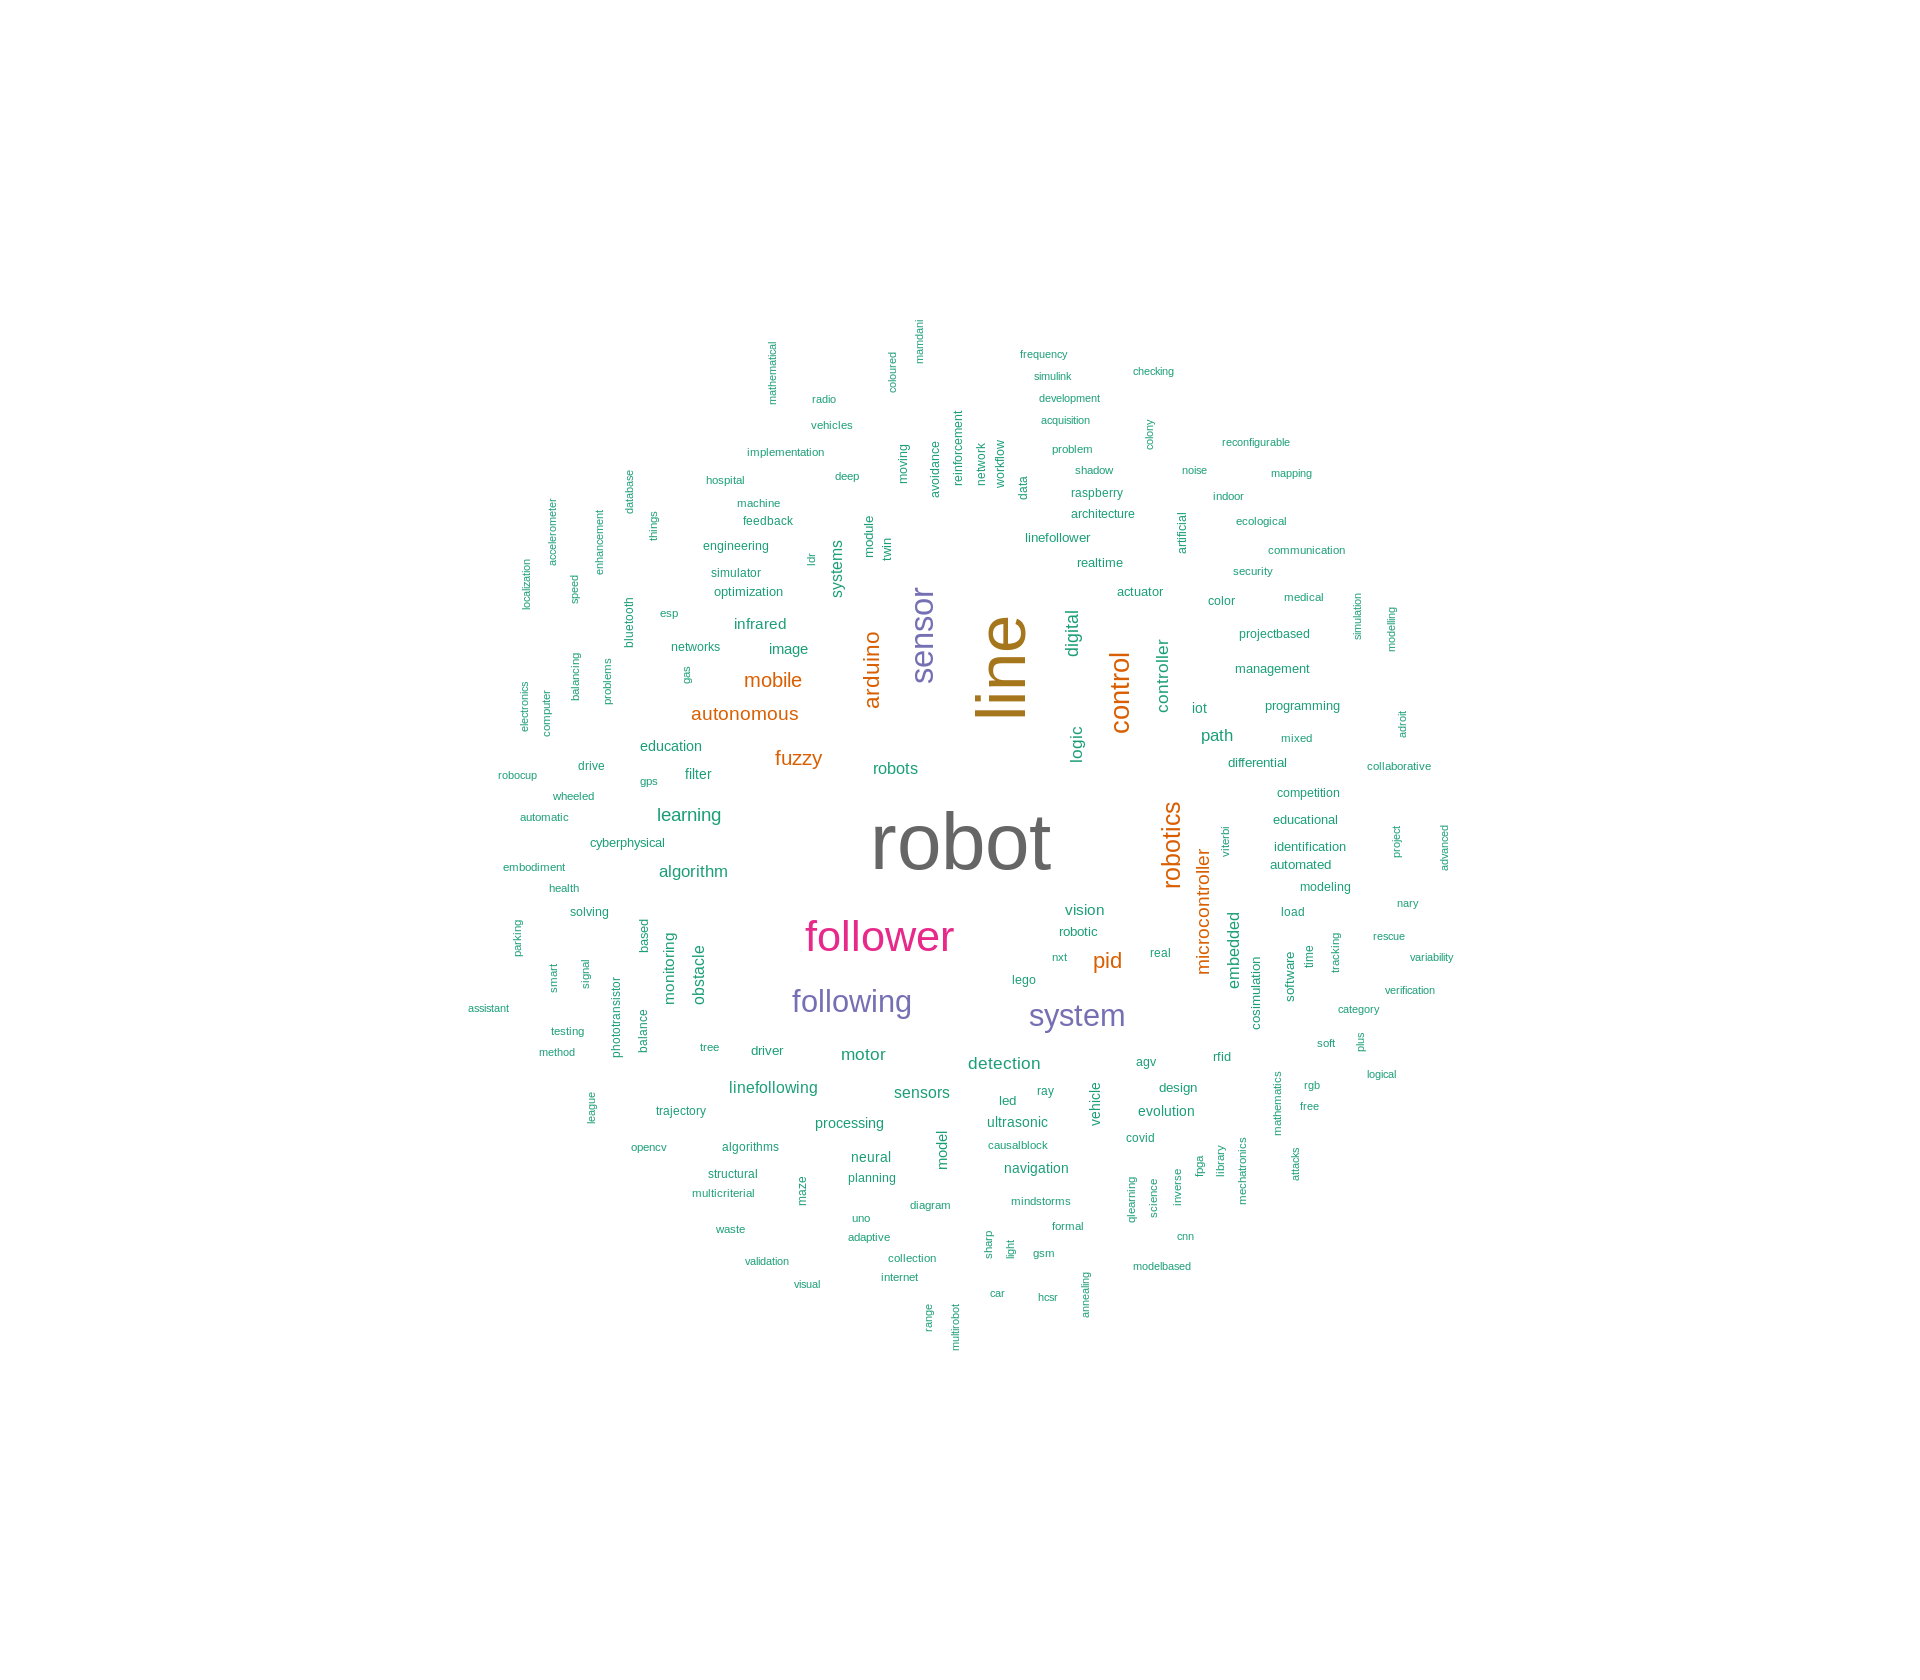

In [ ]:
text <- M1$DE
docs <- Corpus(VectorSource(text))
docs <- docs %>%
  tm_map(removeNumbers) %>%
  tm_map(removePunctuation) %>%
  tm_map(stripWhitespace)
docs <- tm_map(docs, content_transformer(tolower))
docs <- tm_map(docs, removeWords, stopwords("english"))
dtm <- TermDocumentMatrix(docs)
matrix <- as.matrix(dtm)
words <- sort(rowSums(matrix),decreasing=TRUE)
df <- data.frame(word = names(words),freq=words)
set.seed(2024)
wordcloud(words = df$word, freq = df$freq, min.freq = 1,           max.words=200, random.order=FALSE, rot.per=0.35,            colors=brewer.pal(8, "Dark2"))

# How many review?

In [ ]:
unique(M1$DT)

[1] "PROCEEDINGS PAPER"        "ARTICLE"                  "CONFERENCE PAPER"         "CONFERENCE REVIEW"       
[5] "BOOK CHAPTER"             "ARTICLE CONFERENCE PAPER" "BOOK"

There is no literature review.

# Historical Citation Analysis

## Web Of Science

In [ ]:
# Perform historical citation analysis
hist_results <- histNetwork(convert2df("savedrecs.txt", dbsource="wos", format="plaintext"), sep = ";")


Converting your wos collection into a bibliographic dataframe

Done!


Generating affiliation field tag AU_UN from C1:  Done!


WOS DB:
Searching local citations (LCS) by reference items (SR) and DOIs...

Analyzing 1612 reference items...

Found 20 documents with no empty Local Citations (LCS)



 Legend

                                                                                                                                                                                                        Label
1                                                                                                                                             PAKDAMAN M, 2009, INT C COMP ELEC ENG DOI 10.1109/ICCEE.2009.43
2                                                                                                                                       PAKDAMAN M, 2010, INT CONF COMPUT AUTO DOI 10.1109/ICCAE.2010.5451881
3                                                                                                                                                       LEE CS, 2010, IEEE T EDUC DOI 10.1109/TE.2008.2010990
4                                                                                                                                                 IBRAHIM D, 2011, COM

$net
IGRAPH 88253d0 DN-- 38 36 -- 
+ attr: name (v/c), title (v/c), keywords (v/c), keywordsplus (v/c), id (v/c), size (v/n), years (v/n), color (e/c)
+ edges from 88253d0 (vertex names):
[1] HASAN KM, 2012, 2012 INTERNATIONAL CONFERENCE ON INFORMATICS, ELECTRONICS & VISION (ICIEV) DOI         ->PAKDAMAN M, 2009, INT C COMP ELEC ENG DOI 10.1109/ICCEE.2009.43             
[2] HASAN KM, 2013, 2013 IEEE BUSINESS ENGINEERING AND INDUSTRIAL APPLICATIONS COLLOQUIUM (BEIAC 2013) DOI ->PAKDAMAN M, 2009, INT C COMP ELEC ENG DOI 10.1109/ICCEE.2009.43             
[3] HASAN KM, 2013, 2013 IEEE BUSINESS ENGINEERING AND INDUSTRIAL APPLICATIONS COLLOQUIUM (BEIAC 2013) DOI ->PAKDAMAN M, 2010, INT CONF COMPUT AUTO DOI 10.1109/ICCAE.2010.5451881       
[4] ROY A, 2016, COMPUT ELECTR ENG DOI 10.1016/J.COMPELECENG.2015.06.014                                   ->GOSIM NW, 2012, PROCEDIA ENGINEER DOI 10.1016/J.PROENG.2012.07.319          
[5] ROY A, 2016, COMPUT ELECTR ENG DOI 10.1016/J.COMPELECENG.2015.06

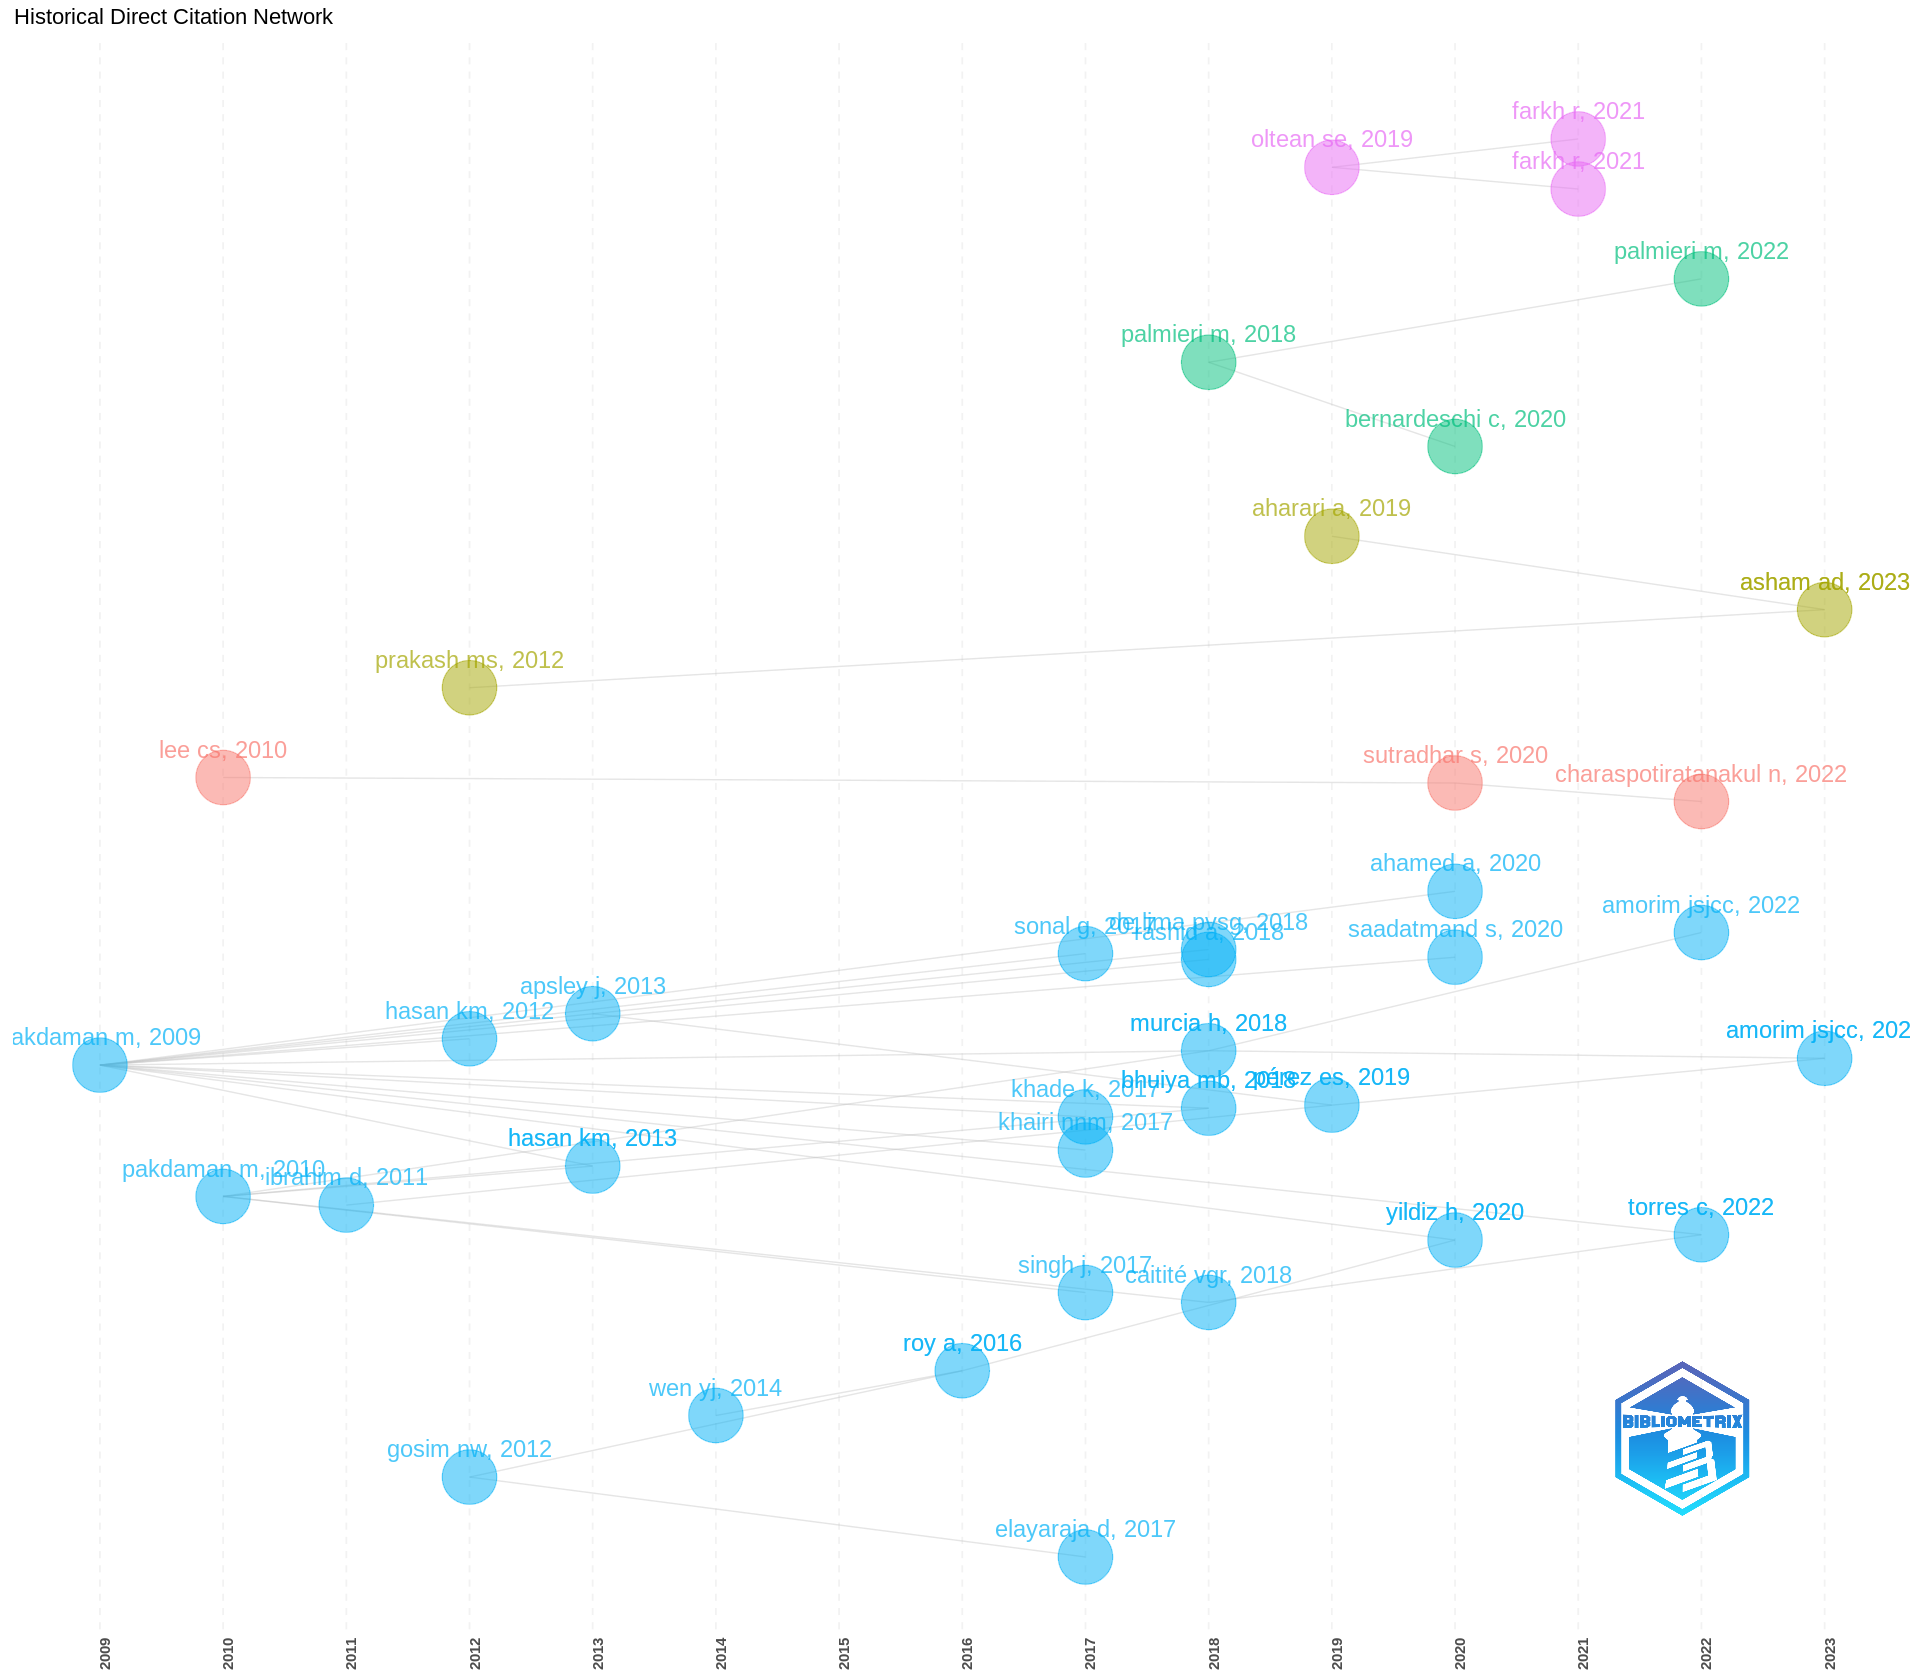

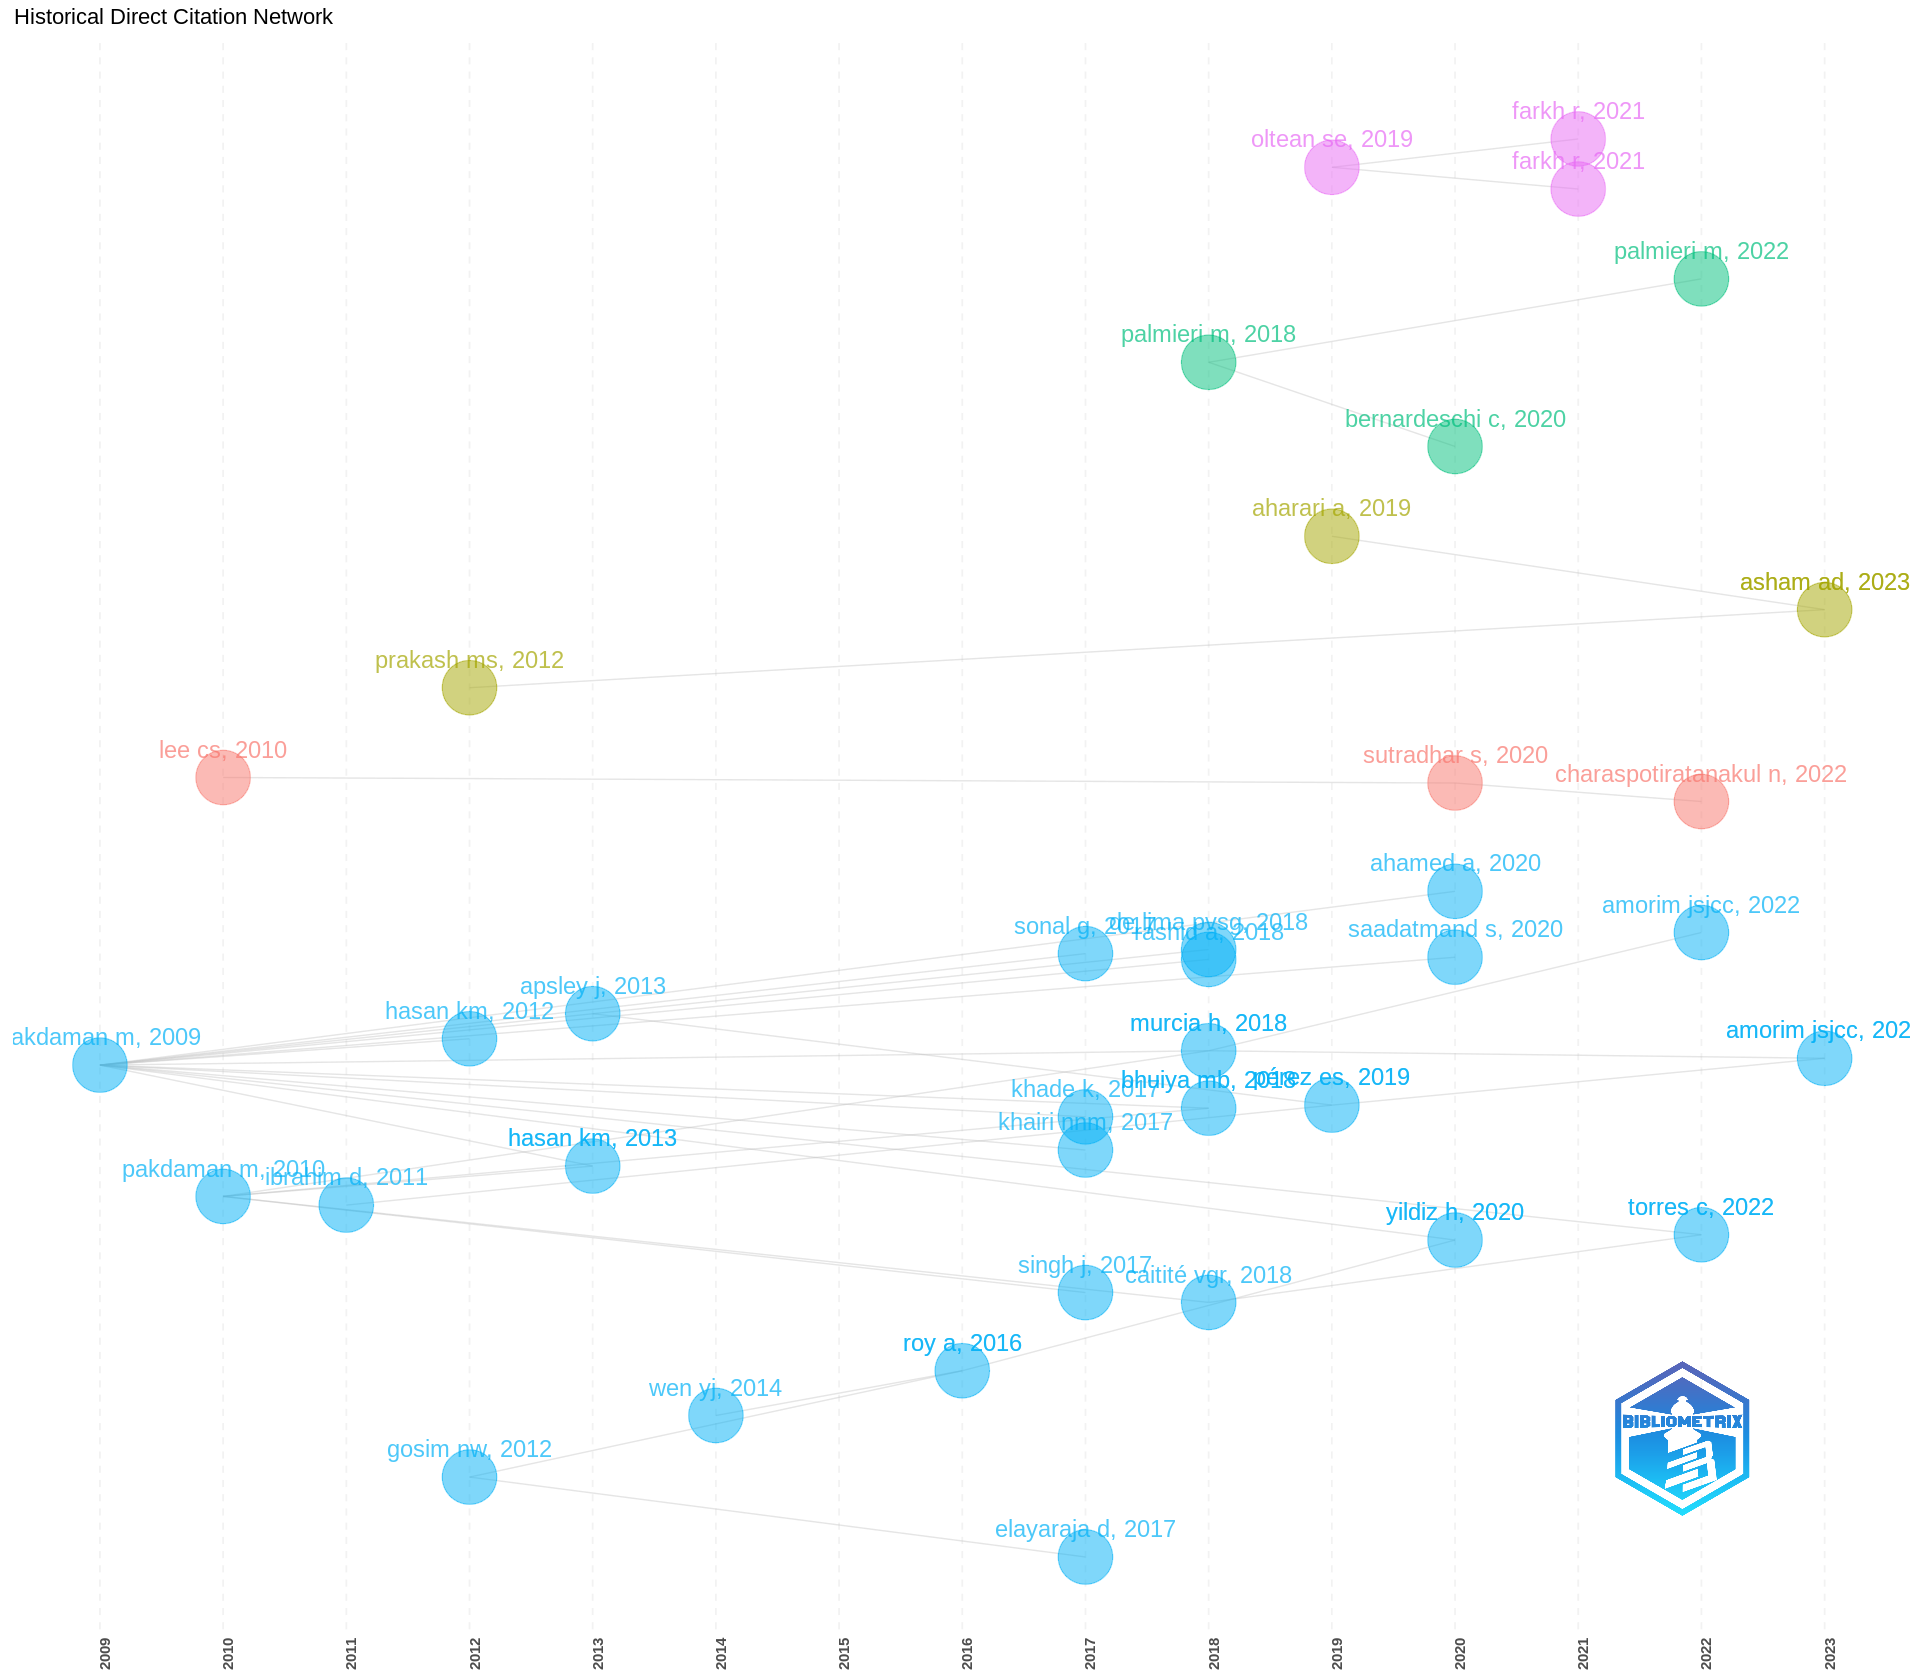

In [ ]:
# Plot the historical citation
histPlot(hist_results, size = 15)

In [44]:
search.author("gosim") #2012

[1] "investigation in autonomous line follower robot"                               
[2] "design of a high-speed line following robot that smoothly follows tight curves"
[3] "pick and place abb working with a liner follower robot"

In [45]:
search.author.ano("gosim")

[1] 2017 2016 2012

In [46]:
search.author("prakash") #2012

[1] "line following robot using image processing"                                                                               
[2] "computer vision assisted line following robot"                                                                             
[3] "mathematical analysis of a line-follower robot, a stable controller design using lyapunov approach, and experimental tests"

In [47]:
search.author.ano("prakash")

[1] 2019 2012 2023

In [48]:
search.author("aharari") #2019

[1] "low pass filter applied to color sensor of line follower robot"                                                            
[2] "mathematical analysis of a line-follower robot, a stable controller design using lyapunov approach, and experimental tests"

In [49]:
search.author.ano("aharari")

[1] 2019 2023

## The Lens


Converting your lens collection into a bibliographic dataframe



Warning message:
“One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 29 Columns: 32
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (19): Lens ID, Title, Publication Type, Source Title, ISSNs, Publisher, Source Country, Author/s, Abstract, Volume, Start...
dbl   (5): Publication Year, Issue Number, Microsoft Academic ID, Citing Patents Count, Citing Works Count
lgl   (7): Keywords, MeSH Terms, Chemicals, Funding, PMID, PMCID, Is Open Access
date  (1): Date Published

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Done!


 Legend

                                                                                                                  Label
1    KAISER F, 2014, 2014 INTERNATIONAL CONFERENCE ON ELECTRICAL ENGINEERING AND INFORMATION & COMMUNICATION TECHNOLOGY
2                              YILDIZ HB, 2020, JOURNAL OF THE BRAZILIAN SOCIETY OF MECHANICAL SCIENCES AND ENGINEERING
3 KONDAKOR A, 2018, 2018 IEEE 12TH INTERNATIONAL SYMPOSIUM ON APPLIED COMPUTATIONAL INTELLIGENCE AND INFORMATICS (SACI)
4                     SONAL G, 2017, 2017 INTERNATIONAL CONFERENCE ON COMPUTING METHODOLOGIES AND COMMUNICATION (ICCMC)
  Author_Keywords KeywordsPlus                          DOI Year LCS GCS
1            <NA>         <NA> 10.1109/iceeict.2014.6919137 2014   3  14
2            <NA>         <NA>   10.1007/s40430-020-02645-3 2020   0  15
3            <NA>         <NA>    10.1109/saci.2018.8440975 2018   0  15
4            <NA>         <NA>   10.1109/iccmc.2017.8282727 2017   0   5


$net
IGRAPH cce2131 DN-- 4 3 -- 
+ attr: name (v/c), title (v/c), keywords (v/c), keywordsplus (v/c), id (v/c), size (v/n), years (v/n), color (e/c)
+ edges from cce2131 (vertex names):
[1] YILDIZ HB, 2020, JOURNAL OF THE BRAZILIAN SOCIETY OF MECHANICAL SCIENCES AND ENGINEERING                             ->KAISER F, 2014, 2014 INTERNATIONAL CONFERENCE ON ELECTRICAL ENGINEERING AND INFORMATION & COMMUNICATION TECHNOLOGY
[2] KONDAKOR A, 2018, 2018 IEEE 12TH INTERNATIONAL SYMPOSIUM ON APPLIED COMPUTATIONAL INTELLIGENCE AND INFORMATICS (SACI)->KAISER F, 2014, 2014 INTERNATIONAL CONFERENCE ON ELECTRICAL ENGINEERING AND INFORMATION & COMMUNICATION TECHNOLOGY
[3] SONAL G, 2017, 2017 INTERNATIONAL CONFERENCE ON COMPUTING METHODOLOGIES AND COMMUNICATION (ICCMC)                    ->KAISER F, 2014, 2014 INTERNATIONAL CONFERENCE ON ELECTRICAL ENGINEERING AND INFORMATION & COMMUNICATION TECHNOLOGY

$g

$graph.data
                                                                                   

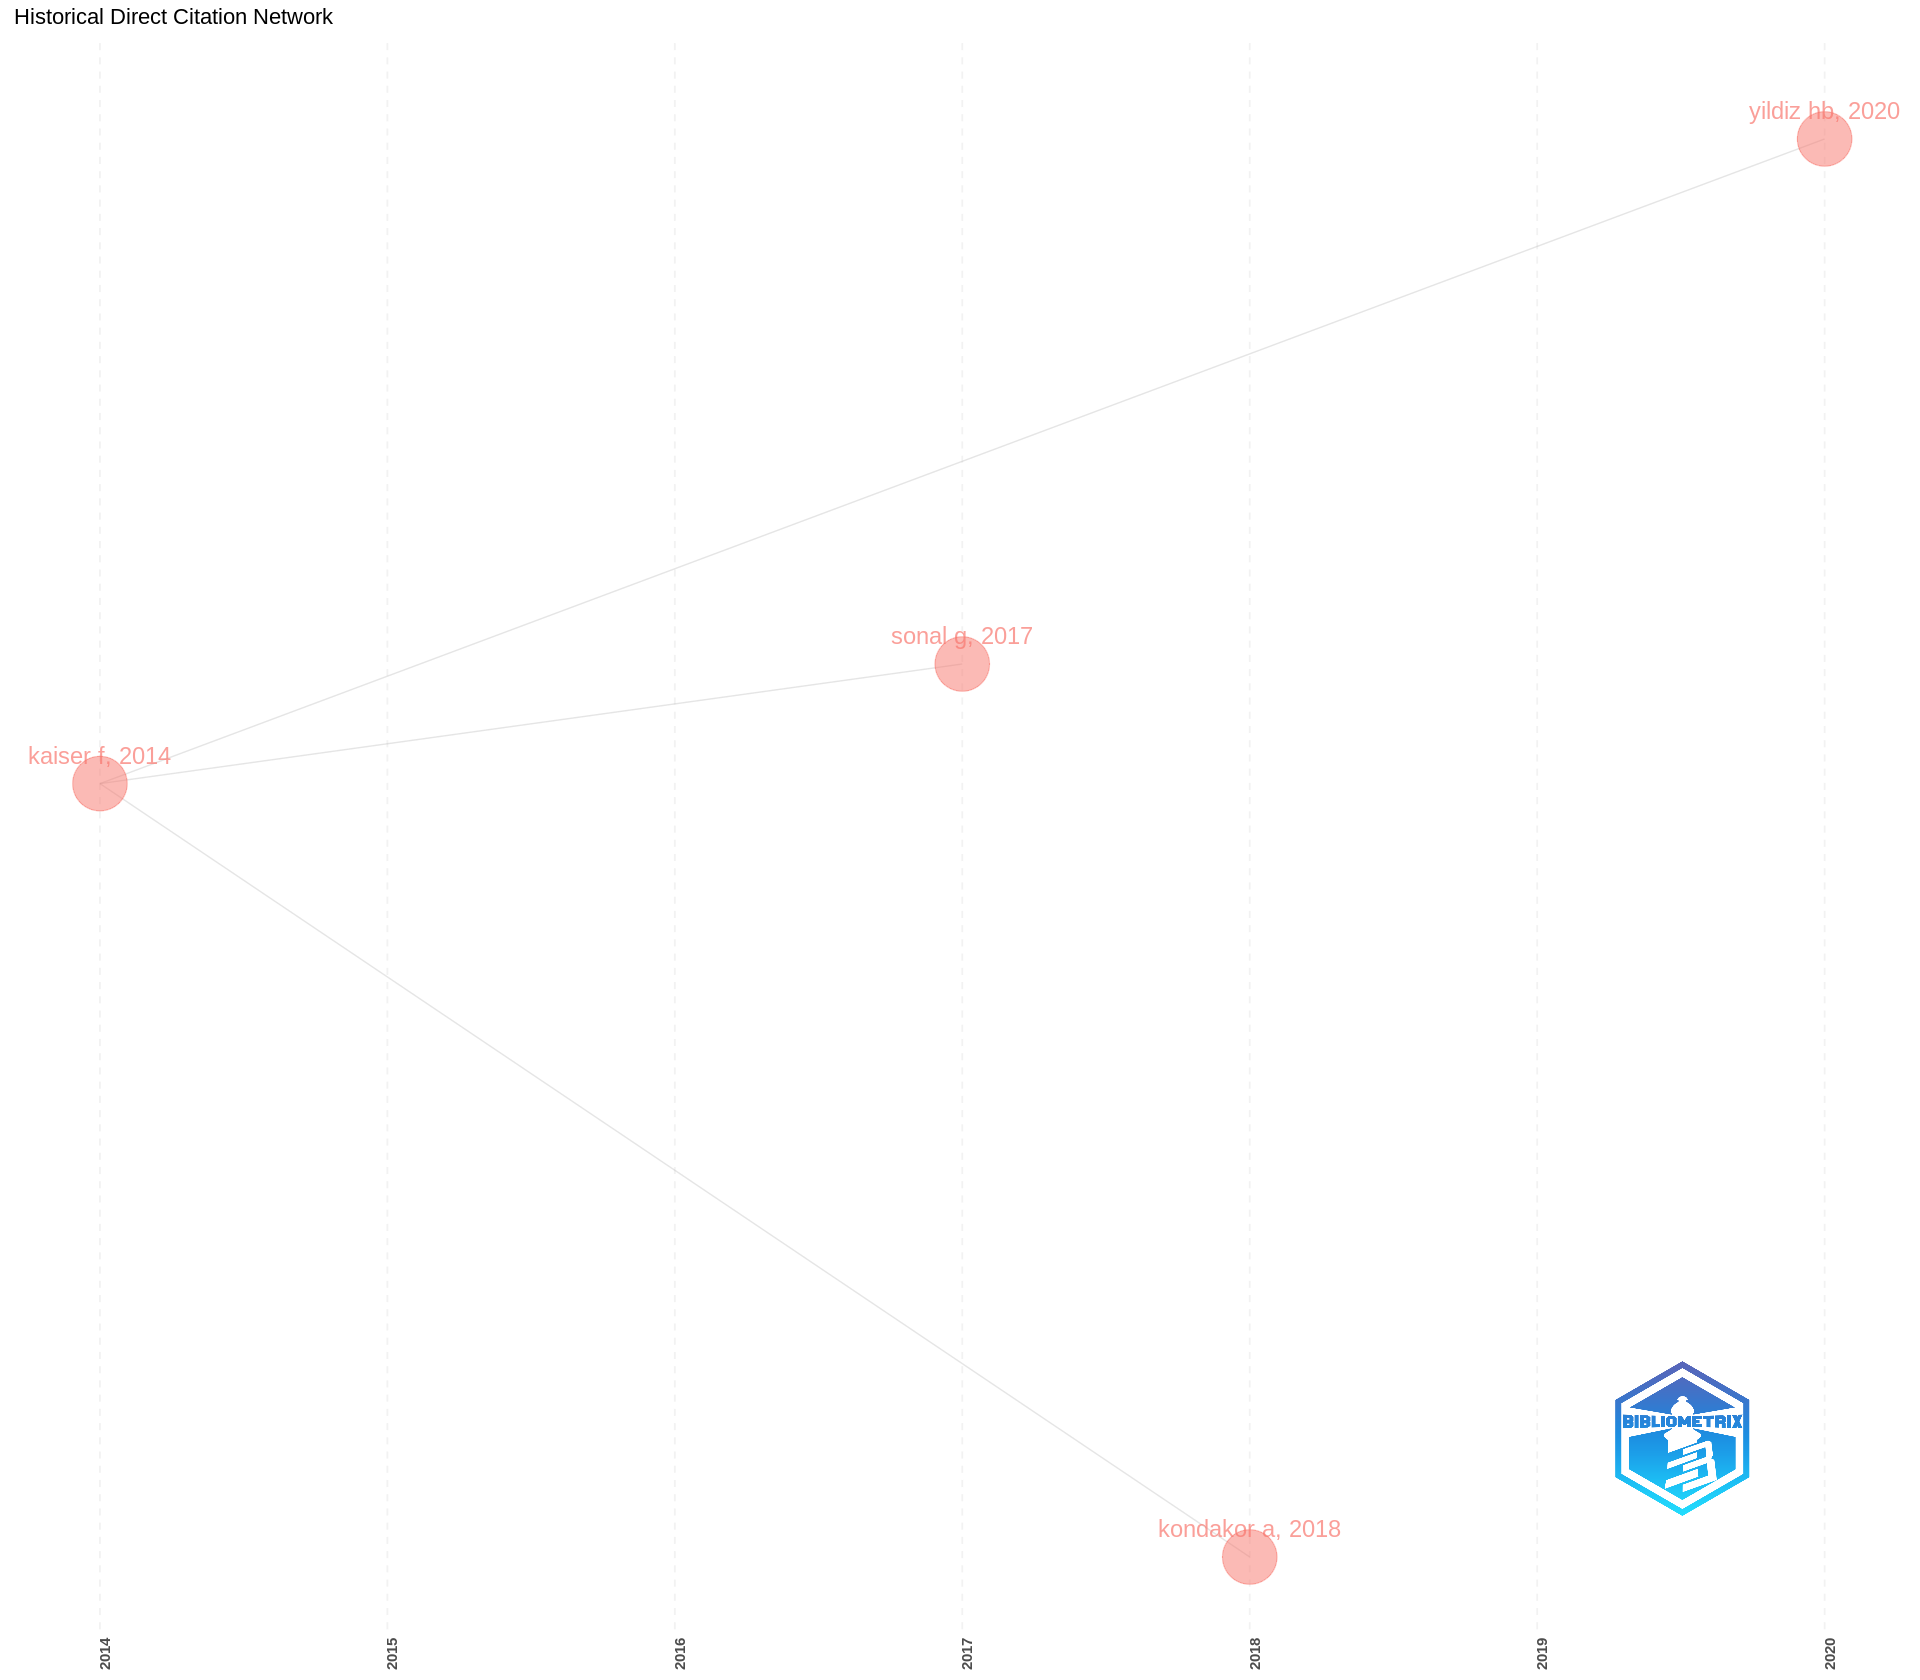

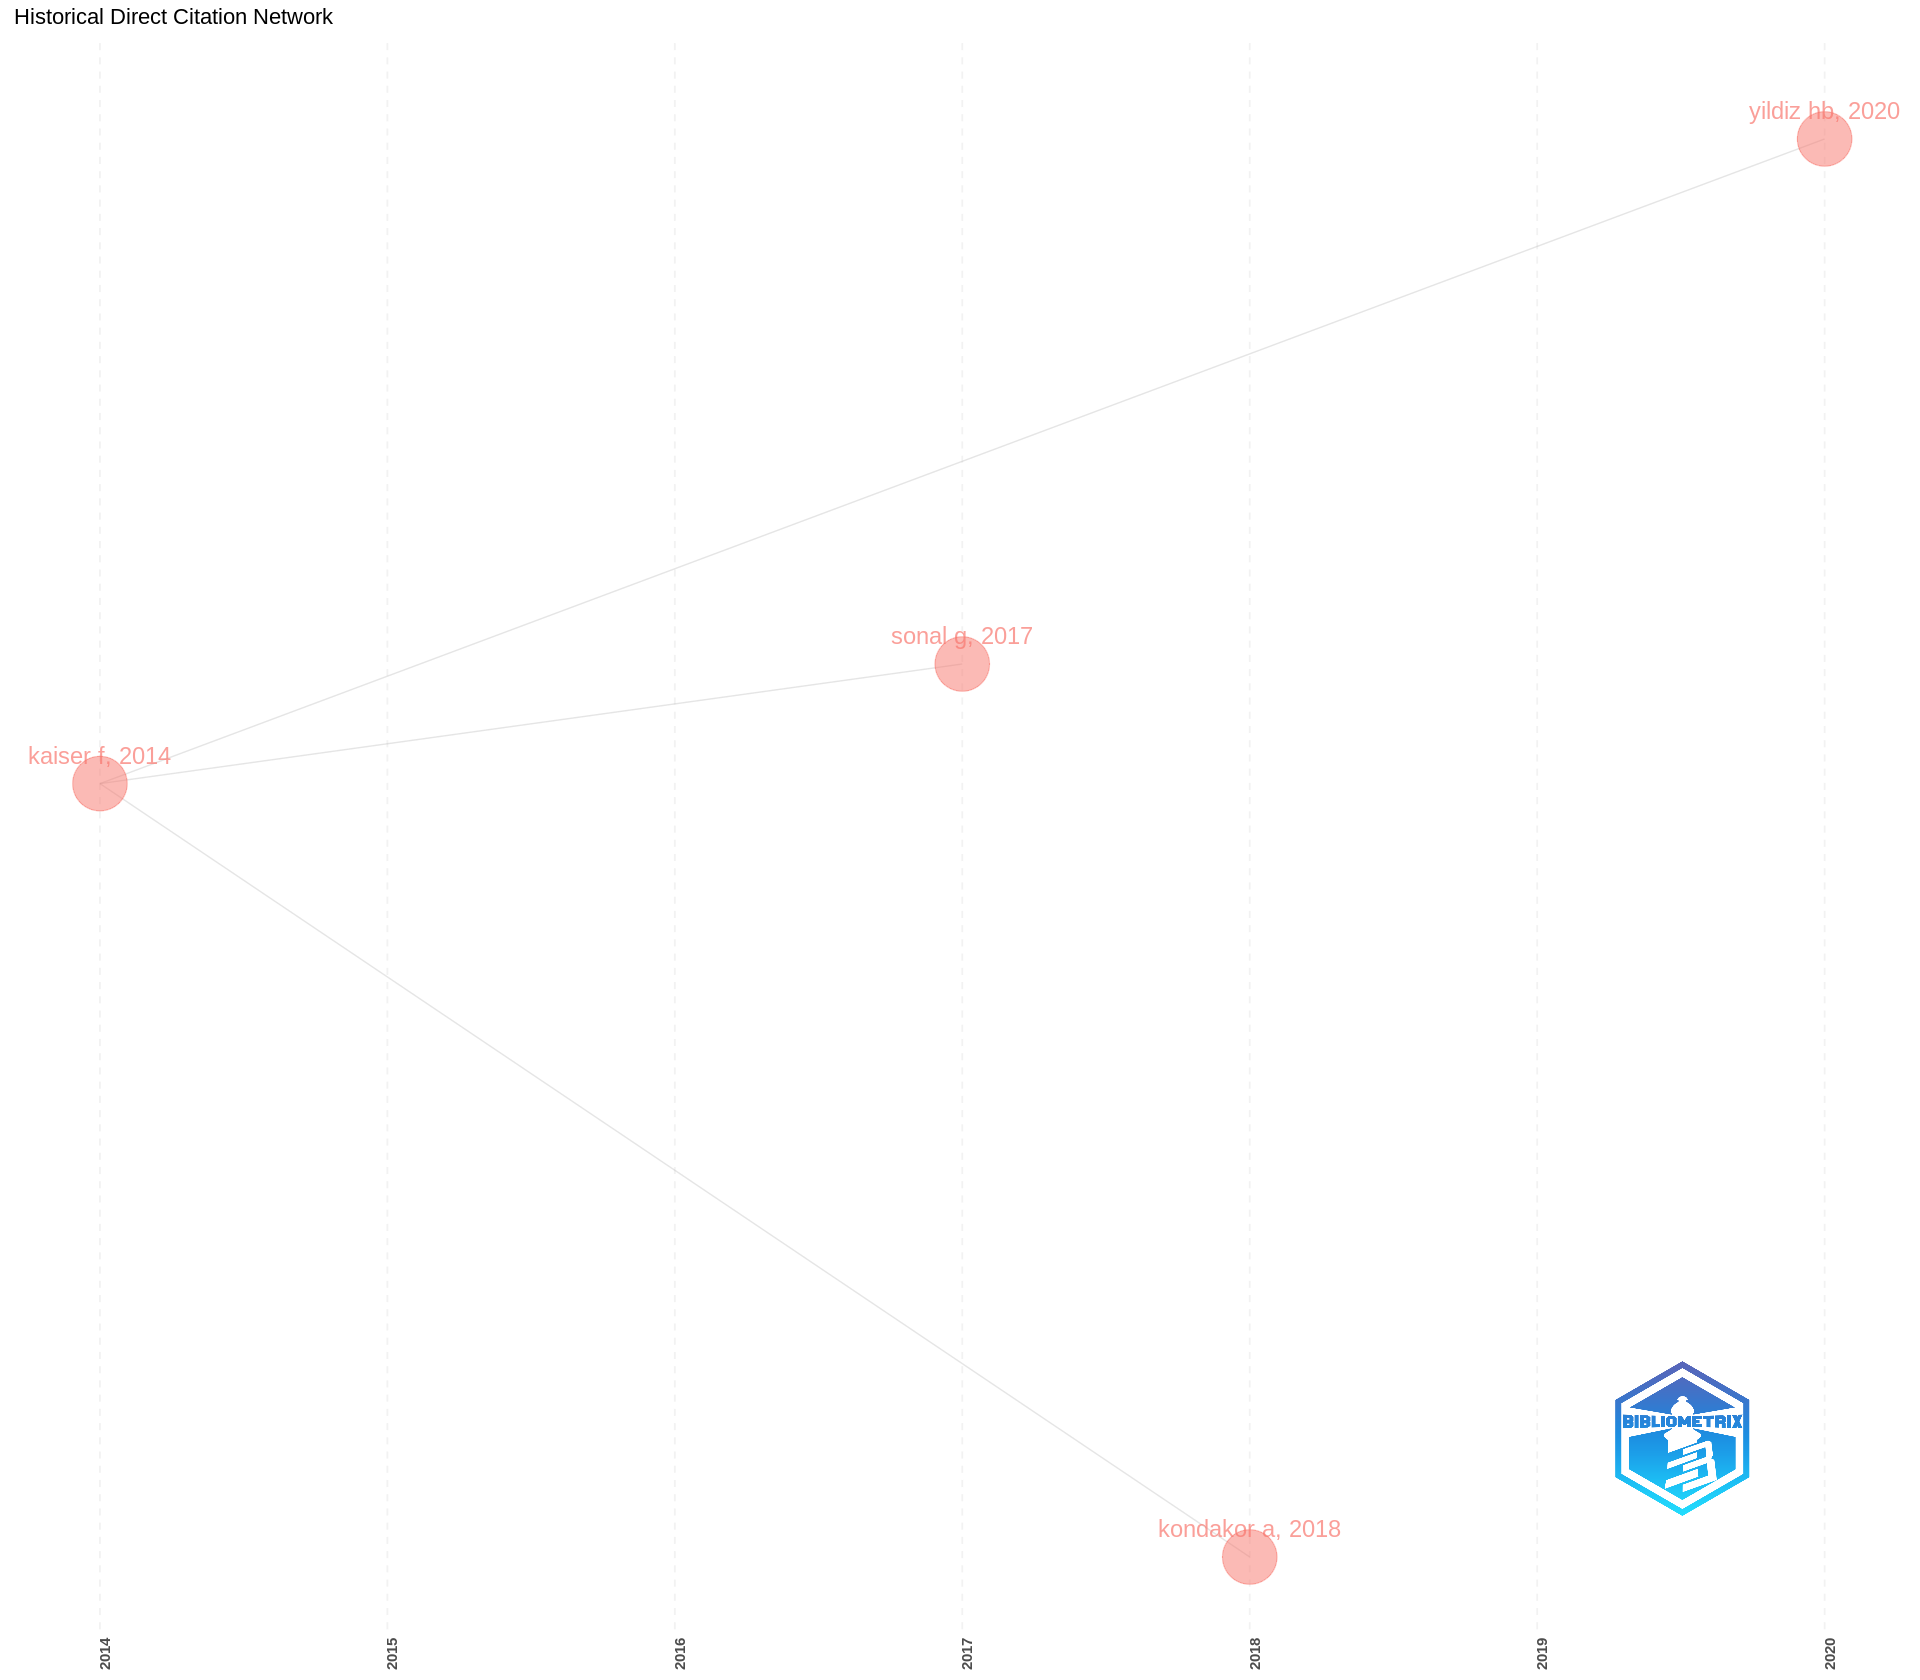

In [ ]:
hist_results <- histNetwork(convert2df("lens-export.csv", dbsource="lens", format="plaintext"), sep = ";")
# Plot the historical citation
histPlot(hist_results, size = 15)

Scopus is not allowed.